# CS 539 Project - Portuguese Banking Data

## Predicting outcomes in a marketing campaign related to term deposit accounts
  
Data Cleaning and Exploratory Data Analysis

Tyler Nardone
  
tjnardone@wpi.edu

## Problem Statement and Background


This project will utilize a dataset pertaining to a marketing campaign performed by a Portuguese banking institution, which was obtained from the UC Irvine Machine Learning Repository. The data that was downloaded from UCI includes four total datasets, summarized as follows:

- A “full” dataset containing 41,188 instances of 20 inputs, containing data collected from May 2008 to November 2010.

- A smaller randomly selected subset of 10% (4,119 instances) of the “full” dataset.

- An older version of the “full” dataset which contains 17 inputs.

- A smaller randomly selected subset of 10% of the older version of the “full” dataset.

The dataset information provided by UCI indicates that the smaller datasets are provided for the purpose of testing more computationally demanding algorithms. At this point it is not clear if the older dataset with fewer inputs will be valuable or needed for the final analysis. The input features vary in type, and include numerical and categorical data types.

Along with the feature columns, the target variable in this dataset is a column with "yes" or "no" responses indicating whether or not someone signed up for a term deposit account.

Problem Statement (this and the next paragraph are updated from Milestone 1): This project will seek to utilize various machine learning models to predict, and in addition assign a probability, as to whether or not someone will sign up for an account such as this. In addition the project may seek to identify the features that provide the most predictive value.

This project will utilize machine learning in order to achieve the goals set forth here as follows:

- Utilize various methods inlcuding decision trees, random forest, logistic regression, support vector machine, and k-nearest neighbors to address the binary classification problem of predicting a "yes" response.

  - The data will be suitably transformed prior to modeling, including random sampling, transformation of categorical features, principal component analysis, and perhaps other data preparation techniques.

  - Each method described here will have its hyperparameters optimized in order to maximize model performance. This may be done through a grid search, perhaps iteratively over a serier of searches to converge and narrow down on the optimal hyperparameters for each method.
  
  - The performance metrics of each model here will be compared to identify the algorithm that is best suited for this particular task.

- In addition to above models, artificial neural networks will be employed to convert the classification problem into a regression task, with the goal of assigning a probability of responding "yes" to each row. With this information, as well as through techniques such as principal component analysis, a secondary goal will be to identify the characteristics of those people who are most likely to sign up for an account.

From a business perspective, this would certainly be valuable information to a banking institution, and has potential to produce several actionable outcomes. These outcomes could include where to focus outreach efforts in order to maximize the number of yes responses. Another outcome could be identifying potential demographics that need additional incentive in order to agree to subscribe, or perhaps need a different approach altogether in order to be convinced to subscribe, if the current approach consistently yields a “no” response. The relevant KPI for this problem is the proportion of “yes” responses, and whether and by how much this proportion can be increased.

## Dataset

Link to the source of the data:

https://archive.ics.uci.edu/dataset/222/bank+marketing

The link above contains all of the data that is relevant to this project, and at this point it is not clear if all four of the datasets will be required. Since this is still not known, all are kept for now in order to be prepared in the event they are needed for the machine learning aspect of this project.

Step one is importing the data.

There are four unique .csv files that may ultimately be useful for this analysis.

In [1]:
path1 = "/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 1/bank+marketing/bank-additional/bank-additional-full.csv"
path2 = "/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 1/bank+marketing/bank-additional/bank-additional.csv"
path3 = "/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 1/bank+marketing/bank/bank-full.csv"
path4 = "/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 1/bank+marketing/bank/bank.csv"

The .csv files must be converted into a usable form.

In [2]:
import csv

#The raw data will initially be stored in a dictionary. Each dataset will have a
#unique key, and the value will be a list of lists, where each internal list is
#a row in that dataset.

data = {
    path1: [],
    path2: [],
    path3: [],
    path4: []
    }

for path in data.keys():
    with open(path, 'rt') as csvfile:
        lines = csv.reader(csvfile)
        for line in lines:
            data[path].append(line)

Let's examine what a snippet of one of the raw datasets looks like.

In [3]:
print(data[path2][:2])

[['age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"'], ['30;"blue-collar";"married";"basic.9y";"no";"yes";"no";"cellular";"may";"fri";487;2;999;0;"nonexistent";-1.8;92.893;-46.2;1.313;5099.1;"no"']]


In [4]:
print(data[path2][0])
print(data[path2][1])

['age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"']
['30;"blue-collar";"married";"basic.9y";"no";"yes";"no";"cellular";"may";"fri";487;2;999;0;"nonexistent";-1.8;92.893;-46.2;1.313;5099.1;"no"']


In [5]:
print(data[path2][0][0])
print(data[path2][1][0])

age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"
30;"blue-collar";"married";"basic.9y";"no";"yes";"no";"cellular";"may";"fri";487;2;999;0;"nonexistent";-1.8;92.893;-46.2;1.313;5099.1;"no"


Above it can be seen that each dataset is a list of lists, seperated by semicolons. In order to make this more user-friendly, the semicolons should be removed.

In [6]:
print(data[path2][0][0].split(";"))
print(data[path2][1][0].split(";"))

['age', '"job"', '"marital"', '"education"', '"default"', '"housing"', '"loan"', '"contact"', '"month"', '"day_of_week"', '"duration"', '"campaign"', '"pdays"', '"previous"', '"poutcome"', '"emp.var.rate"', '"cons.price.idx"', '"cons.conf.idx"', '"euribor3m"', '"nr.employed"', '"y"']
['30', '"blue-collar"', '"married"', '"basic.9y"', '"no"', '"yes"', '"no"', '"cellular"', '"may"', '"fri"', '487', '2', '999', '0', '"nonexistent"', '-1.8', '92.893', '-46.2', '1.313', '5099.1', '"no"']


The above format is much more desirable, since it is now ready to feed into a pandas dataframe. Now, loop through each dataset and convert from the raw form into the "xformed" version which matches what is shown above.

In [7]:
xformed_data = {
    path1: [],
    path2: [],
    path3: [],
    path4: []
    }

for path in xformed_data.keys():
    for i in range(len(data[path])):
        xformed_data[path].append(data[path][i][0].split(";"))

Now convert each "xformed" version into a pandas dataframe.

In [8]:
import pandas as pd

df_dic = {}

for path in xformed_data.keys():
    df_dic[path] = pd.DataFrame(xformed_data[path][1:], columns = xformed_data[path][0])

In [9]:
df_dic[path1].head()

age        "job"  "marital"    "education"  "default" "housing" "loan"  \
0  56  "housemaid"  "married"     "basic.4y"       "no"      "no"   "no"   
1  57   "services"  "married"  "high.school"  "unknown"      "no"   "no"   
2  37   "services"  "married"  "high.school"       "no"     "yes"   "no"   
3  40     "admin."  "married"     "basic.6y"       "no"      "no"   "no"   
4  56   "services"  "married"  "high.school"       "no"      "no"  "yes"   

     "contact" "month" "day_of_week"  ... "campaign" "pdays" "previous"  \
0  "telephone"   "may"         "mon"  ...          1     999          0   
1  "telephone"   "may"         "mon"  ...          1     999          0   
2  "telephone"   "may"         "mon"  ...          1     999          0   
3  "telephone"   "may"         "mon"  ...          1     999          0   
4  "telephone"   "may"         "mon"  ...          1     999          0   

      "poutcome" "emp.var.rate" "cons.price.idx" "cons.conf.idx" "euribor3m"  \
0  "nonexistent"            1.1           93.994           -36.4       4.857   
1  "nonexistent"            1.1           93.994           -36.4       4.857   
2  "nonexistent"            1.1           93.994           -36.4       4.857   
3  "nonexistent"            1.1           93.994           -36.4       4.857   
4  "nonexistent"            1.1           93.994           -36.4       4.857   

  "nr.employed"   "y"  
0          5191  "no"  
1          5191  "no"  
2          5191  "no"  
3          5191  "no"  
4          5191  "no"  

[5 rows x 21 columns]

In [10]:
df_dic[path2].head()

age          "job"  "marital"          "education" "default"  "housing"  \
0  30  "blue-collar"  "married"           "basic.9y"      "no"      "yes"   
1  39     "services"   "single"        "high.school"      "no"       "no"   
2  25     "services"  "married"        "high.school"      "no"      "yes"   
3  38     "services"  "married"           "basic.9y"      "no"  "unknown"   
4  47       "admin."  "married"  "university.degree"      "no"      "yes"   

      "loan"    "contact" "month" "day_of_week"  ... "campaign" "pdays"  \
0       "no"   "cellular"   "may"         "fri"  ...          2     999   
1       "no"  "telephone"   "may"         "fri"  ...          4     999   
2       "no"  "telephone"   "jun"         "wed"  ...          1     999   
3  "unknown"  "telephone"   "jun"         "fri"  ...          3     999   
4       "no"   "cellular"   "nov"         "mon"  ...          1     999   

  "previous"     "poutcome" "emp.var.rate" "cons.price.idx" "cons.conf.idx"  \
0          0  "nonexistent"           -1.8           92.893           -46.2   
1          0  "nonexistent"            1.1           93.994           -36.4   
2          0  "nonexistent"            1.4           94.465           -41.8   
3          0  "nonexistent"            1.4           94.465           -41.8   
4          0  "nonexistent"           -0.1             93.2             -42   

  "euribor3m" "nr.employed"   "y"  
0       1.313        5099.1  "no"  
1       4.855          5191  "no"  
2       4.962        5228.1  "no"  
3       4.959        5228.1  "no"  
4       4.191        5195.8  "no"  

[5 rows x 21 columns]

In [11]:
df_dic[path3].head()

age           "job"  "marital"  "education" "default" "balance" "housing"  \
0  58    "management"  "married"   "tertiary"      "no"      2143     "yes"   
1  44    "technician"   "single"  "secondary"      "no"        29     "yes"   
2  33  "entrepreneur"  "married"  "secondary"      "no"         2     "yes"   
3  47   "blue-collar"  "married"    "unknown"      "no"      1506     "yes"   
4  33       "unknown"   "single"    "unknown"      "no"         1      "no"   

  "loan"  "contact" "day" "month" "duration" "campaign" "pdays" "previous"  \
0   "no"  "unknown"     5   "may"        261          1      -1          0   
1   "no"  "unknown"     5   "may"        151          1      -1          0   
2  "yes"  "unknown"     5   "may"         76          1      -1          0   
3   "no"  "unknown"     5   "may"         92          1      -1          0   
4   "no"  "unknown"     5   "may"        198          1      -1          0   

  "poutcome"   "y"  
0  "unknown"  "no"  
1  "unknown"  "no"  
2  "unknown"  "no"  
3  "unknown"  "no"  
4  "unknown"  "no"

In [12]:
df_dic[path4].head()

age          "job"  "marital"  "education" "default" "balance" "housing"  \
0  30   "unemployed"  "married"    "primary"      "no"      1787      "no"   
1  33     "services"  "married"  "secondary"      "no"      4789     "yes"   
2  35   "management"   "single"   "tertiary"      "no"      1350     "yes"   
3  30   "management"  "married"   "tertiary"      "no"      1476     "yes"   
4  59  "blue-collar"  "married"  "secondary"      "no"         0     "yes"   

  "loan"   "contact" "day" "month" "duration" "campaign" "pdays" "previous"  \
0   "no"  "cellular"    19   "oct"         79          1      -1          0   
1  "yes"  "cellular"    11   "may"        220          1     339          4   
2   "no"  "cellular"    16   "apr"        185          1     330          1   
3  "yes"   "unknown"     3   "jun"        199          4      -1          0   
4   "no"   "unknown"     5   "may"        226          1      -1          0   

  "poutcome"   "y"  
0  "unknown"  "no"  
1  "failure"  "no"  
2  "failure"  "no"  
3  "unknown"  "no"  
4  "unknown"  "no"

Let's take a look at the data types that are present in each dataset.

In [13]:
for path in df_dic.keys():
    print(path + "\n")
    print(df_dic[path].info())

/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 1/bank+marketing/bank-additional/bank-additional-full.csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               41188 non-null  object
 1   "job"             41188 non-null  object
 2   "marital"         41188 non-null  object
 3   "education"       41188 non-null  object
 4   "default"         41188 non-null  object
 5   "housing"         41188 non-null  object
 6   "loan"            41188 non-null  object
 7   "contact"         41188 non-null  object
 8   "month"           41188 non-null  object
 9   "day_of_week"     41188 non-null  object
 10  "duration"        41188 non-null  object
 11  "campaign"        41188 non-null  object
 12  "pdays"           41188 non-null  object
 13  "previous"        41188 non-null  object
 14  "poutcome

## Data Cleaning

Above we can see that all of the datatypes are objects, so first any numerical columns will need to be converted to floats. In addition for column names and string columns, the data would be much easier to read if the unnecessary quotation marks were removed.

First the numerical columns will be converted from object datatypes to numerical datatypes.

In [14]:
def num_convert(df):
    """Assumes df is a pandas dataframe of one or more columns. Function converts
    numeric "object" datatypes to floats. Any columns stored as integers will also
    be kept as integers using the keep_integers function."""

    def keep_integers(x):
        if x.is_integer():
            return int(x)
        return x

    for col in df:
        try:
            df[col] = df[col].astype(float)
            df[col] = df[col].apply(keep_integers)

        except (AttributeError, ValueError) as e:
            pass

    return df

In [15]:
# Loop through each dataframe and convert numeric columns to floats or integers.

for path in df_dic.keys():
    num_convert(df_dic[path])

Now that the numerical columns have been dealt with, any string columns should have the unnecessary quotation marks removed.

First the columns names in each dataframe will be converted.

In [16]:
# First create a list of the column names for each dataframe in their current state.

col_names = {
    path1: list(df_dic[path1].columns),
    path2: list(df_dic[path2].columns),
    path3: list(df_dic[path3].columns),
    path4: list(df_dic[path4].columns)
}

In [17]:
# Remove unnecessary quotation marks from each list of column names.

for path, lst in col_names.items():
    col_names[path] = [x.strip('"') for x in lst]

In [18]:
col_names[path3]

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [19]:
# Loop through each dataframe and replace the columns with the updated lists
# in col_names.

for path in df_dic.keys():
    df_dic[path].columns = col_names[path]

In [20]:
df_dic[path2].columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

The unnecessary quotation marks have been removed from all of the column names in each dataframe. Now the same process will be done for all of the string entries in each row of each dataframe.

In [21]:
def remove_quotes(df):
    """Asumes df is a pandas dataframe"""

    def cleaned_col(col):
        return col.strip('"')

    for col in df.columns:
        if df[col].dtypes == "object":
            df[col] = df[col].apply(cleaned_col)

    return df

In [22]:
# Loop through each df and apply the remove_quotes function.

for path in df_dic.keys():
    remove_quotes(df_dic[path])

In [23]:
df_dic[path1].head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [24]:
df_dic[path2].head()

age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
3  telephone   jun         fri  ...         3    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0         -1.8          92.893          -46.2      1.313       5099.1  no  
1          1.1          93.994          -36.4      4.855       5191.0  no  
2          1.4          94.465          -41.8      4.962       5228.1  no  
3          1.4          94.465          -41.8      4.959       5228.1  no  
4         -0.1          93.200          -42.0      4.191       5195.8  no  

[5 rows x 21 columns]

In [25]:
df_dic[path3].head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [26]:
df_dic[path4].head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

One observation from the preview of each dataset is that there appears to be a difference in the way the "pdays" column is treated in the 1st and 2nd dataset vs. the 3rd and 4th dataset. This feature is meant to represent the number of days since the last contact from a previous marketing campaign with a given customer. Going forward, there should be a consistent methodology used for this feature among all four datasets.

In [27]:
df_dic[path1]["pdays"].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [28]:
df_dic[path3]["pdays"].unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

The 3rd and 4th datasets contain a much larger range of values for pdays, and for these datasets it would not be appropriate to assign 999 for a customer who has not been contacted since some of the actual values in this column are very close to 999. Therefore it will be more appropriate to keep the -1 convention for somebody not previously having been contacted, and any 999 values in the 1st and 2nd datasets will be replaced by -1.

In [29]:
df_dic[path1]["pdays"].replace(999, -1, inplace=True)

df_dic[path2]["pdays"].replace(999, -1, inplace=True)

In [30]:
df_dic[path1].head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1     -1         0  nonexistent          1.1   
1   may         mon  ...         1     -1         0  nonexistent          1.1   
2   may         mon  ...         1     -1         0  nonexistent          1.1   
3   may         mon  ...         1     -1         0  nonexistent          1.1   
4   may         mon  ...         1     -1         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [31]:
df_dic[path2].head()

age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2     -1         0  nonexistent   
1  telephone   may         fri  ...         4     -1         0  nonexistent   
2  telephone   jun         wed  ...         1     -1         0  nonexistent   
3  telephone   jun         fri  ...         3     -1         0  nonexistent   
4   cellular   nov         mon  ...         1     -1         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0         -1.8          92.893          -46.2      1.313       5099.1  no  
1          1.1          93.994          -36.4      4.855       5191.0  no  
2          1.4          94.465          -41.8      4.962       5228.1  no  
3          1.4          94.465          -41.8      4.959       5228.1  no  
4         -0.1          93.200          -42.0      4.191       5195.8  no  

[5 rows x 21 columns]

The -1 convention has successfully been implemented in each dataset. Importantly, each row with a pday value of -1 also corresponds to a value in the previous column of 0.

IMPORTANT NOTE: Per the source of the dataset in the link to the UCI repository, it is recommended to drop the "duration" column if the intent is to create a realistic predictive model, which is the intent for this project. The reason for this is that duration cannot be known before a call is made, therefore this information would not be available in the context of trying to predict whether or not someone will respond "yes" or "no". Further, if the duration is 0, then the outcome is automatically "no".

The duration column will be dropped from each dataset.

In [32]:
for path in df_dic.keys():
    df_dic[path].drop("duration", axis=1, inplace=True)

Finally, are there any missing or N/A values?

In [33]:
for path, df in df_dic.items():
    print(path + "\n")
    print(df.isna().sum())
    print()

/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 1/bank+marketing/bank-additional/bank-additional-full.csv

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 1/bank+marketing/bank-additional/bank-additional.csv

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.pric

The data has now been cleaned and prepared sufficiently to begin exploratory data analysis.

## Basic Data Characteristics

How is each data split between "yes" and "no" responses?

In [34]:
for path, df in df_dic.items():
    print(path, "\n")
    print(df['y'].value_counts(), "\n")

/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 1/bank+marketing/bank-additional/bank-additional-full.csv 

no     36548
yes     4640
Name: y, dtype: int64 

/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 1/bank+marketing/bank-additional/bank-additional.csv 

no     3668
yes     451
Name: y, dtype: int64 

/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 1/bank+marketing/bank/bank-full.csv 

no     39922
yes     5289
Name: y, dtype: int64 

/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 1/bank+marketing/bank/bank.csv 

no     4000
yes     521
Name: y, dtype: int64 



Each dataset appears to be unbalanced in the target column. For this reason, random sampling will be necessary to balance the number of instances of each outcome in the target column. This will be performed further in this notebook.

As a next step let's look at summary statistics for all of the numerical columns in each dataframe.

For this task it will be easier to split each dataframe by its numerical features vs. its categorical features.

In [35]:
num_features = {
    path1: df_dic[path1].select_dtypes(include="number"),
    path2: df_dic[path2].select_dtypes(include="number"),
    path3: df_dic[path3].select_dtypes(include="number"),
    path4: df_dic[path4].select_dtypes(include="number")
}

In [36]:
num_columns = {
    path1: num_features[path1].columns.tolist(),
    path2: num_features[path2].columns.tolist(),
    path3: num_features[path3].columns.tolist(),
    path4: num_features[path4].columns.tolist()
}

In [37]:
summary_dfs = {
    path1: pd.DataFrame(num_features[path1].describe().T),
    path2: pd.DataFrame(num_features[path2].describe().T),
    path3: pd.DataFrame(num_features[path3].describe().T),
    path4: pd.DataFrame(num_features[path4].describe().T),
}

In [38]:
print(path1 + "\n")
summary_dfs[path1]

/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 1/bank+marketing/bank-additional/bank-additional-full.csv



count         mean        std       min       25%       50%  \
age             41188.0    40.024060  10.421250    17.000    32.000    38.000   
campaign        41188.0     2.567593   2.770014     1.000     1.000     2.000   
pdays           41188.0    -0.741988   1.510327    -1.000    -1.000    -1.000   
previous        41188.0     0.172963   0.494901     0.000     0.000     0.000   
emp.var.rate    41188.0     0.081886   1.570960    -3.400    -1.800     1.100   
cons.price.idx  41188.0    93.575664   0.578840    92.201    93.075    93.749   
cons.conf.idx   41188.0   -40.502600   4.628198   -50.800   -42.700   -41.800   
euribor3m       41188.0     3.621291   1.734447     0.634     1.344     4.857   
nr.employed     41188.0  5167.035911  72.251528  4963.600  5099.100  5191.000   

                     75%       max  
age               47.000    98.000  
campaign           3.000    56.000  
pdays             -1.000    27.000  
previous           0.000     7.000  
emp.var.rate       1.400     1.400  
cons.price.idx    93.994    94.767  
cons.conf.idx    -36.400   -26.900  
euribor3m          4.961     5.045  
nr.employed     5228.100  5228.100

In [39]:
print(path2 + "\n")
summary_dfs[path2]

/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 1/bank+marketing/bank-additional/bank-additional.csv



count         mean        std       min       25%       50%  \
age             4119.0    40.113620  10.313362    18.000    32.000    38.000   
campaign        4119.0     2.537266   2.568159     1.000     1.000     2.000   
pdays           4119.0    -0.733430   1.532813    -1.000    -1.000    -1.000   
previous        4119.0     0.190337   0.541788     0.000     0.000     0.000   
emp.var.rate    4119.0     0.084972   1.563114    -3.400    -1.800     1.100   
cons.price.idx  4119.0    93.579704   0.579349    92.201    93.075    93.749   
cons.conf.idx   4119.0   -40.499102   4.594578   -50.800   -42.700   -41.800   
euribor3m       4119.0     3.621356   1.733591     0.635     1.334     4.857   
nr.employed     4119.0  5166.481695  73.667904  4963.600  5099.100  5191.000   

                     75%       max  
age               47.000    88.000  
campaign           3.000    35.000  
pdays             -1.000    21.000  
previous           0.000     6.000  
emp.var.rate       1.400     1.400  
cons.price.idx    93.994    94.767  
cons.conf.idx    -36.400   -26.900  
euribor3m          4.961     5.045  
nr.employed     5228.100  5228.100

In [40]:
print(path3 + "\n")
summary_dfs[path3]

/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 1/bank+marketing/bank/bank-full.csv



count         mean          std     min   25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0  33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0  72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0   8.0   16.0    21.0   
campaign  45211.0     2.763841     3.098021     1.0   1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0  -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0   0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
campaign      63.0  
pdays        871.0  
previous     275.0

In [41]:
print(path4 + "\n")
summary_dfs[path4]

/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 1/bank+marketing/bank/bank.csv



count         mean          std     min   25%    50%     75%  \
age       4521.0    41.170095    10.576211    19.0  33.0   39.0    49.0   
balance   4521.0  1422.657819  3009.638142 -3313.0  69.0  444.0  1480.0   
day       4521.0    15.915284     8.247667     1.0   9.0   16.0    21.0   
campaign  4521.0     2.793630     3.109807     1.0   1.0    2.0     3.0   
pdays     4521.0    39.766645   100.121124    -1.0  -1.0   -1.0    -1.0   
previous  4521.0     0.542579     1.693562     0.0   0.0    0.0     0.0   

              max  
age          87.0  
balance   71188.0  
day          31.0  
campaign     50.0  
pdays       871.0  
previous     25.0

One interesting observation from the summary statistics is that in the 1st and 2nd datasets, the average values for "pdays" and "previous" are very low, i.e. close to 0, and in the 3rd and 4th datasets they are on average much larger. This suggests that the 1st and 2nd datasets contain primarily people who have not previously been contacted by the bank on previous campaigns, while the 3rd and 4th datasets contain people who have had numerous contacts with the bank during previous marketing campaigns (up to 275 previous contacts, but on average still very low. It is also important to note that the 75th percentile for "pdays" in datasets 3 and 4 is still -1, which may indicate that the average is skewed by outliers).

One other interesting takeaway from the 1st and 2nd dataset is that if a person is one of the few who have been previously contacted, the low maximum value for the "pdays" column suggests it was relatively recent.

Finally, it appears datasets 3 and 4 contain a "day" feature that evidently denotes the day of the month, and this feature is not present in datasets 1 or 2. It is unclear at this point whether or not this feature will provide any predictive value, and it may need to be dealt with (transformed) prior to modeling.

## Visualizations

As a first step in examining this data more closely, let's create a heatmap of the correlations of the columns for each dataframe.

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Dataset #1 (Path# 1):



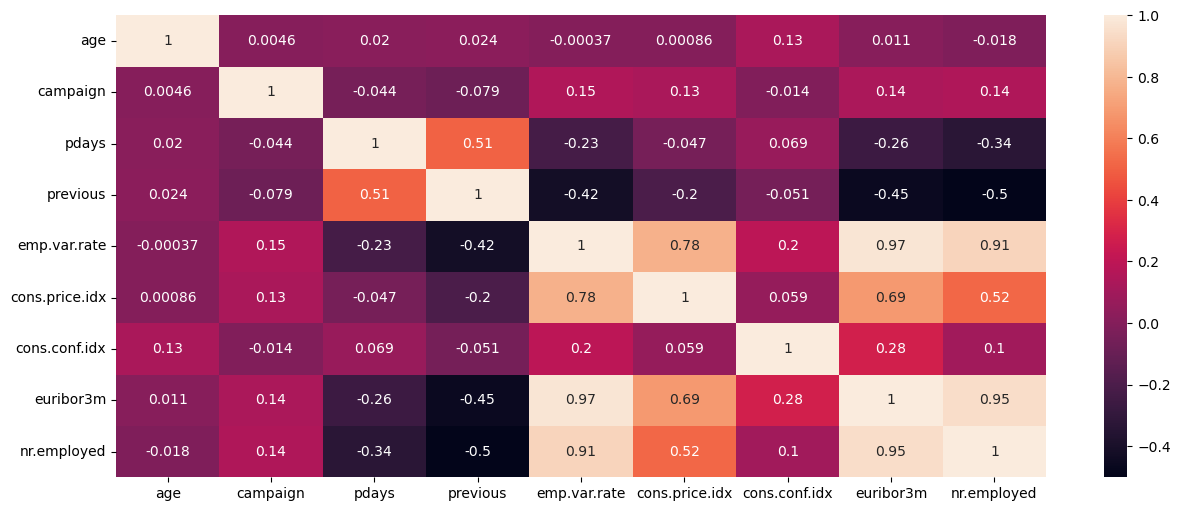

In [43]:
# PATH 1

fig, ax = plt.subplots(figsize=(15,6))

sns.heatmap(num_features[path1].corr(), annot=True)

print("Dataset #1 (Path# 1):\n")
plt.show()

Dataset #2 (Path# 2):



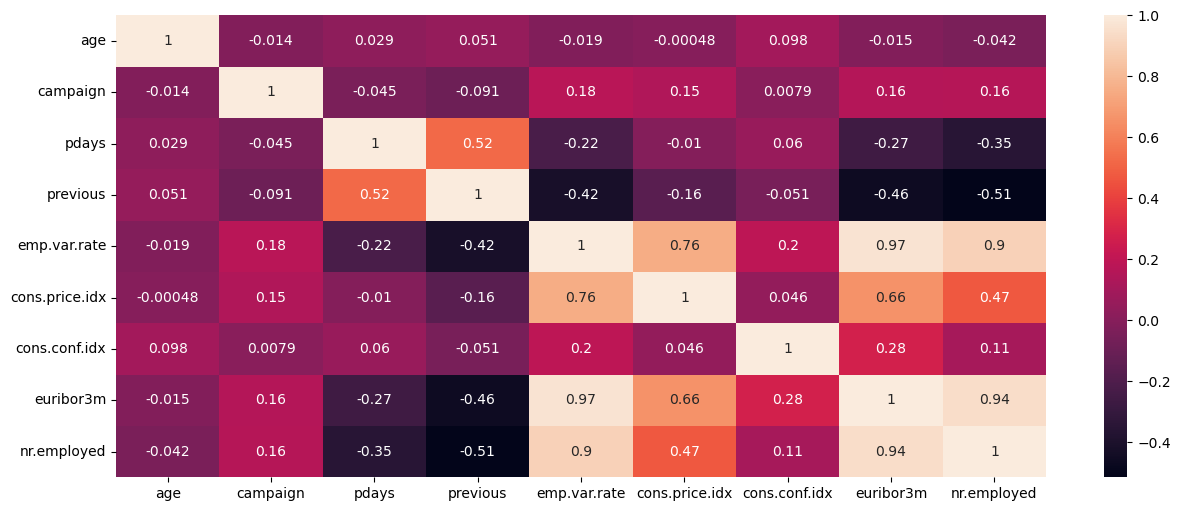

In [44]:
# PATH 2

fig, ax = plt.subplots(figsize=(15,6))

sns.heatmap(num_features[path2].corr(), annot=True)

print("Dataset #2 (Path# 2):\n")
plt.show()

OBSERVATION: There appears to be a high degree of correlation (multicollinearity) between the following features:

- emp.var.rate: Empirical Variable Rate

- nr.employed: Number of Employees (unclear who the employer is without more information)

- euribor3m: 3 month Euribor Interest Rate (the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months)

- cons.price.idx: Consumer Price Index

How can we quantify the degree of multicollinearity that is present? One common method is to calculate the Variance Inflation Factor (VIF), as follows:


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
# Step 1: Set a variable X to the columns whose multicollinearity needs to be
# investigated: (Only the dataset in Path #1 needs to be considered. These
# features are not present in Paths #3 and #4, and Path #2 will follow the same
# trend as Path #1).

X = df_dic[path1][["emp.var.rate",
                   "cons.price.idx",
                   "euribor3m",
                   "nr.employed"]]

# Step 2: Initialize VIF dataframe

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# Step 3: Calculate VIF for each feature in X.

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]

vif_data

Feature           VIF
0    emp.var.rate     22.208023
1  cons.price.idx  18607.679403
2       euribor3m    158.177672
3     nr.employed  20509.149071

These VIF values suggest a very significant degree of multicollinearity, which will need to be addressed prior to the modeling phase.

Perhaps some of the columns here are redundant and may be dropped, or perhaps these columns can be blended (transformed) into a single column that minimizes the negative effects of the current multicollinearity. This will be addressed in the "Next Steps" section of this notebook.

Dataset #3 (Path# 3):



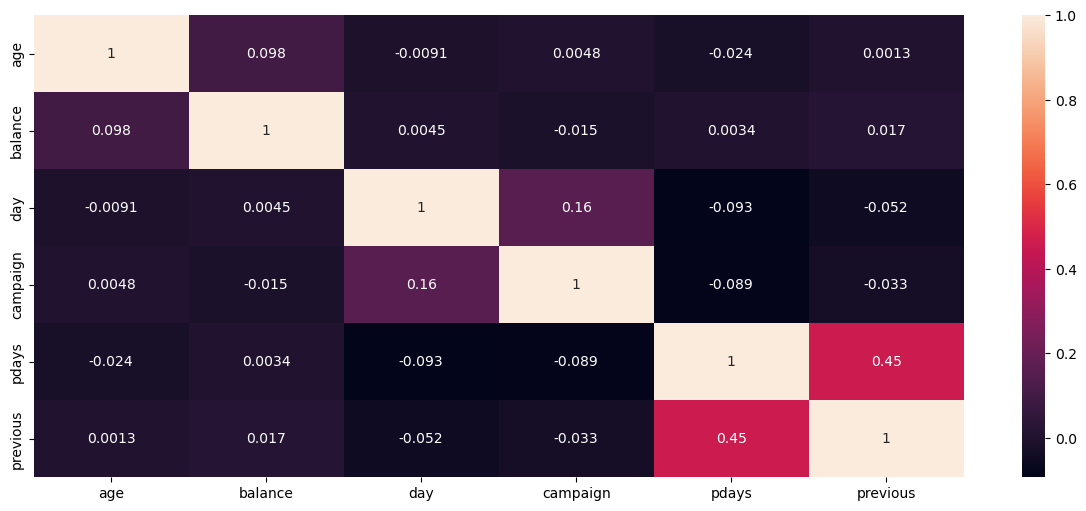

In [47]:
# PATH 3

fig, ax = plt.subplots(figsize=(15,6))

sns.heatmap(num_features[path3].corr(), annot=True)

print("Dataset #3 (Path# 3):\n")
plt.show()

Dataset #4 (Path# 4):



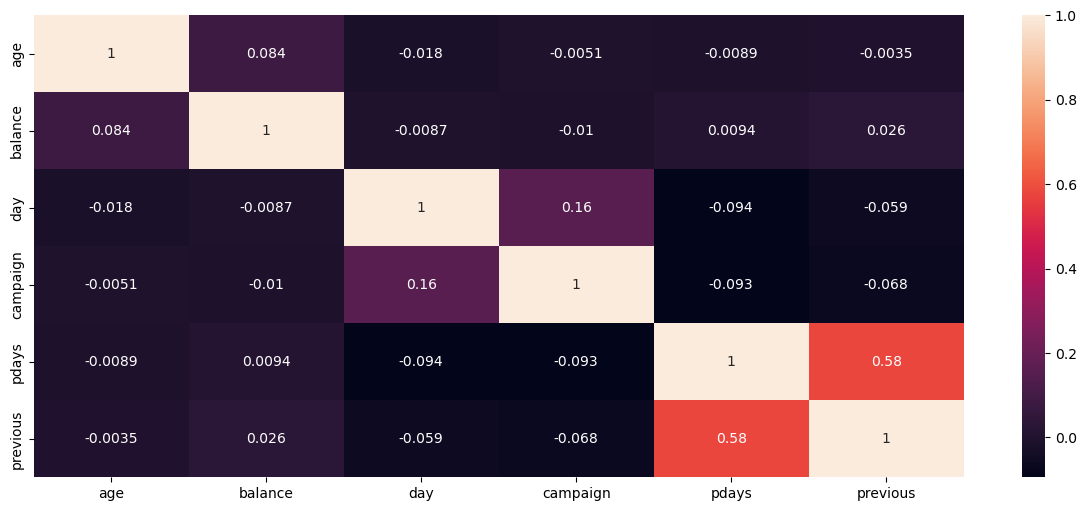

In [48]:
# PATH 4

fig, ax = plt.subplots(figsize=(15,6))

sns.heatmap(num_features[path4].corr(), annot=True)

print("Dataset #4 (Path# 4):\n")
plt.show()

The features in the 3rd and 4th datasets all display low correlation values, except for the "pdays" and "previous" columns, but the correlation among these two is still relatively low.

Let's take a look at histograms of each of these columns, as this may hold valuable information.

Dataset #1 (Path# 1):



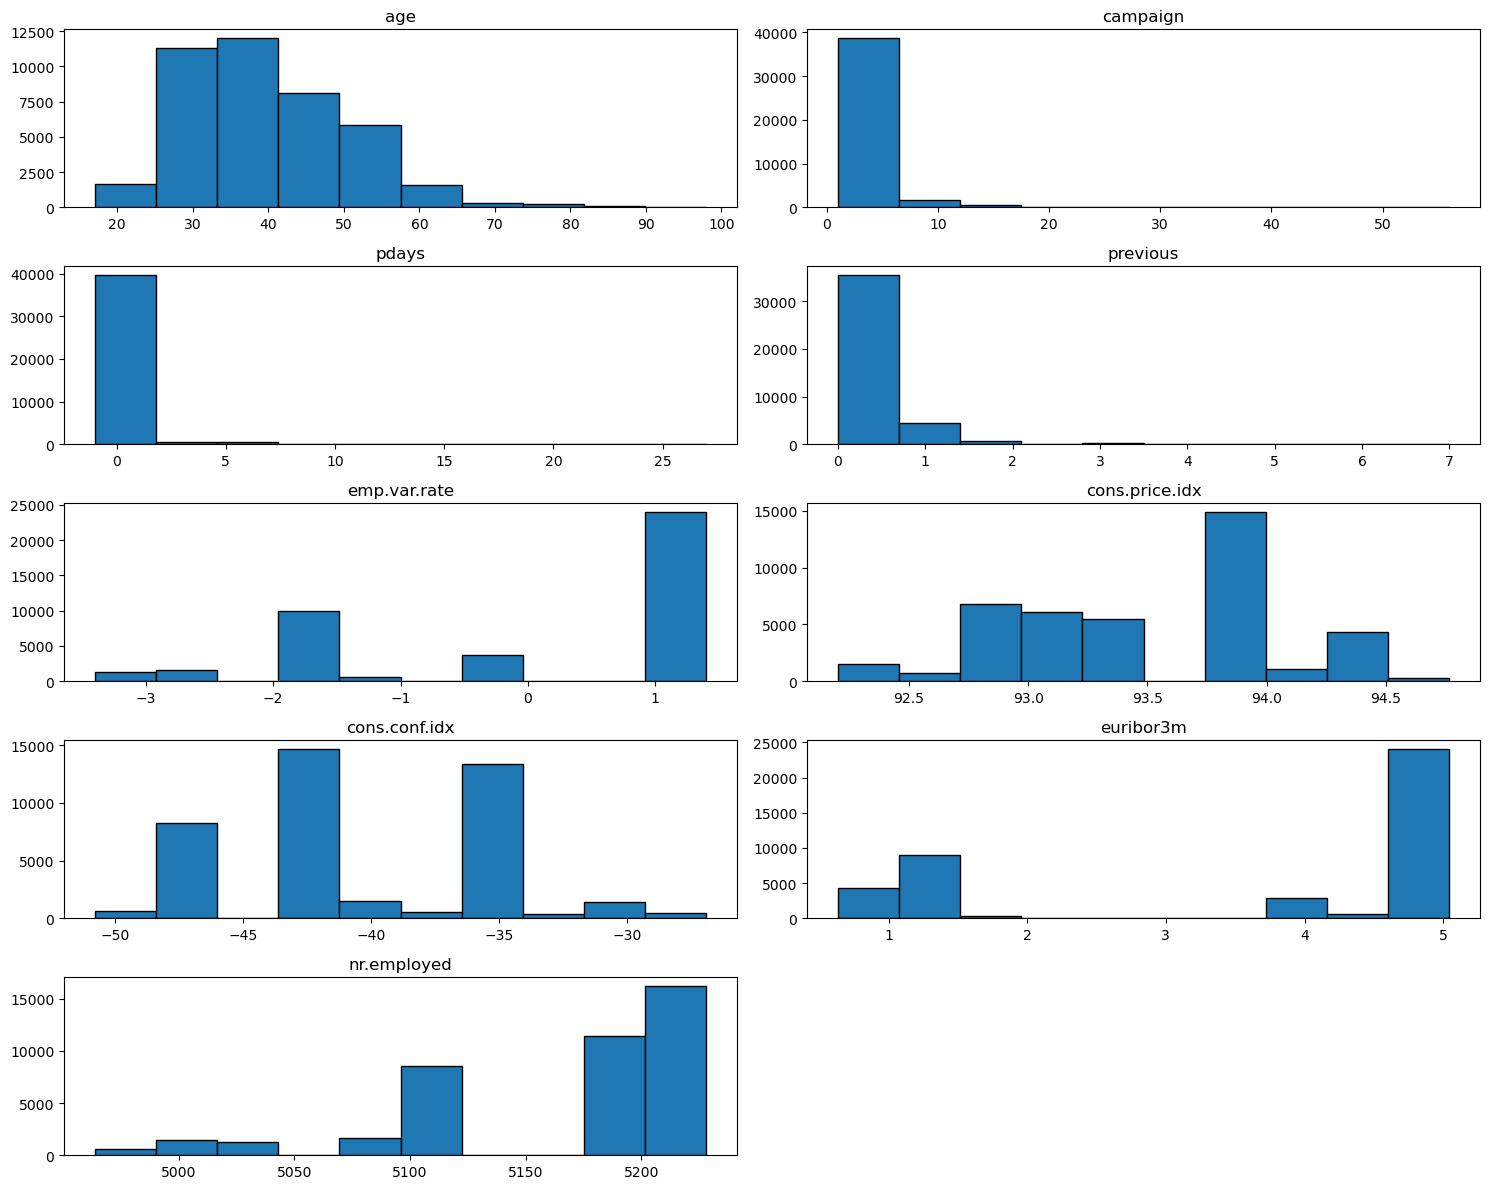

In [49]:
#PATH 1

fig, axs = plt.subplots(5, 2, figsize=(15,12))

fig.delaxes(axs[4,1])

for i, ax in enumerate(fig.axes):
    col = num_columns[path1][i]
    ax.hist(df_dic[path1][col], bins = 10, edgecolor="black")
    ax.set_title(col)

print("Dataset #1 (Path# 1):\n")
fig.tight_layout()

Dataset #2 (Path# 2):



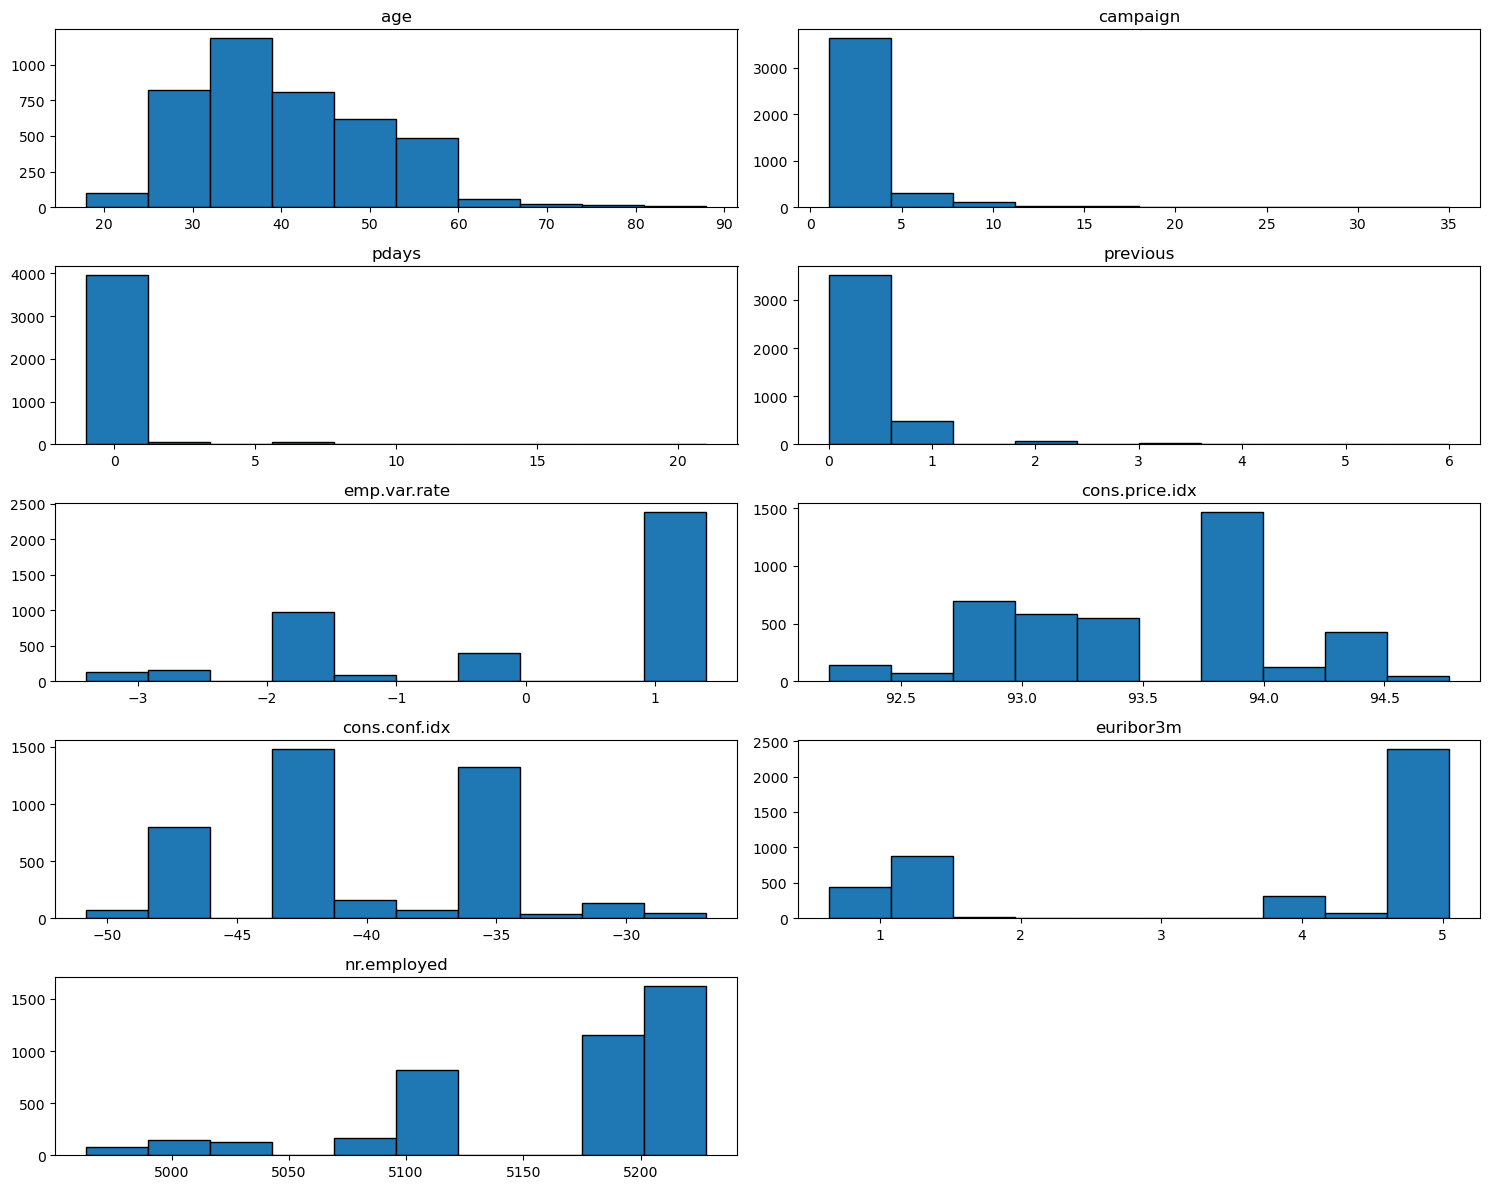

In [50]:
#PATH 2

fig, axs = plt.subplots(5, 2, figsize=(15,12))

fig.delaxes(axs[4,1])

for i, ax in enumerate(fig.axes):
    col = num_columns[path2][i]
    ax.hist(df_dic[path2][col], edgecolor="black")
    ax.set_title(col)

print("Dataset #2 (Path# 2):\n")
fig.tight_layout()

Dataset #3 (Path# 3):



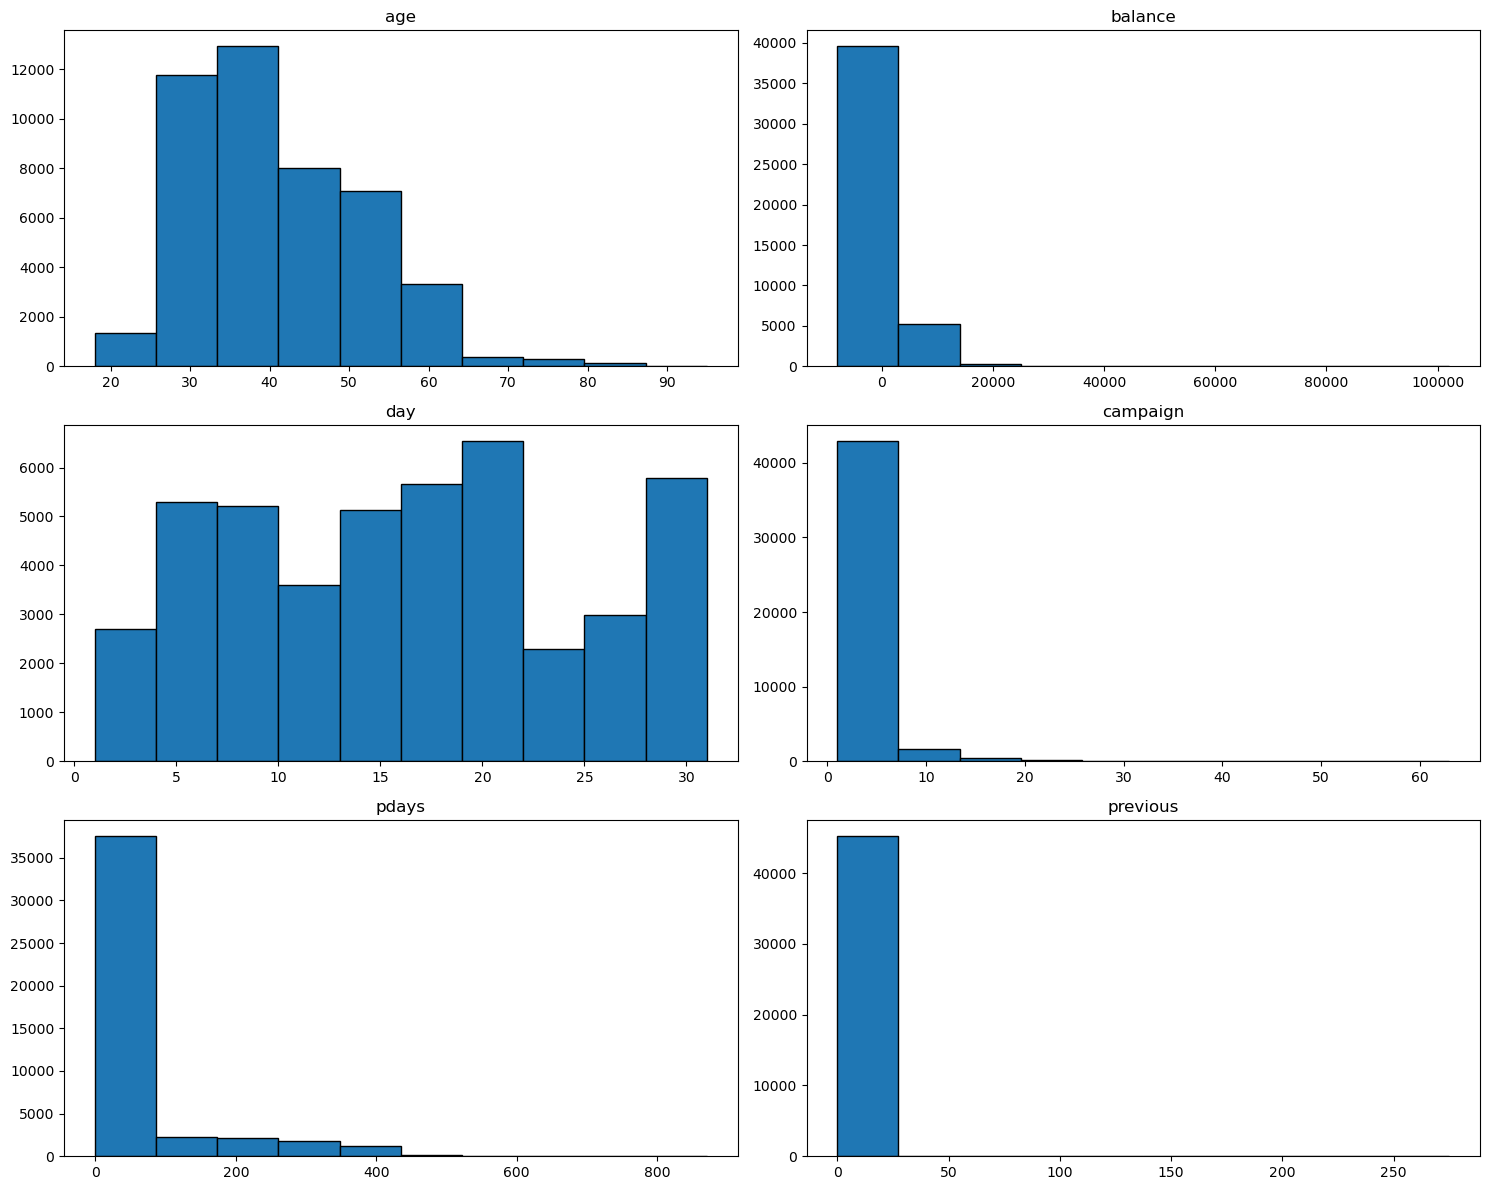

In [51]:
#PATH 3

fig, axs = plt.subplots(3, 2, figsize=(15,12))

for i, ax in enumerate(fig.axes):
    col = num_columns[path3][i]
    ax.hist(df_dic[path3][col], edgecolor="black")
    ax.set_title(col)


print("Dataset #3 (Path# 3):\n")
fig.tight_layout()

Dataset #4 (Path# 4):



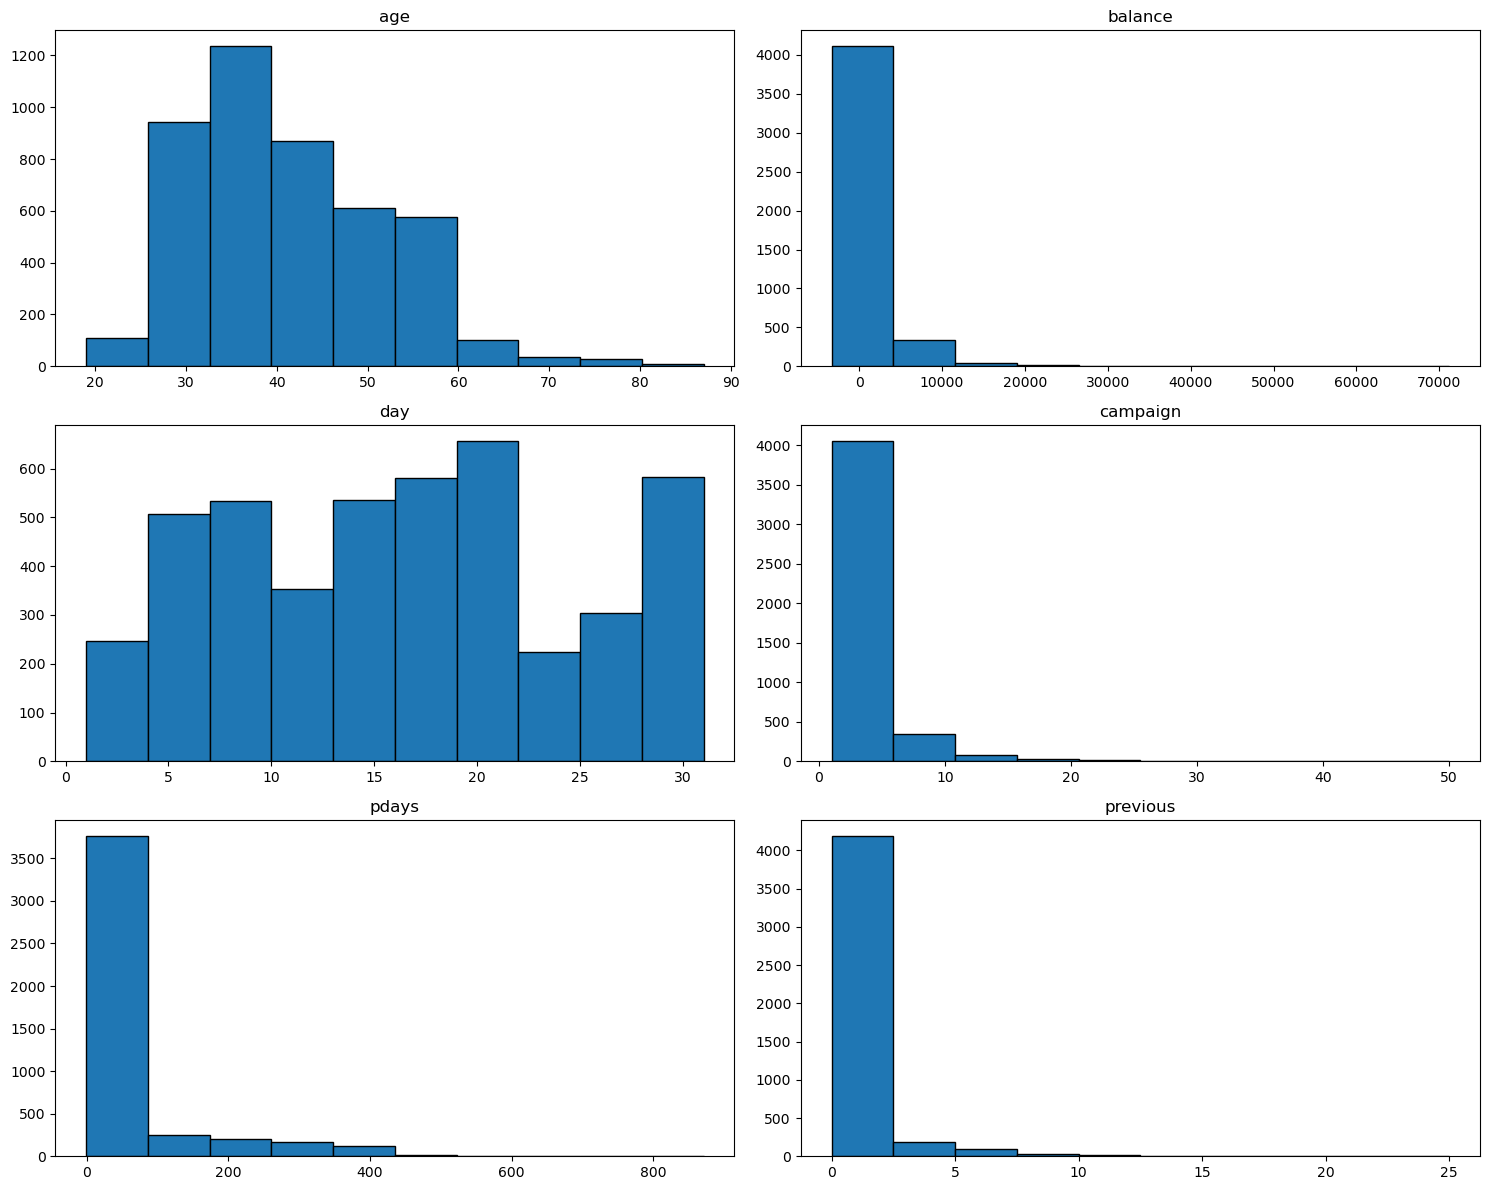

In [52]:
#PATH 4

fig, axs = plt.subplots(3, 2, figsize=(15,12))

for i, ax in enumerate(fig.axes):
    col = num_columns[path4][i]
    ax.hist(df_dic[path4][col], edgecolor="black")
    ax.set_title(col)

print("Dataset #4 (Path# 4):\n")
fig.tight_layout()

The distribution of features appears to be similar between datasets 1 and 2, as well as between datasets 3 and 4, which is to be expected since datasets 2 and 4 are random subsets of datasets 1 and 3, respectively.

For the numerical features, a pairplot with a hue added to highlight the target variable may provide some valuable information.

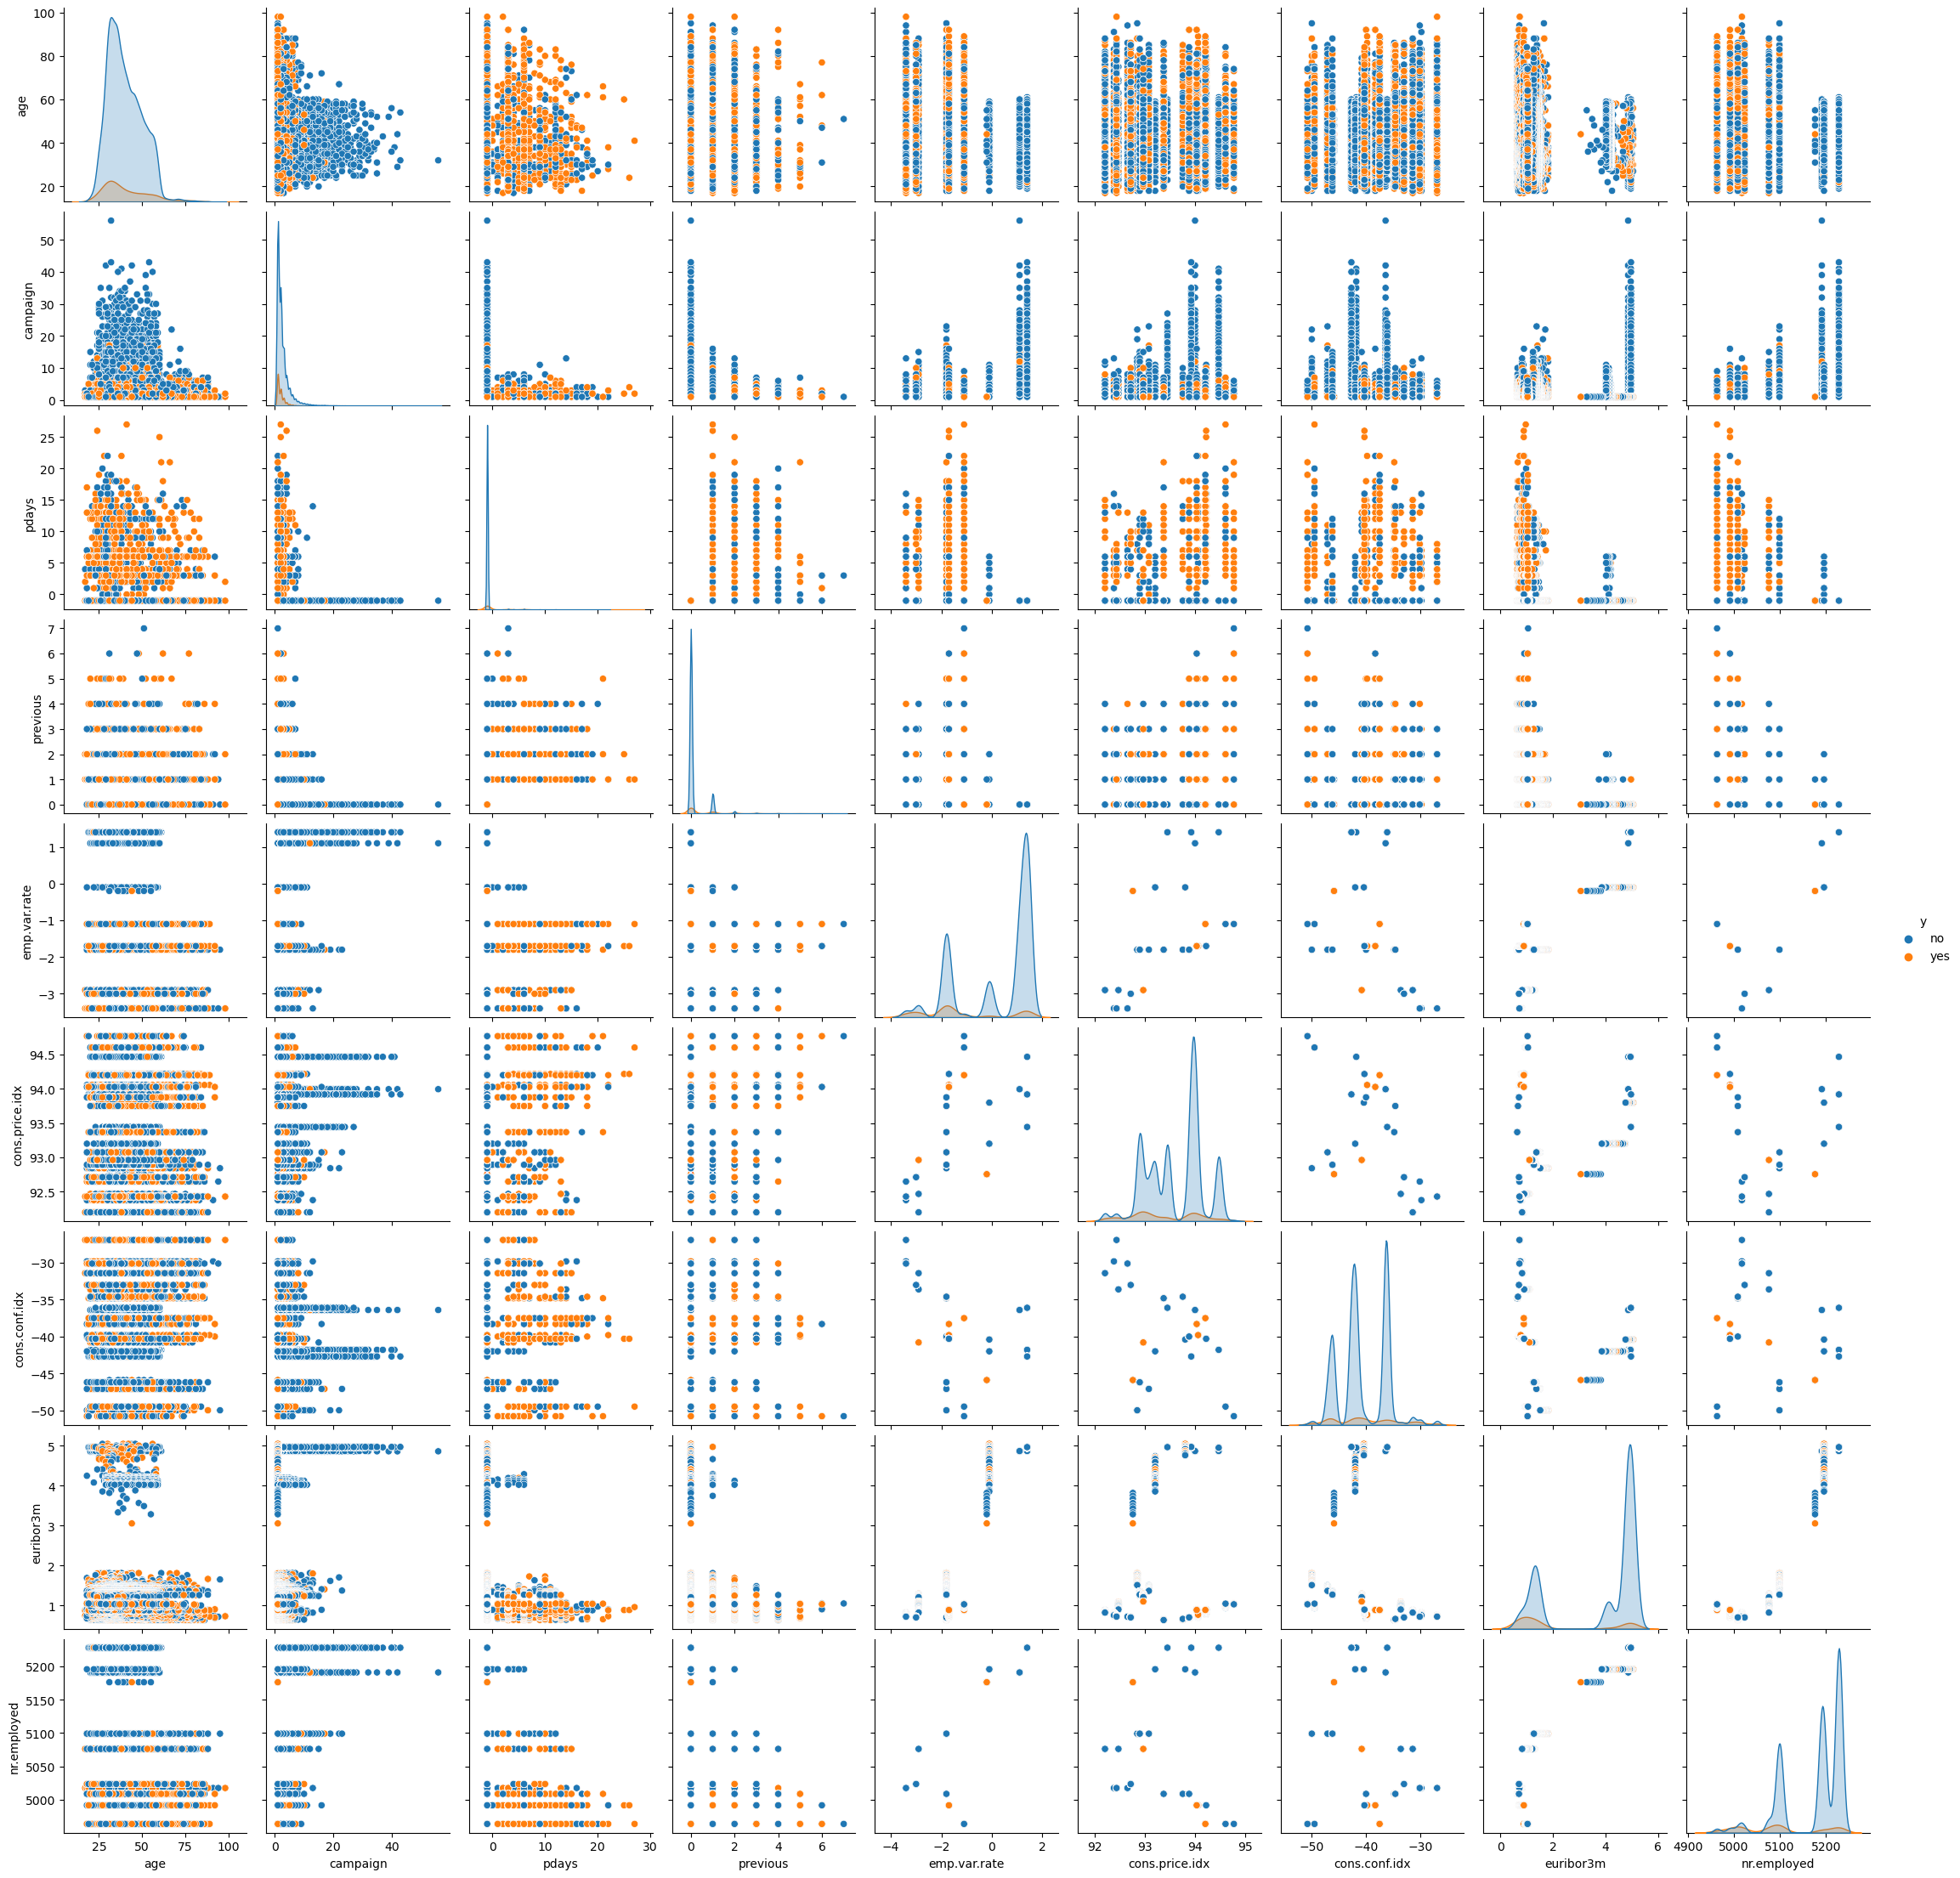

In [53]:
sns.pairplot(df_dic[path1], hue="y")

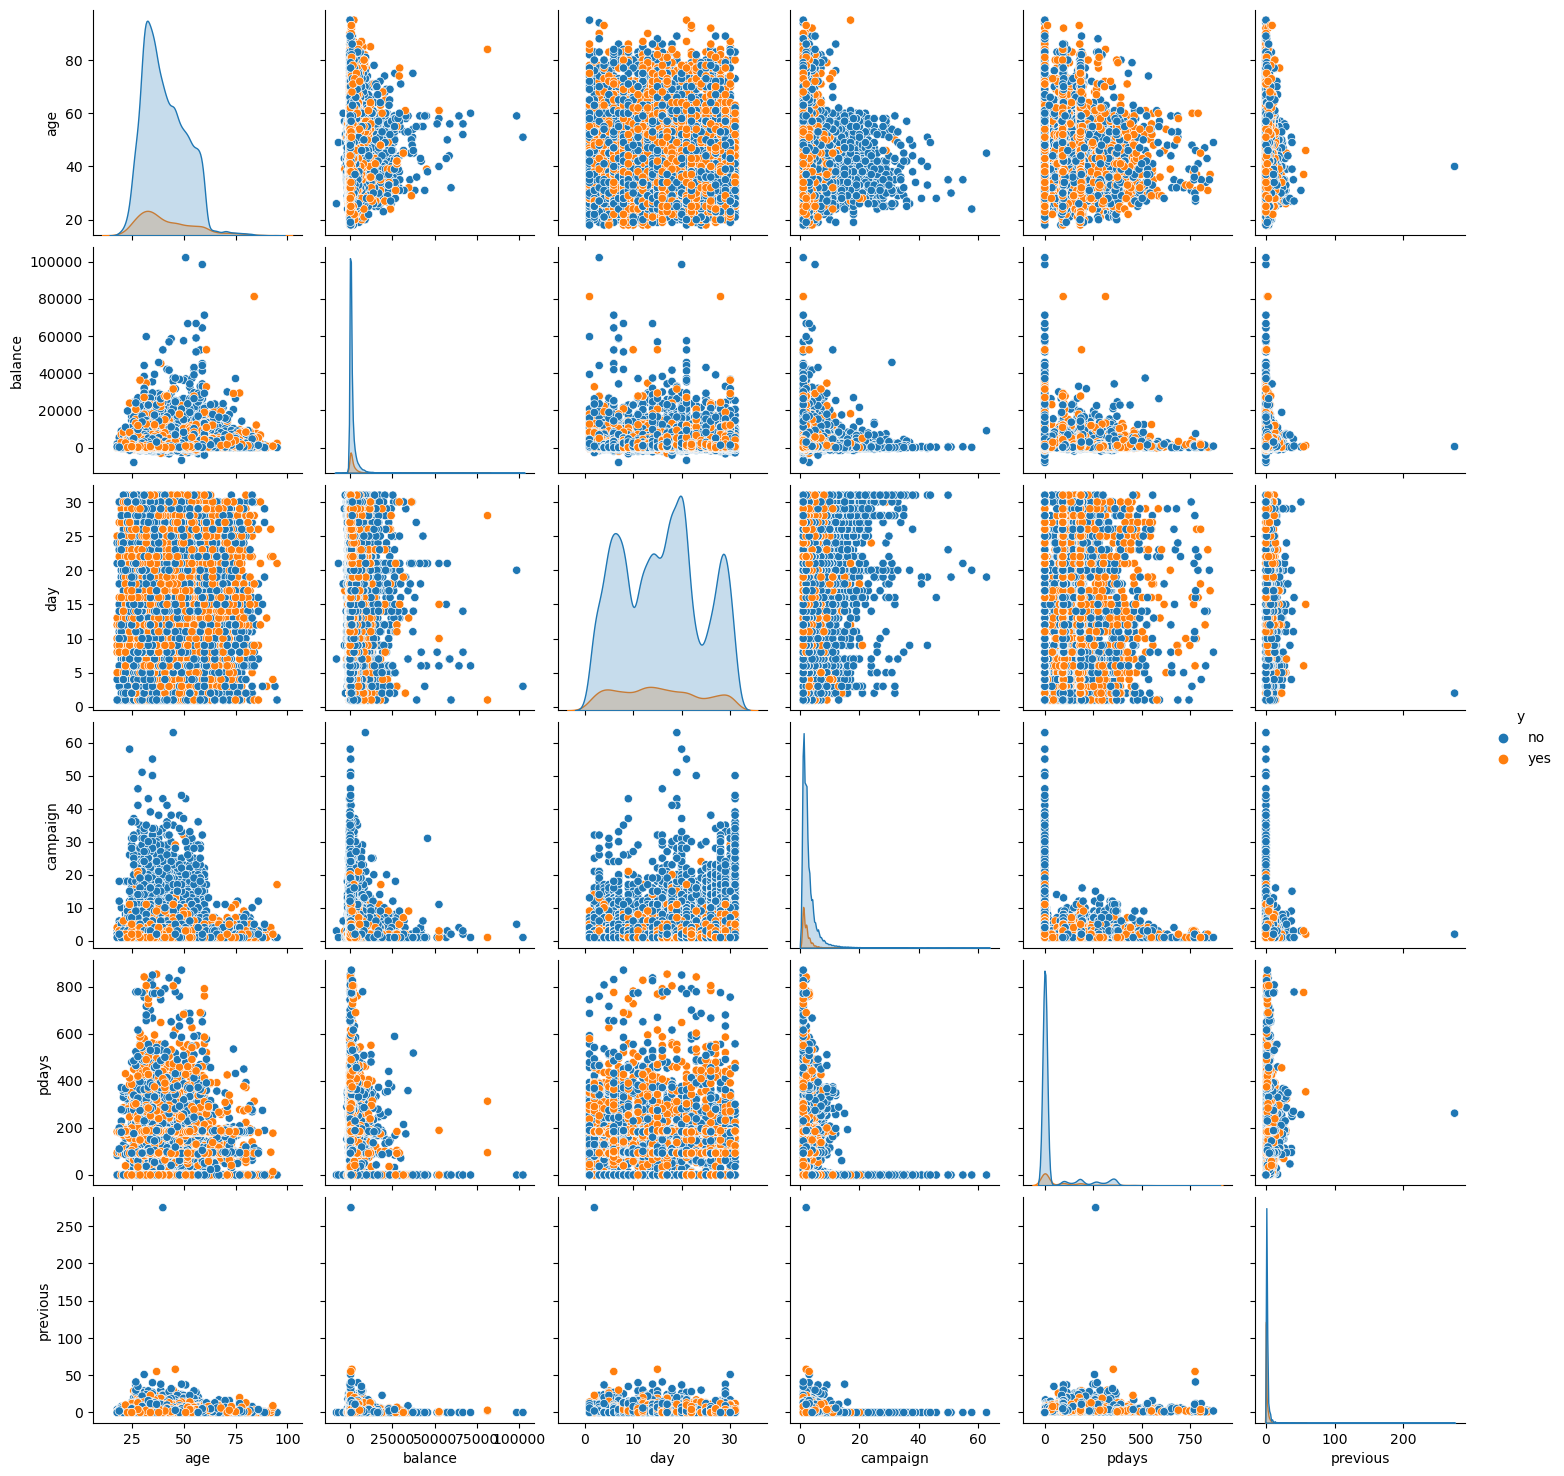

In [54]:
sns.pairplot(df_dic[path3], hue="y")

The pair plot above offers a few valuable insights (focusing on the plots for Path #1 which contains more features):

- The first insight can be seen in the scatterplot of age vs. campaign.

  - This chart shows that for campaign values above 10 or so, for all ages, the number of "yes" respondents appears to decrease dramatically. This may suggest that the campaign value could be a strong indicator of the target variable, with large campaign values indicating a high likelihood of a "no" response, and low campaign values indicating a relatively high likelihood of a "yes" response.

Let's take a closer look at this plot in particular to see if any trends become clearer or more in focus.


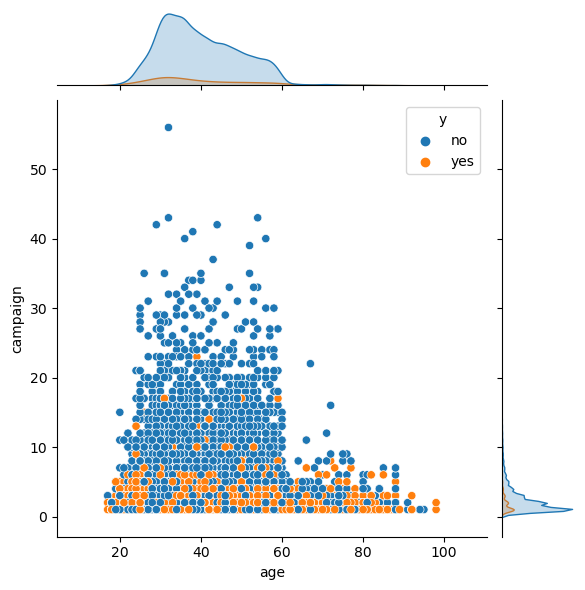

In [55]:
sns.jointplot(x="age", y="campaign", hue="y", data=df_dic[path1])
plt.show()

These plots seem to support the notion that above a certain value for "campaign", the frequency of "yes" responses decreases dramatically. For this reason, "campaign" could be a relatively strong predictor of the target variable.

Another valuable insight from the pairplot lies in the diagonal charts of each of the columns that were previously identified as having a high degree of multicollinearity (emp.var.rate, cons.price.idx, euribor3m, and nr.employed)

  - In each of these charts, there appear to be a number of distinct peaks. In all of these cases, the higher peaks (larger density of rows) tend to be in higher x-axis values. However, the distribution of "yes" responses tends to follow similar peaks, but the height of the peaks of "yes" responses does not appear to increase in height as the x-axis values get larger. This indicates a relatively higher likelihood of responding "yes" in lower x-axis values of these variables, since the height of the "yes" peak is much closer to the height of the combined "yes"/"no" peak.
  
  - This phenomenon can most easily be seen in the euribor3m plot. The first blue peak is significantly lower than the second blue peak, but the first orange peak is actually higher than the second orange peak. This means that for points that fall on the low x-axis range for euribor3m, there is a higher relative likelihood of responding "yes". The same can be said about the other 3 features mentioned above. The fact that all 4 of these features follow this trends further supports the evidence of multicollinearity among this group, which will still need to be addressed.

The pairplot for Path #3 does not seem to have as many immediate takeaways, but one thing to notice is that it also seems to support the notion that above a certain value for campaign, the frequency of  "yes" responses seems to decrease dramatically.

There also appears to be at least one outlier in the "previous" column. This point may need to be removed.

Now let's examine bar charts for the categorical values. In lieu of a pairplot, the frequency of "yes" responses will be plotted directly over the total counts for each feature.

In [56]:
cat_features = {
    path1: df_dic[path1].select_dtypes(include="object"),
    path2: df_dic[path2].select_dtypes(include="object"),
    path3: df_dic[path3].select_dtypes(include="object"),
    path4: df_dic[path4].select_dtypes(include="object")
}

In [57]:
cat_columns = {
    path1: cat_features[path1].columns.tolist(),
    path2: cat_features[path2].columns.tolist(),
    path3: cat_features[path3].columns.tolist(),
    path4: cat_features[path4].columns.tolist()
}

Dataset #1 (Path# 1):



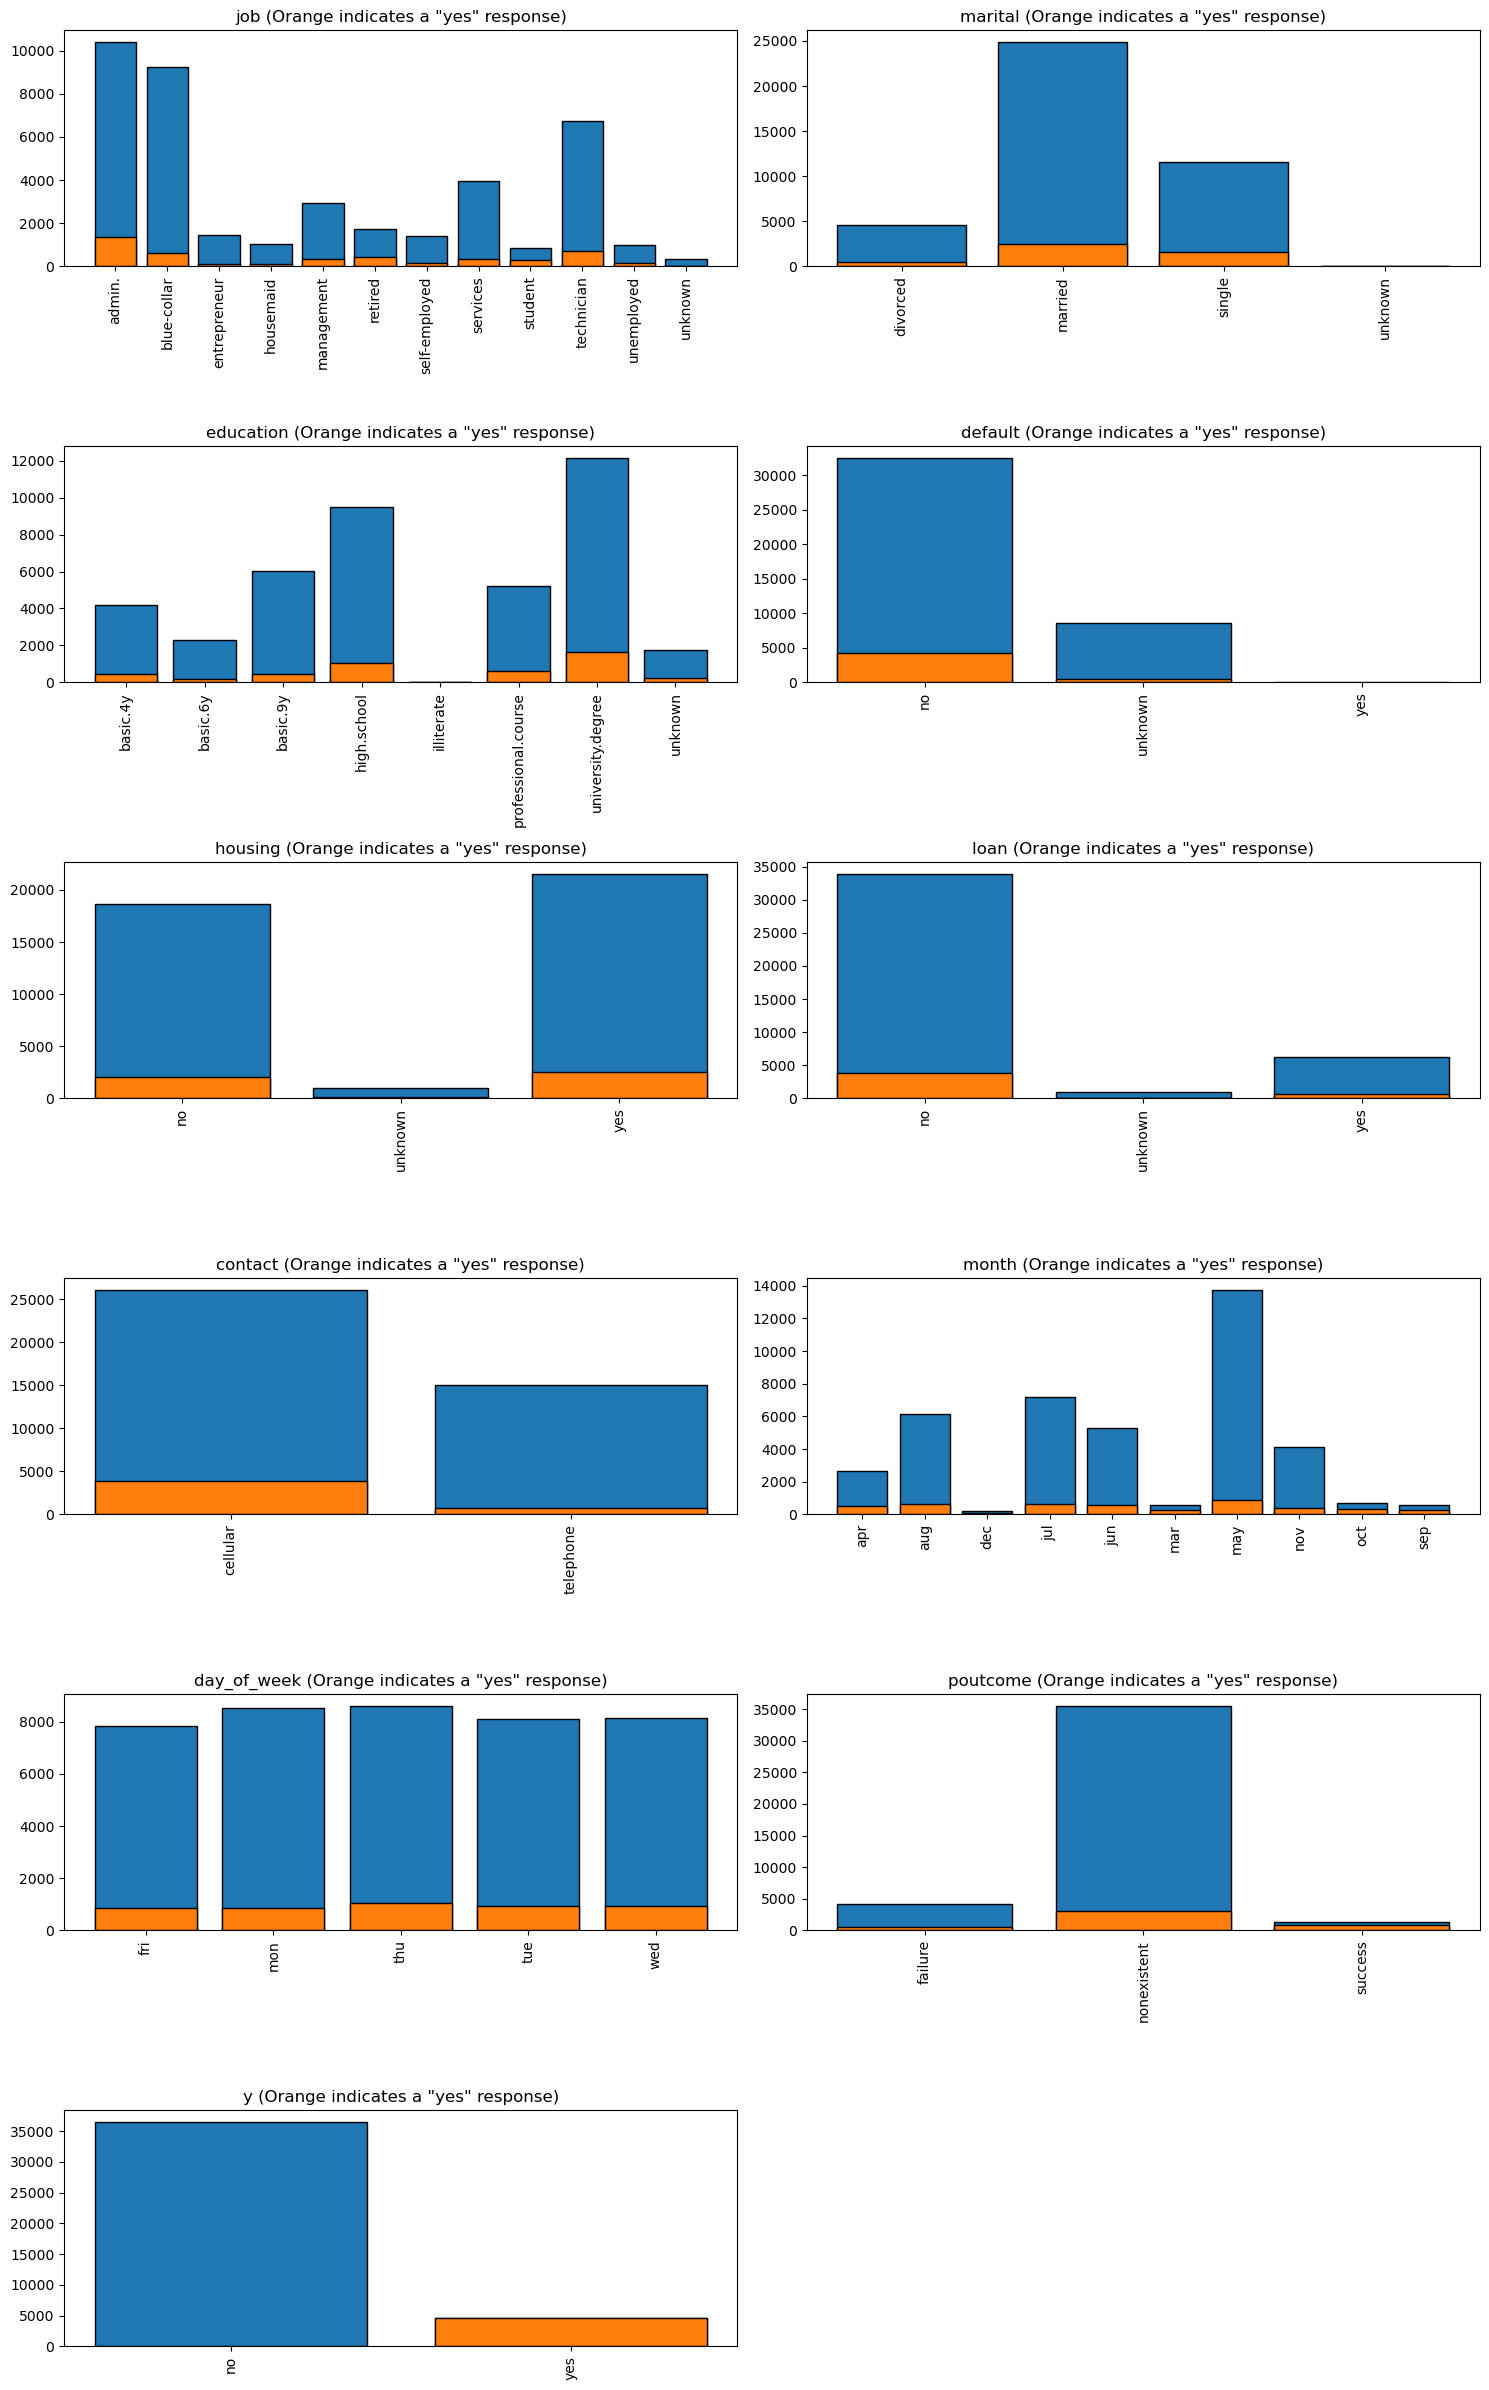

In [58]:
#PATH 1

fig, axs = plt.subplots(6, 2, figsize=(15,24))

fig.delaxes(axs[5,1])

for i, ax in enumerate(fig.axes):
    col = cat_columns[path1][i]
    counts = df_dic[path1][col].value_counts().sort_index()
    y_counts = df_dic[path1][df_dic[path1]["y"] == "yes"][col].value_counts().sort_index()
    ax.bar(counts.index,
        height=counts.values,
        edgecolor="black"
        )
    ax.bar(y_counts.index,
        height=y_counts.values,
        edgecolor="black"
        )
    ax.set_title(col + ' (Orange indicates a "yes" response)')
    ax.set_xticks(counts.index)
    ax.set_xticklabels(counts.index, rotation=90)

print("Dataset #1 (Path# 1):\n")
fig.tight_layout()

Dataset #2 (Path# 2):



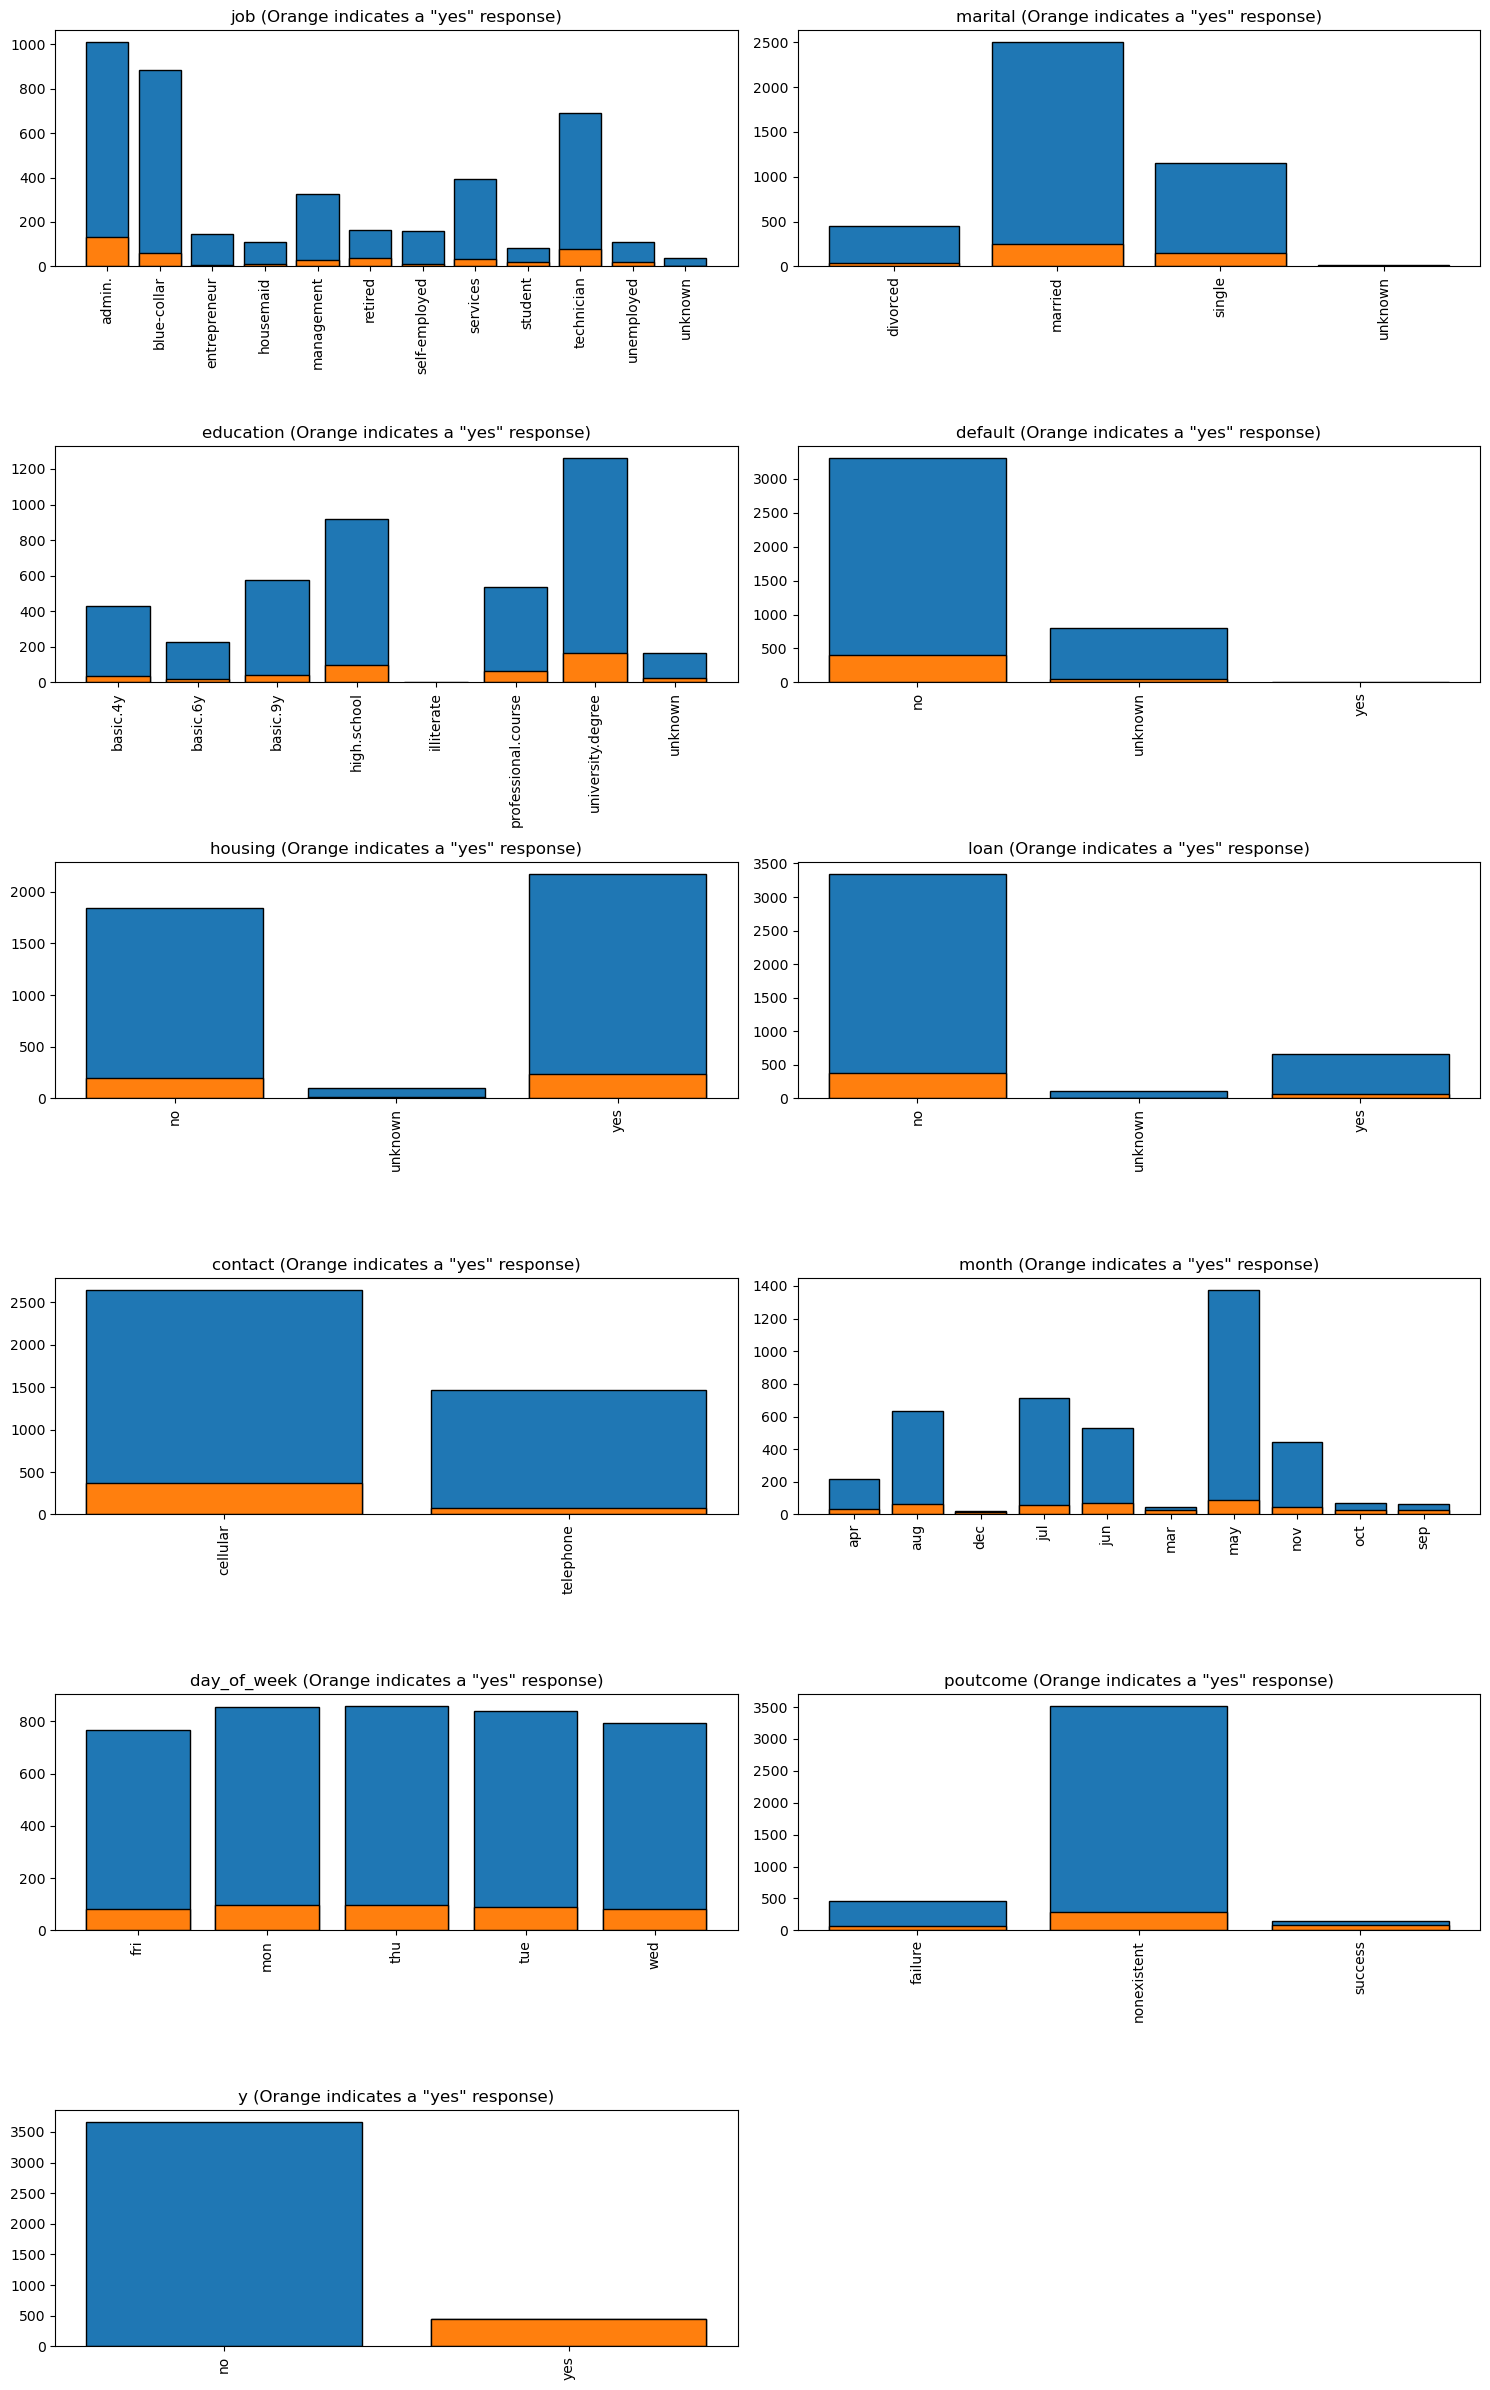

In [59]:
#PATH 2

fig, axs = plt.subplots(6, 2, figsize=(15,24))

fig.delaxes(axs[5,1])

for i, ax in enumerate(fig.axes):
    col = cat_columns[path2][i]
    counts = df_dic[path2][col].value_counts().sort_index()
    y_counts = df_dic[path2][df_dic[path2]["y"] == "yes"][col].value_counts().sort_index()
    ax.bar(counts.index,
        height=counts.values,
        edgecolor="black"
        )
    ax.bar(y_counts.index,
        height=y_counts.values,
        edgecolor="black"
        )
    ax.set_title(col + ' (Orange indicates a "yes" response)')
    ax.set_xticks(counts.index)
    ax.set_xticklabels(counts.index, rotation=90)

print("Dataset #2 (Path# 2):\n")
fig.tight_layout()

Dataset #3 (Path# 3):



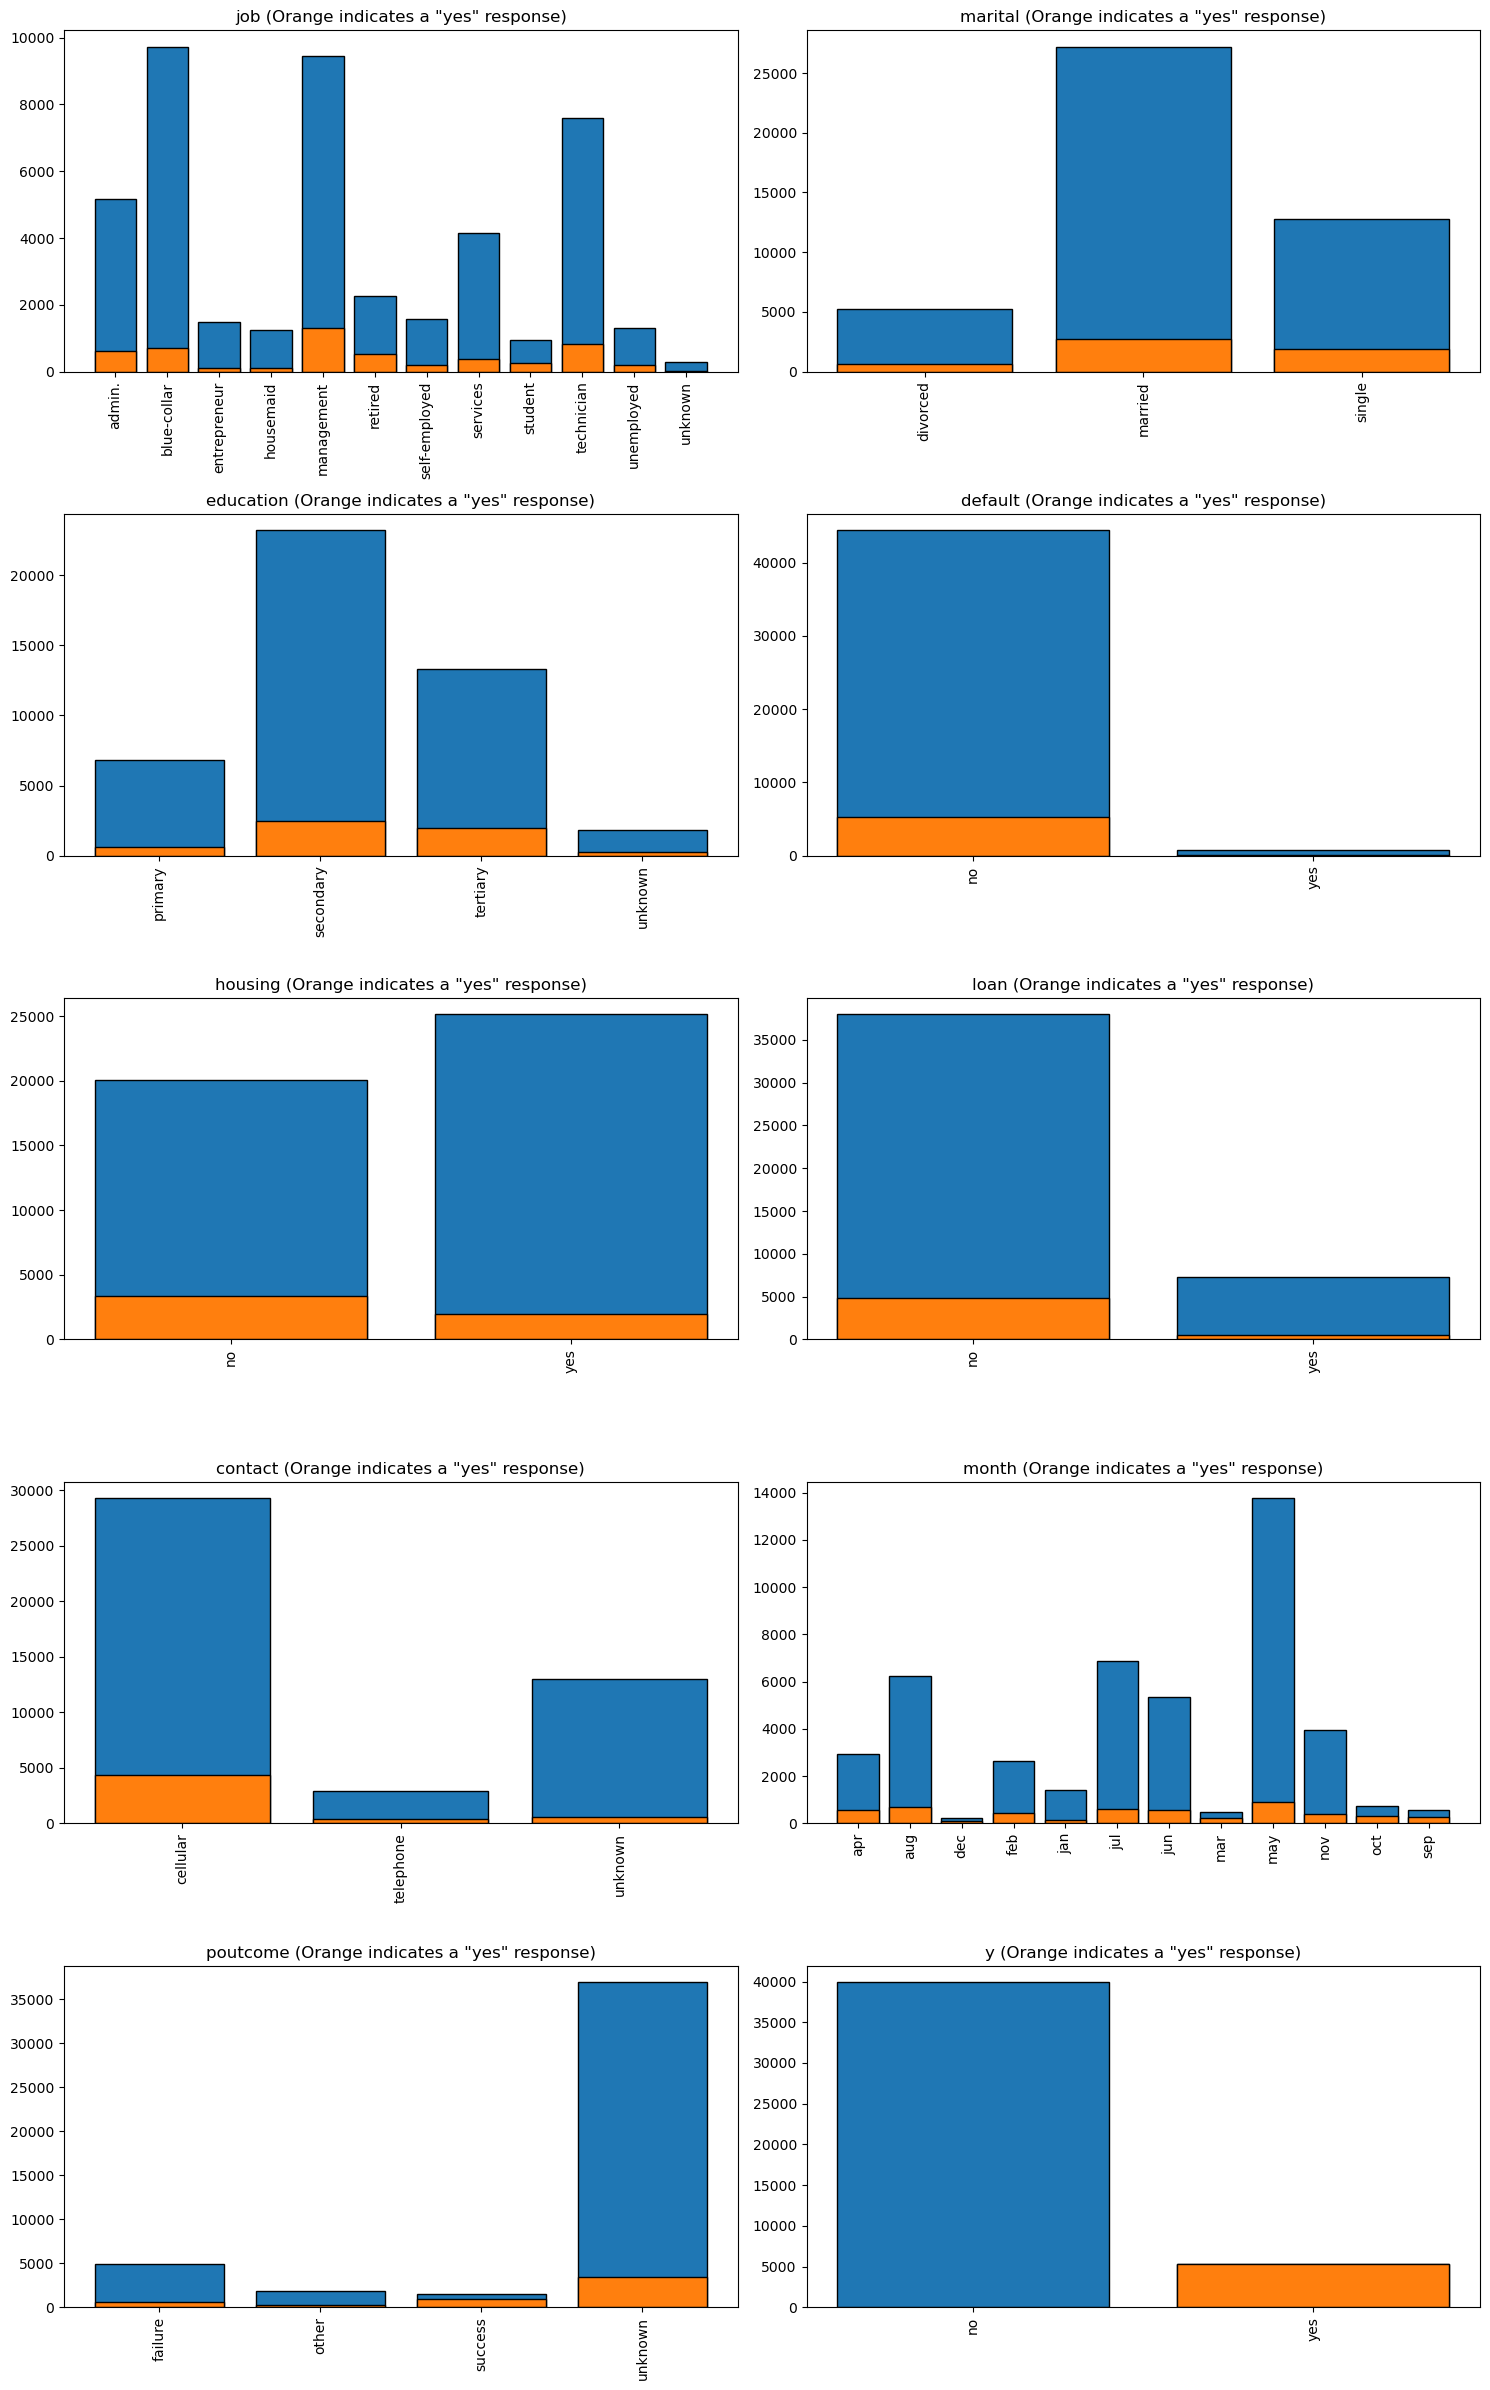

In [60]:
#PATH 3

fig, axs = plt.subplots(5, 2, figsize=(15,24))

for i, ax in enumerate(fig.axes):
    col = cat_columns[path3][i]
    counts = df_dic[path3][col].value_counts().sort_index()
    y_counts = df_dic[path3][df_dic[path3]["y"] == "yes"][col].value_counts().sort_index()
    ax.bar(counts.index,
        height=counts.values,
        edgecolor="black"
        )
    ax.bar(y_counts.index,
        height=y_counts.values,
        edgecolor="black"
        )
    ax.set_title(col + ' (Orange indicates a "yes" response)')
    ax.set_xticks(counts.index)
    ax.set_xticklabels(counts.index, rotation=90)

print("Dataset #3 (Path# 3):\n")
fig.tight_layout()

Dataset #4 (Path# 4):



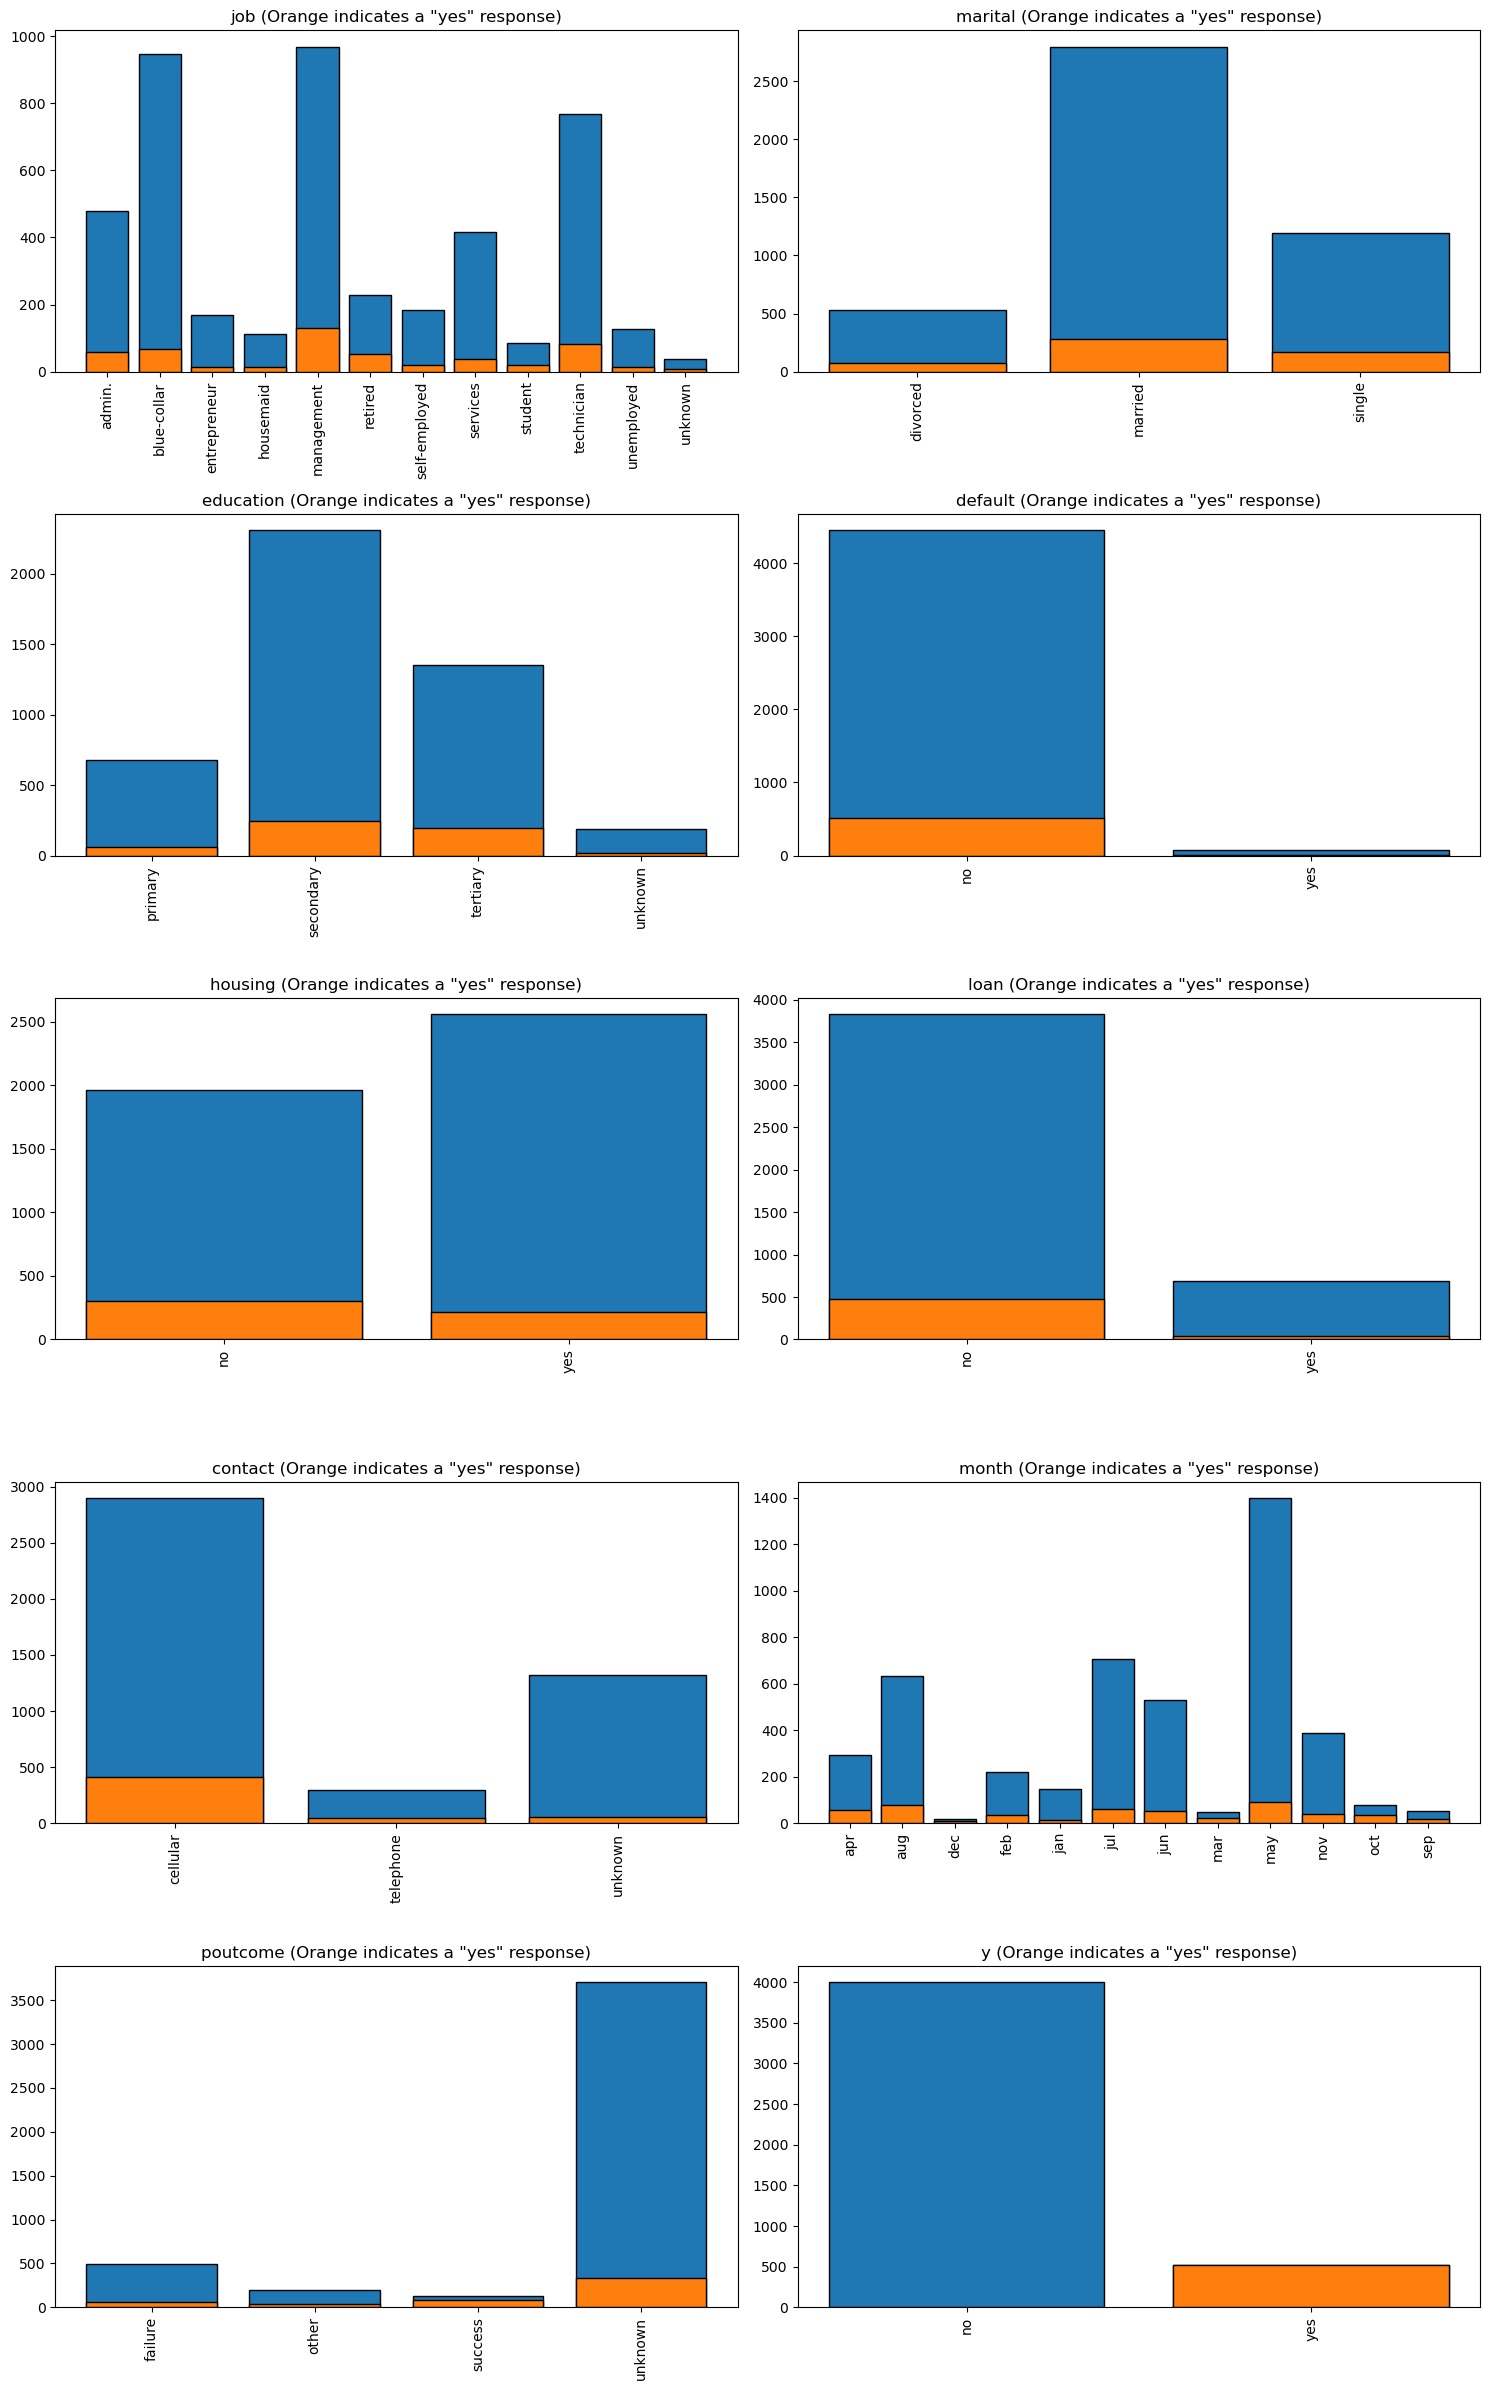

In [61]:
#PATH 4

fig, axs = plt.subplots(5, 2, figsize=(15,24))

for i, ax in enumerate(fig.axes):
    col = cat_columns[path4][i]
    counts = df_dic[path4][col].value_counts().sort_index()
    y_counts = df_dic[path4][df_dic[path4]["y"] == "yes"][col].value_counts().sort_index()
    ax.bar(counts.index,
        height=counts.values,
        edgecolor="black"
        )
    ax.bar(y_counts.index,
        height=y_counts.values,
        edgecolor="black"
        )
    ax.set_title(col + ' (Orange indicates a "yes" response)')
    ax.set_xticks(counts.index)
    ax.set_xticklabels(counts.index, rotation=90)

print("Dataset #4 (Path# 4):\n")
fig.tight_layout()

From the charts of categorical variables alone, it is difficult to immediately draw any conclusions about features that may have a strong predictive value towards "yes" responses; most of the charts shown here have orange bars that are roughly proportional in height to their corresponding blue bar.

Finally, with the categorical variables in datasets 1 and 3, we will apply a Chi-Square test to test the independence of the different features.

This test assumes a null hypothesis that any combination of categorical columns are not associated (they are independent).

In [62]:
from scipy.stats import chi2_contingency
import numpy as np

Dataset 1:

In [63]:
cat_path1 = cat_features[path1].drop("y", axis=1, inplace=False)

# Step 1: Initialize a N x N dataframe of 0 values, where N is the number of
# categorical values to examine.
res = pd.DataFrame(data=[(0 for i in range(cat_path1.shape[1])) for
                         i in range(cat_path1.shape[1])],
                         columns=list(cat_path1.columns))

# Step 2: Set index to the categorical column names
# ([:-1] indexing excludes the target variable)
res.set_index(pd.Index(cat_columns[path1][:-1]), inplace=True)

# Step 3: Calculate p-value for every combination of categorical columns.
for i in cat_columns[path1][:-1]:
    for j in cat_columns[path1][:-1]:
        # Diagonal values not calculated since these indicated the same column.
        if i != j:
            # Compute the cross-tabulation between column i and column j.
            # This is used as the argument for the chi2_contingency class.
            x_tab = pd.crosstab(cat_path1[i], cat_path1[j])
            chi2_val, p_val, dof, expected = chi2_contingency(x_tab)
            res.loc[i, j] = round(p_val, 3)

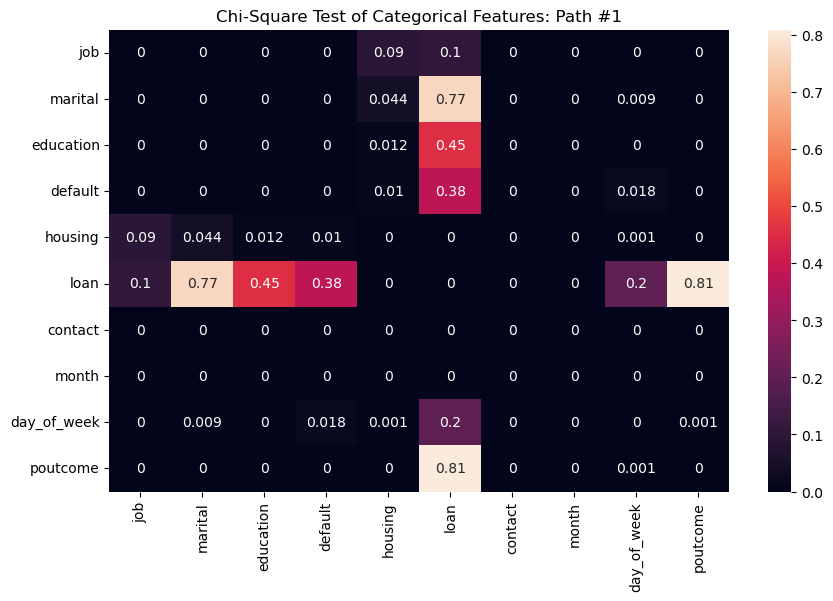

In [64]:
fig = plt.figure(figsize=(10, 6))
sns.heatmap(res, annot=True)
plt.title("Chi-Square Test of Categorical Features: Path #1")
plt.show()

Dataset 3:

In [65]:
cat_path3 = cat_features[path3].drop("y", axis=1, inplace=False)

# Step 1: Initialize a N x N dataframe of 0 values, where N is the number of
# categorical values to examine.
res = pd.DataFrame(data=[(0 for i in range(cat_path3.shape[1])) for
                         i in range(cat_path3.shape[1])],
                         columns=list(cat_path3.columns))

# Step 2: Set index to the categorical column names
# ([:-1] indexing excludes the target variable)
res.set_index(pd.Index(cat_columns[path3][:-1]), inplace=True)

# Step 3: Calculate p-value for every combination of categorical columns.
for i in cat_columns[path3][:-1]:
    for j in cat_columns[path3][:-1]:
        # Diagonal values not calculated since these indicated the same column.
        if i != j:
            # Compute the cross-tabulation between column i and column j.
            # This is used as the argument for the chi2_contingency class.
            x_tab = pd.crosstab(cat_path3[i], cat_path3[j])
            chi2_val, p_val, dof, expected = chi2_contingency(x_tab)
            res.loc[i, j] = round(p_val, 3)

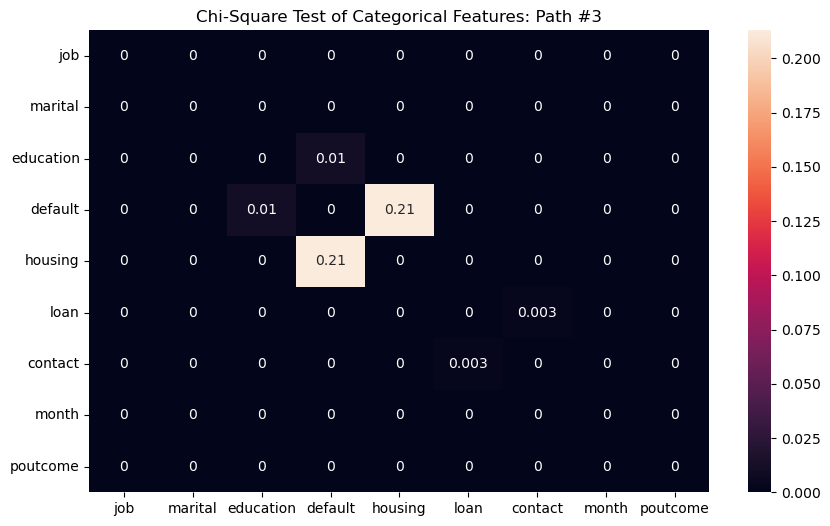

In [66]:
fig = plt.figure(figsize=(10, 6))
sns.heatmap(res, annot=True)
plt.title("Chi-Square Test of Categorical Features: Path #3")
plt.show()

## Surprises

This exploratory data analysis has provided some surprising results.

- The first big surprise is the magnitude of the values that were calculated for the Variance Inflation Factor for the numerical columns that were expected to have some degree of multicollinearity. This result suggests a surprisingly high correlation among these features, and this shows that it will be imperative to account for this prior to beginning the modeling phase.

- The second big surprise was in the results of the Chi-Square test for association among the categorical values. This test assumes a null hypothesis that there is not association or correlation between any two of the categorical features. However the large number of 0 that was produced for the p-values in the heatmap above suggest that this hypothesis should be rejected in almost every pair of categorical features. This is surprising enough that this result should be verified, and if validated this only increases the need for principal component analysis to mitigate the effects of these columns being dependent on one another.

## Next Steps

As we saw above, each dataset is imbalanced in regards to its target column. To address this, three methods of random sampling will be applied and compared.

In [67]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTENC

In [68]:
sampler = RandomUnderSampler(random_state=100)

undersampled = {}

for path in df_dic.keys():
    x_sample, y_sample = sampler.fit_resample(
        df_dic[path].drop("y", axis=1),
        df_dic[path]["y"]
        )

    undersampled[path] = x_sample
    undersampled[path]["y"] = y_sample

In [69]:
for path in undersampled:
    print(undersampled[path].shape)

(9280, 20)
(902, 20)
(10578, 16)
(1042, 16)


In [70]:
sampler = RandomOverSampler(random_state=100)

oversampled = {}

for path in df_dic.keys():
    x_sample, y_sample = sampler.fit_resample(
        df_dic[path].drop("y", axis=1),
        df_dic[path]["y"]
        )

    oversampled[path] = x_sample
    oversampled[path]["y"] = y_sample

In [71]:
for path in oversampled:
    print(oversampled[path].shape)

(73096, 20)
(7336, 20)
(79844, 16)
(8000, 16)


In [72]:
# For SMOTENC, the numerical index of each categorical feature is required.
# Create a dictionary cat_cols which stores a list for each path containing
# the numerical indices of categorical columns.

cat_cols ={}

for path in df_dic.keys():
    cat_cols[path] = [df_dic[path].columns.get_loc(i) for i in cat_columns[path]]

In [73]:
smotesampled = {}

for path in df_dic.keys():
    sampler = SMOTENC(categorical_features = cat_cols[path][:-1], random_state=100)

    x_sample, y_sample = sampler.fit_resample(
        df_dic[path].drop("y", axis=1),
        df_dic[path]["y"]
        )

    smotesampled[path] = x_sample
    smotesampled[path]["y"] = y_sample

In [74]:
for path in smotesampled:
    print(smotesampled[path].shape)

(73096, 20)
(7336, 20)
(79844, 16)
(8000, 16)


In addition to the sampling above, there are a few critical next steps that need to be taken (some may need to be added before the sampling takes place).

- The surprising results from calculating both the VIF and Chi-Square tests should be verified as accurate. If these are found to be accurate, this demonstrates a high degree of multicollinearity and mutual dependence among some features. This underscores the need for principal component analysis.

- Apply principal component analysis. This will transform the features to mitigate the negative effects of multicollinearity, and will also identify which transformed features provide the most predictive value.

  - Various data transformations may be needed before principal component analysis can take place. This will involve removing any outliers, scaling (normalizing) the numerical columns, and label encoding the categorical columns.

- Following all data transformation/preparation, the finished datasets should be output to .csv files so that they can be saved externally and loaded into a seperate notebook dedicated to modeling.

- When the data preparation is completed, modeling can begin to determine which type of model is best suited for this task. This process will include a dynamic process for hyper-parameter tuning, in which a grid search will iteratively be performed for each model to narrow down on optimal parameters.

- An artificial neural network will be employed to convert the classification problem into a regression problem, where the goal will be to assign a probability of a "yes" response rather than a simple "yes" or "no".

## Additional Preparation for Milestone 3:

As a first step of continued data preparation, the VIF results will be re-examined to ensure their validity.

After some research, it was found from the post here: https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python, that the variance_inflation_factor class expects the presense of a constant in the matrix of explanatory variables.

In the updated calculation below, the add_constant class is used to remedy this, and the results below are much closer to what should be expected (according to this link here: https://www.sciencedirect.com/topics/mathematics/variance-inflation-factor).

In [75]:
from statsmodels.tools.tools import add_constant

In [76]:
# Step 1: Set a variable X to the columns whose multicollinearity needs to be
# investigated: (Only the dataset in Path #1 needs to be considered. These
# features are not present in Paths #3 and #4, and Path #2 will follow the same
# trend as Path #1).

X = df_dic[path1][["emp.var.rate",
                   "cons.price.idx",
                   "euribor3m",
                   "nr.employed"]]

# Step 2: Use add_constant to add a constant to the matrix of explanatory features.

Y = add_constant(X)

# Step 3: Initialize VIF dataframe

vif_data = pd.DataFrame()
vif_data["Feature"] = Y.columns

# Step 4: Calculate VIF for each feature in Y.

vif_data["VIF"] = [variance_inflation_factor(Y.values, i)
                  for i in range(len(Y.columns))]

vif_data

Feature            VIF
0           const  301976.235832
1    emp.var.rate      32.552010
2  cons.price.idx       4.676916
3       euribor3m      31.143466
4     nr.employed      14.392892

The Science Direct article states as a rule of thumb that a VIF of 10 or above indicates that a given feature displays a high degree of multicollinearity, and other sources (like this one here: https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/) state the rule of thumb as low as 5. With this in mind, we will assume that even cons.price.idx with a VIF value of 5 (rounded up), meets the criteria of high multicollinearity.

Using the add_constant step of this analysis created results that seem much more in line with what should be expected, and gives a much greater degree of confidence that these results can be trusted. This doesn't change the fact that we already assumed a high degree of multicollinearity among these variables, but it solidifies this result.

### Re-assessing the Chi-Square Results

In [77]:
cat_path1 = cat_features[path1].drop("y", axis=1, inplace=False)

# Step 1: Initialize a N x N dataframe of 0 values, where N is the number of
# categorical values to examine.
res = pd.DataFrame(data=[(0 for i in range(cat_path1.shape[1])) for
                         i in range(cat_path1.shape[1])],
                         columns=list(cat_path1.columns))

# Step 2: Set index to the categorical column names
# ([:-1] indexing excludes the target variable)
res.set_index(pd.Index(cat_columns[path1][:-1]), inplace=True)

# Step 3: Calculate p-value for every combination of categorical columns.
for i in cat_columns[path1][:-1]:
    for j in cat_columns[path1][:-1]:
        # Diagonal values not calculated since these indicated the same column.
        if i != j:
            # Compute the cross-tabulation between column i and column j.
            # This is used as the argument for the chi2_contingency class.
            x_tab = pd.crosstab(cat_path1[i], cat_path1[j])
            chi2_val, p_val, dof, expected = chi2_contingency(x_tab)
            # Print only one side of the diagonal to avoid duplicates.
            if cat_columns[path1].index(i) < cat_columns[path1].index(j):
                print("i:", i, "j:", j)
                print("Cross-Table:")
                print(x_tab)
                print()
                print("p:", p_val)
                print("----------------")
            res.loc[i, j] = p_val

i: job j: marital
Cross-Table:
marital        divorced  married  single  unknown
job                                              
admin.             1280     5253    3875       14
blue-collar         728     6687    1825       14
entrepreneur        179     1071     203        3
housemaid           161      777     119        3
management          331     2089     501        3
retired             348     1274      93        5
self-employed       133      904     379        5
services            532     2294    1137        6
student               9       41     824        1
technician          774     3670    2287       12
unemployed          124      634     251        5
unknown              13      234      74        9

p: 0.0
----------------
i: job j: education
Cross-Table:
education      basic.4y  basic.6y  basic.9y  high.school  illiterate  \
job                                                                    
admin.               77       151       499         3329           

i: education j: default
Cross-Table:
default                 no  unknown  yes
education                               
basic.4y              2477     1699    0
basic.6y              1441      851    0
basic.9y              4418     1627    0
high.school           7904     1610    1
illiterate              11        7    0
professional.course   4436      805    2
university.degree    10718     1450    0
unknown               1183      548    0

p: 0.0
----------------
i: education j: housing
Cross-Table:
housing                no  unknown   yes
education                               
basic.4y             1955      117  2104
basic.6y             1070       60  1162
basic.9y             2743      151  3151
high.school          4363      220  4932
illiterate              8        0    10
professional.course  2280      125  2838
university.degree    5387      277  6504
unknown               816       40   875

p: 0.011808826428446363
----------------
i: education j: loan
Cross-Table:
loan 

i: day_of_week j: poutcome
Cross-Table:
poutcome     failure  nonexistent  success
day_of_week                               
fri              903         6703      221
mon              873         7364      277
thu              867         7442      314
tue              805         6994      291
wed              804         7060      270

p: 0.001274690891145738
----------------


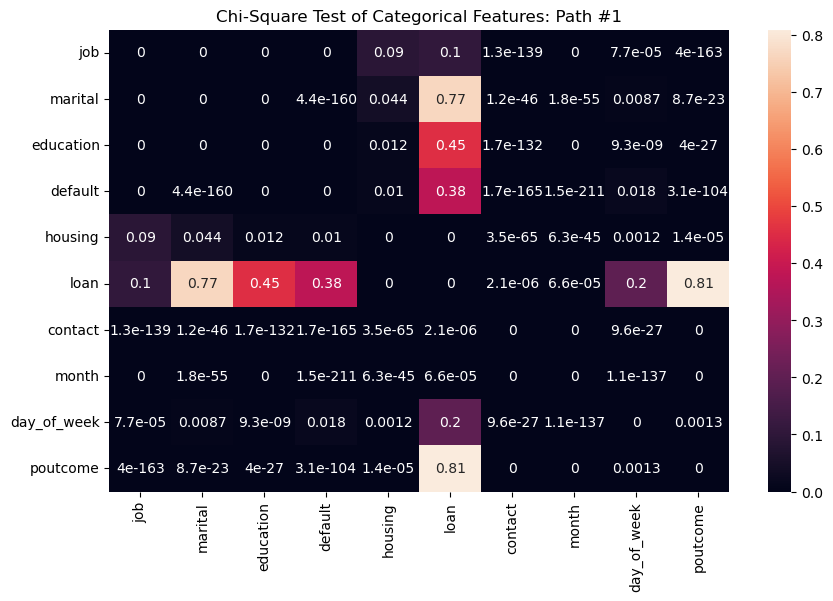

In [78]:
fig = plt.figure(figsize=(10, 6))
sns.heatmap(res, annot=True)
plt.title("Chi-Square Test of Categorical Features: Path #1")
plt.show()

In [79]:
cat_path3 = cat_features[path3].drop("y", axis=1, inplace=False)

# Step 1: Initialize a N x N dataframe of 0 values, where N is the number of
# categorical values to examine.
res = pd.DataFrame(data=[(0 for i in range(cat_path3.shape[1])) for
                         i in range(cat_path3.shape[1])],
                         columns=list(cat_path3.columns))

# Step 2: Set index to the categorical column names
# ([:-1] indexing excludes the target variable)
res.set_index(pd.Index(cat_columns[path3][:-1]), inplace=True)

# Step 3: Calculate p-value for every combination of categorical columns.
for i in cat_columns[path3][:-1]:
    for j in cat_columns[path3][:-1]:
        # Diagonal values not calculated since these indicated the same column.
        if i != j:
            # Compute the cross-tabulation between column i and column j.
            # This is used as the argument for the chi2_contingency class.
            x_tab = pd.crosstab(cat_path3[i], cat_path3[j])
            chi2_val, p_val, dof, expected = chi2_contingency(x_tab)
            if cat_columns[path3].index(i) < cat_columns[path3].index(j):
                print("i:", i, "j:", j)
                print("Cross-Table:")
                print(x_tab)
                print()
                print("p:", p_val)
                print("----------------")
            res.loc[i, j] = p_val

i: job j: marital
Cross-Table:
marital        divorced  married  single
job                                     
admin.              750     2693    1728
blue-collar         750     6968    2014
entrepreneur        179     1070     238
housemaid           184      912     144
management         1111     5400    2947
retired             425     1731     108
self-employed       140      993     446
services            549     2407    1198
student               6       54     878
technician          925     4052    2620
unemployed          171      731     401
unknown              17      203      68

p: 0.0
----------------
i: job j: education
Cross-Table:
education      primary  secondary  tertiary  unknown
job                                                 
admin.             209       4219       572      171
blue-collar       3758       5371       149      454
entrepreneur       183        542       686       76
housemaid          627        395       173       45
management         

i: housing j: poutcome
Cross-Table:
poutcome  failure  other  success  unknown
housing                                   
no           1431    641     1040    16969
yes          3470   1199      471    19990

p: 1.6423254612752613e-200
----------------
i: loan j: contact
Cross-Table:
contact  cellular  telephone  unknown
loan                                 
no          24485       2494    10988
yes          4800        412     2032

p: 0.0025118427544933656
----------------
i: loan j: month
Cross-Table:
month   apr   aug  dec   feb   jan   jul   jun  mar    may   nov  oct  sep
loan                                                                      
no     2574  5643  203  2259  1191  4790  4607  451  11773  3244  683  549
yes     358   604   11   390   212  2105   734   26   1993   726   55   30

p: 0.0
----------------
i: loan j: poutcome
Cross-Table:
poutcome  failure  other  success  unknown
loan                                      
no           4127   1575     1429    30836
yes

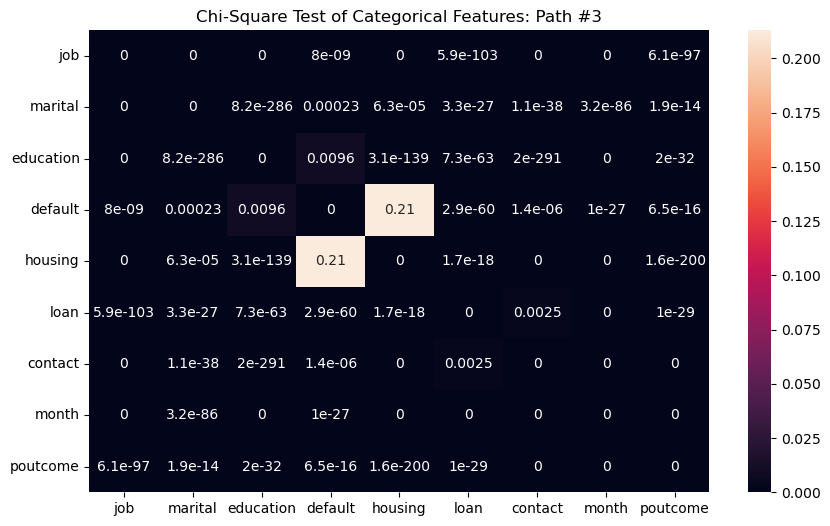

In [80]:
fig = plt.figure(figsize=(10, 6))
sns.heatmap(res, annot=True)
plt.title("Chi-Square Test of Categorical Features: Path #3")
plt.show()

Further inspection of the code above for calculating the Chi-Square p-value for each combination of categorical features (this time without a rounded p-value) shows that the results are valid. This was done by printing the pandas cross-tables for each combination to verify that they appear correct prior to calculating the p-value.

Due to the fact that there are very few combinations where the null hypothesis of independence is supported, all of the categorical values will be included in principal component analysis.

### Final Data Preparation

Now, final data preparation can begin. This will be carried out as follows. First, each of the sampled dictionaries will undergo the following process:

  1. Remove any outliers from the numerical columns
  2. Encode the categorical columns
  3. Scale all columns
  4. Apply principal component analysis
  5. Use recursive feature elimination, using a logistic regression estimator, to determine the optimal number of PCA features to include in the final modeling phase.

Once all of these steps have been completed, the finalized datasets will all be exported to .csv files so that the modeling can begin in a separate notebook. It is important to note that these steps will be taken on each of the sampled datasets, since these already contain a balanced target column.

#### Step 1: Remove any outliers (values with a z-score greater than 3) from the numerical columns of each dataset.

In [81]:
from scipy.stats import zscore

Undersampled datasets:

In [82]:
# Undersampled

# Loop through each dataset
for path in undersampled:
    # Look at only the numerical columns in each dataset
    for col in num_columns[path]:
        # Filter columns based on values with a standard deviation less than 3
        undersampled[path]= undersampled[path][(np.abs(zscore(undersampled[path][col])) < 3)]

In [83]:
for path in undersampled:
    print(undersampled[path].shape)

(8625, 20)
(829, 20)
(9728, 16)
(960, 16)


Oversampled datasets:

In [84]:
# Oversampled

# Loop through each dataset
for path in oversampled:
    # Look at only the numerical columns in each dataset
    for col in num_columns[path]:
        # Filter columns based on values with a standard deviation less than 3
        oversampled[path] = oversampled[path][(np.abs(zscore(oversampled[path][col])) < 3)]

In [85]:
for path in oversampled:
    print(oversampled[path].shape)

(67807, 20)
(6725, 20)
(74044, 16)
(7372, 16)


SMOTE sampled datasets:

In [86]:
# SMOTE-sampled

# Loop through each dataset
for path in smotesampled:
    # Look at only the numerical columns in each dataset
    for col in num_columns[path]:
        # Filter columns based on values with a standard deviation less than 3
        smotesampled[path] = smotesampled[path][(np.abs(zscore(smotesampled[path][col])) < 3)]

In [87]:
for path in smotesampled:
    print(smotesampled[path].shape)

(66517, 20)
(6675, 20)
(74302, 16)
(7296, 16)


Inspection of the shape of each dataframe before and after removing outliers shows that the rows that meet the criteria of having a z-score greater than 3 have successfully been filtered out.

#### Step 2: Encode the categorical columns of each dataset.

In [88]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

The sklearn documentation recommends using the OrdinalEncoder class for categorical features, and the LabelEncoder class for the target variable.

Undersampled datasets:

In [89]:
# Undersampled

for path in cat_columns:
    # [:-1] slicing excludes target variable
    cols = cat_columns[path][:-1]
    ord_enc = OrdinalEncoder()
    undersampled[path][cols] = ord_enc.fit_transform(undersampled[path][cols])
    
    # [-1] slicing selects only the target variable
    targ = cat_columns[path][-1]
    lab_enc = LabelEncoder()
    undersampled[path][targ] = lab_enc.fit_transform(undersampled[path][targ])

In [90]:
for path in undersampled:
    print(path)
    print(undersampled[path].head())

/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 1/bank+marketing/bank-additional/bank-additional-full.csv
   age  job  marital  education  default  housing  loan  contact  month  \
0   31  7.0      1.0        7.0      0.0      2.0   0.0      0.0    4.0   
2   42  4.0      1.0        6.0      0.0      2.0   0.0      0.0    1.0   
3   44  9.0      1.0        7.0      0.0      2.0   0.0      0.0    0.0   
4   58  3.0      1.0        0.0      0.0      2.0   0.0      1.0    4.0   
5   28  1.0      1.0        2.0      1.0      0.0   2.0      0.0    3.0   

   day_of_week  campaign  pdays  previous  poutcome  emp.var.rate  \
0          3.0         3     -1         0       1.0          -2.9   
2          2.0         2     -1         0       1.0           1.4   
3          1.0         1     -1         1       0.0          -1.8   
4          2.0         1     -1         0       1.0           1.4   
5          1.0         3     -1         0       1.0           1.

Oversampled datasets:

In [91]:
# Oversampled

for path in cat_columns:
    # [:-1] slicing excludes target variable
    cols = cat_columns[path][:-1]
    ord_enc = OrdinalEncoder()
    oversampled[path][cols] = ord_enc.fit_transform(oversampled[path][cols])
    
    # [-1] slicing selects only the target variable
    targ = cat_columns[path][-1]
    lab_enc = LabelEncoder()
    oversampled[path][targ] = lab_enc.fit_transform(oversampled[path][targ])

In [92]:
for path in oversampled:
    print(path)
    print(oversampled[path].head())

/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 1/bank+marketing/bank-additional/bank-additional-full.csv
   age  job  marital  education  default  housing  loan  contact  month  \
0   56  3.0      1.0        0.0      0.0      0.0   0.0      1.0    6.0   
1   57  7.0      1.0        3.0      1.0      0.0   0.0      1.0    6.0   
2   37  7.0      1.0        3.0      0.0      2.0   0.0      1.0    6.0   
3   40  0.0      1.0        1.0      0.0      0.0   0.0      1.0    6.0   
4   56  7.0      1.0        3.0      0.0      0.0   2.0      1.0    6.0   

   day_of_week  campaign  pdays  previous  poutcome  emp.var.rate  \
0          1.0         1     -1         0       1.0           1.1   
1          1.0         1     -1         0       1.0           1.1   
2          1.0         1     -1         0       1.0           1.1   
3          1.0         1     -1         0       1.0           1.1   
4          1.0         1     -1         0       1.0           1.

SMOTE sampled datasets:

In [93]:
# SMOTE sampled

for path in cat_columns:
    # [:-1] slicing excludes target variable
    cols = cat_columns[path][:-1]
    ord_enc = OrdinalEncoder()
    smotesampled[path][cols] = ord_enc.fit_transform(smotesampled[path][cols])
    
    # [-1] slicing selects only the target variable
    targ = cat_columns[path][-1]
    lab_enc = LabelEncoder()
    smotesampled[path][targ] = lab_enc.fit_transform(smotesampled[path][targ])

In [94]:
for path in smotesampled:
    print(path)
    print(smotesampled[path].head())

/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 1/bank+marketing/bank-additional/bank-additional-full.csv
   age  job  marital  education  default  housing  loan  contact  month  \
0   56  3.0      1.0        0.0      0.0      0.0   0.0      1.0    6.0   
1   57  7.0      1.0        3.0      1.0      0.0   0.0      1.0    6.0   
2   37  7.0      1.0        3.0      0.0      2.0   0.0      1.0    6.0   
3   40  0.0      1.0        1.0      0.0      0.0   0.0      1.0    6.0   
4   56  7.0      1.0        3.0      0.0      0.0   2.0      1.0    6.0   

   day_of_week  campaign  pdays  previous  poutcome  emp.var.rate  \
0          1.0         1     -1         0       1.0           1.1   
1          1.0         1     -1         0       1.0           1.1   
2          1.0         1     -1         0       1.0           1.1   
3          1.0         1     -1         0       1.0           1.1   
4          1.0         1     -1         0       1.0           1.

#### Step 3: Scale all datasets to have 0 mean, standard deviation of 1.

In [95]:
from sklearn.preprocessing import StandardScaler

Undersampled datasets:

In [96]:
# Undersampled

under_scaled = {}

for path in undersampled:
    scaler = StandardScaler()
    under_scaled[path] = pd.DataFrame(scaler.fit_transform(undersampled[path]),
                                     columns = undersampled[path].columns)

In [97]:
for path in under_scaled:
    print(path)
    print(under_scaled[path].head())

/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 1/bank+marketing/bank-additional/bank-additional-full.csv
        age       job   marital  education   default   housing      loan  \
0 -0.809556  0.894217 -0.327343   1.459790 -0.442070  0.937026 -0.444067   
1  0.190882  0.064397 -0.327343   0.988123 -0.442070  0.937026 -0.444067   
2  0.372780  1.447431 -0.327343   1.459790 -0.442070  0.937026 -0.444067   
3  1.646064 -0.212209 -0.327343  -1.841882 -0.442070  0.937026 -0.444067   
4 -1.082403 -0.765423 -0.327343  -0.898547  2.262083 -1.092825  2.354677   

    contact     month  day_of_week  campaign     pdays  previous  poutcome  \
0 -0.637437 -0.089533     0.702883  0.545649 -0.269457 -0.437224  0.078717   
1 -0.637437 -1.301814    -0.017284 -0.101610 -0.269457 -0.437224  0.078717   
2 -0.637437 -1.705908    -0.737451 -0.748870 -0.269457  1.592408 -2.295173   
3  1.568782 -0.089533    -0.017284 -0.748870 -0.269457 -0.437224  0.078717   
4 -0.637437 -

Oversampled datasets:

In [98]:
# Oversampled

over_scaled = {}

for path in oversampled:
    scaler = StandardScaler()
    over_scaled[path] = pd.DataFrame(scaler.fit_transform(oversampled[path]),
                                     columns = oversampled[path].columns)

In [99]:
for path in over_scaled:
    print(path)
    print(over_scaled[path].head())

/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 1/bank+marketing/bank-additional/bank-additional-full.csv
        age       job   marital  education   default   housing      loan  \
0  1.460849 -0.223637 -0.338825  -1.834320 -0.441332 -1.098395 -0.447389   
1  1.551700  0.878451 -0.338825  -0.419059  2.264400 -1.098395 -0.447389   
2 -0.265317  0.878451 -0.338825  -0.419059 -0.441332  0.932247 -0.447389   
3  0.007235 -1.050204 -0.338825  -1.362566 -0.441332 -1.098395 -0.447389   
4  1.460849  0.878451 -0.338825  -0.419059 -0.441332 -1.098395  2.335867   

    contact     month  day_of_week  campaign     pdays  previous  poutcome  \
0  1.574902  0.730609    -0.732932 -0.738388 -0.269769 -0.445857  0.090029   
1  1.574902  0.730609    -0.732932 -0.738388 -0.269769 -0.445857  0.090029   
2  1.574902  0.730609    -0.732932 -0.738388 -0.269769 -0.445857  0.090029   
3  1.574902  0.730609    -0.732932 -0.738388 -0.269769 -0.445857  0.090029   
4  1.574902  

SMOTE sampled datasets:

In [100]:
# SMOTE sampled

smote_scaled = {}

for path in smotesampled:
    scaler = StandardScaler()
    smote_scaled[path] = pd.DataFrame(scaler.fit_transform(smotesampled[path]),
                                     columns = smotesampled[path].columns)

In [101]:
for path in smote_scaled:
    print(path)
    print(smote_scaled[path].head())

/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 1/bank+marketing/bank-additional/bank-additional-full.csv
        age       job   marital  education   default   housing      loan  \
0  1.495850 -0.129558 -0.407166  -1.889597 -0.408062 -1.146360 -0.351117   
1  1.587514  0.980844 -0.407166  -0.464984  2.448803 -1.146360 -0.351117   
2 -0.245763  0.980844 -0.407166  -0.464984 -0.408062  0.885277 -0.351117   
3  0.029228 -0.962360 -0.407166  -1.414726 -0.408062 -1.146360 -0.351117   
4  1.495850  0.980844 -0.407166  -0.464984 -0.408062 -1.146360  2.958631   

    contact     month  day_of_week  campaign     pdays  previous  poutcome  \
0  1.662649  0.734731    -0.758034 -0.682247 -0.239533 -0.400865  0.060026   
1  1.662649  0.734731    -0.758034 -0.682247 -0.239533 -0.400865  0.060026   
2  1.662649  0.734731    -0.758034 -0.682247 -0.239533 -0.400865  0.060026   
3  1.662649  0.734731    -0.758034 -0.682247 -0.239533 -0.400865  0.060026   
4  1.662649  

#### Step 4: Apply PCA

In [102]:
from sklearn.decomposition import PCA

Undersampled datasets:

In [103]:
# Undersampled

under_pca = {}

for path in under_scaled:
    pca = PCA()
    under_pca[path] = pd.DataFrame(pca.fit_transform(under_scaled[path].drop("y", axis=1, inplace=False)))
    under_pca[path]["Target"] = under_scaled[path]["y"]

In [104]:
for path in under_pca:
    print(path)
    print(under_pca[path])

/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 1/bank+marketing/bank-additional/bank-additional-full.csv
             0         1         2         3         4         5         6  \
0     1.890890 -0.993852 -0.821937 -0.480860 -0.989377 -0.214769  0.317637   
1    -1.281815 -0.243730 -0.484835 -1.798732 -1.132807 -0.559974  0.259653   
2     1.908959 -2.104626  0.149555 -1.280153 -0.905300  0.843720  0.265915   
3    -2.537322  0.874603  1.394061  0.374347  0.539522 -0.394716  0.452726   
4    -2.334056 -0.256307  0.190600 -0.590295  1.883812  0.867915  0.462692   
...        ...       ...       ...       ...       ...       ...       ...   
8620  1.245735 -0.746306 -1.469518  1.296514  2.026359  0.129670  0.144555   
8621  2.245025 -0.359051  1.580068  1.041981  0.653934  1.280152  0.725936   
8622  1.113611 -0.564638 -0.202720  0.822075  1.682336  1.245900  0.000622   
8623  1.085245  0.003782  1.710008  0.089882  0.519393  1.467772  0.223837   
86

Oversampled datasets:

In [105]:
# Oversampled

over_pca = {}

for path in over_scaled:
    pca = PCA()
    over_pca[path] = pd.DataFrame(pca.fit_transform(over_scaled[path].drop("y", axis=1, inplace=False)))
    over_pca[path]["Target"] = over_scaled[path]["y"]

In [106]:
for path in over_pca:
    print(path)
    print(over_pca[path])

/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 1/bank+marketing/bank-additional/bank-additional-full.csv
              0         1         2         3         4         5         6  \
0     -2.016133  1.243769  1.488616  1.433435 -0.235207 -0.061623 -0.634287   
1     -2.338276  1.425098  1.555694  1.159433 -0.882166  0.402010 -0.702968   
2     -1.782064  0.733474 -0.199046  1.035445 -1.000663  0.284939  0.585974   
3     -1.994604  0.960664  0.564973  1.723834  0.200678 -0.248304 -0.618431   
4     -1.867841  1.193528  0.759087  0.893656 -1.038877  0.882522  1.374926   
...         ...       ...       ...       ...       ...       ...       ...   
67802  3.817619  3.762490 -2.319359 -1.106121  2.120525 -0.225578  0.323473   
67803  1.665336 -1.425994 -1.560239  0.587320  0.864486 -1.193571  0.475746   
67804  1.589452 -1.574233 -1.482741  0.841760  0.798751  0.690754  0.069735   
67805  3.048745 -2.104245 -0.999882  0.074308 -1.701460  0.627128  0.0

SMOTE sampled datasets:

In [107]:
# SMOTE sampled

smote_pca = {}

for path in smote_scaled:
    pca = PCA()
    smote_pca[path] = pd.DataFrame(pca.fit_transform(smote_scaled[path].drop("y", axis=1, inplace=False)))
    smote_pca[path]["Target"] = smote_scaled[path]["y"]

In [108]:
for path in smote_pca:
    print(path)
    print(smote_pca[path])

/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 1/bank+marketing/bank-additional/bank-additional-full.csv
              0         1         2         3         4         5         6  \
0     -2.118771  1.304965  1.330691  1.352347 -0.529285 -0.628563 -1.003252   
1     -2.493598  1.514325  1.554580  1.145512 -0.837064  0.255945 -1.023098   
2     -1.808537  0.747625 -0.128869  1.054107 -1.034775  0.563089  0.335223   
3     -2.038995  0.930825  0.305054  1.587456 -0.212871 -0.991357 -0.906165   
4     -2.159633  1.043371  0.942414  1.270198 -0.881756  1.807637  0.565400   
...         ...       ...       ...       ...       ...       ...       ...   
66512  1.576886 -0.567768  1.240525 -0.421726  0.151235 -0.094407  0.116251   
66513  4.247641  4.638821  0.566244 -0.298874 -1.138066  0.086304 -0.660219   
66514  1.716583 -0.903101  0.038551 -0.042511  0.073835 -1.078044  0.930603   
66515 -0.063084 -0.947621 -1.359799  0.484974 -0.491328  2.218526  2.2

#### Step 5: Determine the optimal number of features to include 

Now the the encoding, scaling, and principal component analysis of the datasets are completed, the optimal number of features to include in the datasets that are fed into the machine learning algorithms will be determinded by recursive feature elimination. This will be done on each dataset, using a logistic regrssion estimator to determine how many, and which features provide the lowest error. Once this is determined for each dataset, these transformed features will be exported to .csv files for use in the machine learning portion of this project. 



In [109]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

dict_values([8, 11, 13, 11])


Text(0.5, 1.0, 'Blue: Path 1, Green: Path 2, Red: Path 3, Cyan: Path 4')

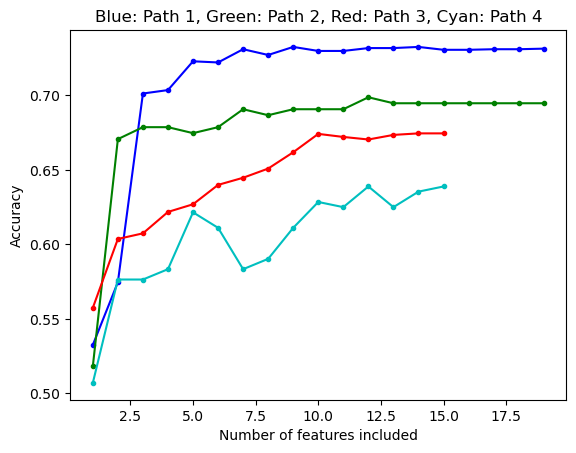

In [110]:
# Undersampled

n_features = {}

for path in under_pca:

    # Initialize an empty list to store each accuracy
    acc = []

    # Loop through a range of possible number of columns to include
    for i in range(under_pca[path].shape[1] - 1):
        # Instantiate regressor
        regr = LogisticRegression()
        # Instantiate RFE object
        rfe = RFE(estimator=regr, n_features_to_select=i+1, step=1)
    
        # Split data into training and testing sets. For logistic regression, the target
        # column should be kept in it's original labeled form, so the target array entered
        # into train_test_split will be from the original sampled dataset.
        X_train, X_test, y_train, y_test = train_test_split(
            under_pca[path].drop("Target", axis=1, inplace=False),
            undersampled[path]["y"],
            test_size=0.3,
            random_state=100
        )
    
        # Fit to data
        rfe.fit(X_train, y_train)
    
        # Identify the features with a rank of 1
        keep_cols = [i for i, x in enumerate(rfe.ranking_) if x == 1]
    
        # Select only the columns present in keep_cols
        X_train = X_train[keep_cols]
        X_test = X_test[keep_cols]
    
        # Fit model on the training data
        regr.fit(X_train, y_train)
    
        # Get the score attribute (accuracy) from regr and append to the list acc
        acc.append(regr.score(X_test, y_test))
        
    # Identify the maximum accuracy, and the index within err where it occurs
    max_acc = max(acc)
    max_idx = acc.index(max_acc)
    
    # Append the number of features corresponding to each path in n_features
    n_features[path] = max_idx
    
    colors = ["b", "g", "r", "c"]
    color = colors[list(under_pca.keys()).index(path)]
    plt.plot(list(range(under_pca[path].shape[1]))[1:], acc, "."+color+"-")

print(n_features.values())
plt.xlabel("Number of features included")
plt.ylabel("Accuracy")
plt.title("Blue: Path 1, Green: Path 2, Red: Path 3, Cyan: Path 4")

Now that the optimal number of features to include for each data path has been determined, the actual features of highest importance will be determined next for each data path.

In [111]:
# Undersampled continued

features = {}

for path in under_pca:
    # Instantiate regressor
    regr = LogisticRegression()
    # Instantiate RFE object
    rfe = RFE(estimator=regr, n_features_to_select = n_features[path], step=1)
    
    # Split data into training and testing sets. For logistic regression, the target
    # column should be kept in it's original labeled form, so the target array entered
    # into train_test_split will be from the original sampled dataset.
    X_train, X_test, y_train, y_test = train_test_split(
        under_pca[path].drop("Target", axis=1, inplace=False),
        undersampled[path]["y"],
        test_size=0.3,
        random_state=100
    )
    
    # Fit to data
    rfe.fit(X_train, y_train)
    
    # Identify the features with a rank of 1
    keep_cols = [i for i, x in enumerate(rfe.ranking_) if x == 1]
    keep_cols.append("Target")
    print("Columns to keep:")
    print(keep_cols)
    
    under_pca[path] = under_pca[path][keep_cols]

Columns to keep:
[0, 1, 3, 13, 15, 16, 17, 18, 'Target']
Columns to keep:
[0, 1, 3, 4, 7, 8, 13, 15, 16, 17, 18, 'Target']
Columns to keep:
[0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 13, 14, 'Target']
Columns to keep:
[0, 1, 2, 3, 6, 7, 10, 11, 12, 13, 14, 'Target']


In [112]:
for path in under_pca:
    print(path)
    print(under_pca[path])

/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 1/bank+marketing/bank-additional/bank-additional-full.csv
             0         1         3        13        15        16        17  \
0     1.890890 -0.993852 -0.480860 -0.040170 -0.105394 -0.014757 -0.414376   
1    -1.281815 -0.243730 -1.798732 -0.387042 -0.180273 -0.005070  0.157100   
2     1.908959 -2.104626 -1.280153  0.627928  0.645701  0.206452 -0.026633   
3    -2.537322  0.874603  0.374347  1.201402  0.264371  0.010575 -0.188813   
4    -2.334056 -0.256307 -0.590295 -1.006796 -0.656493 -0.000695 -0.063172   
...        ...       ...       ...       ...       ...       ...       ...   
8620  1.245735 -0.746306  1.296514  1.317126 -1.977418  0.045353  0.084751   
8621  2.245025 -0.359051  1.041981  1.127101 -1.228757 -0.788255  0.081756   
8622  1.113611 -0.564638  0.822075  0.891234 -2.078036  0.041015  0.086288   
8623  1.085245  0.003782  0.089882  1.976387 -1.721871  0.061915  0.091071   
86

The above process will be repeated for the oversampled and SMOTE sampled groups.

Oversampled datasets:

dict_values([15, 5, 12, 7])


Text(0.5, 1.0, 'Blue: Path 1, Green: Path 2, Red: Path 3, Cyan: Path 4')

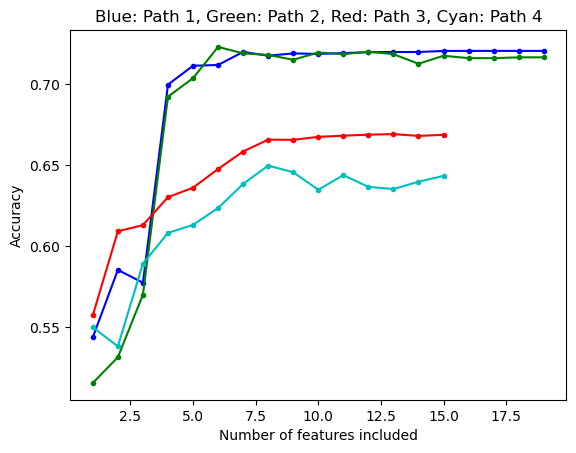

In [113]:
# Oversampled

n_features = {}

for path in over_pca:

    # Initialize an empty list to store each accuracy
    acc = []

    # Loop through a range of possible number of columns to include
    for i in range(over_pca[path].shape[1] - 1):
        # Instantiate regressor
        regr = LogisticRegression()
        # Instantiate RFE object
        rfe = RFE(estimator=regr, n_features_to_select=i+1, step=1)
    
        # Split data into training and testing sets. For logistic regression, the target
        # column should be kept in it's original labeled form, so the target array entered
        # into train_test_split will be from the original sampled dataset.
        X_train, X_test, y_train, y_test = train_test_split(
            over_pca[path].drop("Target", axis=1, inplace=False),
            oversampled[path]["y"],
            test_size=0.3,
            random_state=100
        )
    
        # Fit to data
        rfe.fit(X_train, y_train)
    
        # Identify the features with a rank of 1
        keep_cols = [i for i, x in enumerate(rfe.ranking_) if x == 1]
    
        # Select only the columns present in keep_cols
        X_train = X_train[keep_cols]
        X_test = X_test[keep_cols]
    
        # Fit model on the training data
        regr.fit(X_train, y_train)
    
        # Get the score attribute (accuracy) from regr and append to the list acc
        acc.append(regr.score(X_test, y_test))
        
    # Identify the maximum accuracy, and the index within err where it occurs
    max_acc = max(acc)
    max_idx = acc.index(max_acc)
    
    # Append the number of features corresponding to each path in n_features
    n_features[path] = max_idx
    
    colors = ["b", "g", "r", "c"]
    color = colors[list(over_pca.keys()).index(path)]
    plt.plot(list(range(over_pca[path].shape[1]))[1:], acc, "."+color+"-")

print(n_features.values())
plt.xlabel("Number of features included")
plt.ylabel("Accuracy")
plt.title("Blue: Path 1, Green: Path 2, Red: Path 3, Cyan: Path 4")

In [114]:
# Oversampled continued

features = {}

for path in over_pca:
    # Instantiate regressor
    regr = LogisticRegression()
    # Instantiate RFE object
    rfe = RFE(estimator=regr, n_features_to_select = n_features[path], step=1)
    
    # Split data into training and testing sets. For logistic regression, the target
    # column should be kept in it's original labeled form, so the target array entered
    # into train_test_split will be from the original sampled dataset.
    X_train, X_test, y_train, y_test = train_test_split(
        over_pca[path].drop("Target", axis=1, inplace=False),
        oversampled[path]["y"],
        test_size=0.3,
        random_state=100
    )
    
    # Fit to data
    rfe.fit(X_train, y_train)
    
    # Identify the features with a rank of 1
    keep_cols = [i for i, x in enumerate(rfe.ranking_) if x == 1]
    keep_cols.append("Target")
    print("Columns to keep:")
    print(keep_cols)
    
    over_pca[path] = over_pca[path][keep_cols]

Columns to keep:
[0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 13, 15, 16, 17, 18, 'Target']
Columns to keep:
[0, 13, 15, 17, 18, 'Target']
Columns to keep:
[0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 13, 14, 'Target']
Columns to keep:
[0, 1, 2, 7, 11, 13, 14, 'Target']


In [115]:
for path in over_pca:
    print(path)
    print(over_pca[path])

/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 1/bank+marketing/bank-additional/bank-additional-full.csv
              0         1         2         3         4         5         6  \
0     -2.016133  1.243769  1.488616  1.433435 -0.235207 -0.061623 -0.634287   
1     -2.338276  1.425098  1.555694  1.159433 -0.882166  0.402010 -0.702968   
2     -1.782064  0.733474 -0.199046  1.035445 -1.000663  0.284939  0.585974   
3     -1.994604  0.960664  0.564973  1.723834  0.200678 -0.248304 -0.618431   
4     -1.867841  1.193528  0.759087  0.893656 -1.038877  0.882522  1.374926   
...         ...       ...       ...       ...       ...       ...       ...   
67802  3.817619  3.762490 -2.319359 -1.106121  2.120525 -0.225578  0.323473   
67803  1.665336 -1.425994 -1.560239  0.587320  0.864486 -1.193571  0.475746   
67804  1.589452 -1.574233 -1.482741  0.841760  0.798751  0.690754  0.069735   
67805  3.048745 -2.104245 -0.999882  0.074308 -1.701460  0.627128  0.0

SMOTE sampled datasets:

dict_values([15, 11, 14, 13])


Text(0.5, 1.0, 'Blue: Path 1, Green: Path 2, Red: Path 3, Cyan: Path 4')

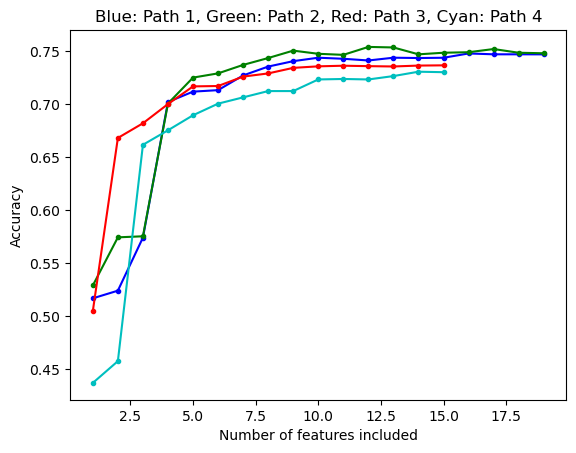

In [116]:
# SMOTE sampled

n_features = {}

for path in smote_pca:

    # Initialize an empty list to store each accuracy
    acc = []

    # Loop through a range of possible number of columns to include
    for i in range(smote_pca[path].shape[1] - 1):
        # Instantiate regressor
        regr = LogisticRegression()
        # Instantiate RFE object
        rfe = RFE(estimator=regr, n_features_to_select=i+1, step=1)
    
        # Split data into training and testing sets. For logistic regression, the target
        # column should be kept in it's original labeled form, so the target array entered
        # into train_test_split will be from the original sampled dataset.
        X_train, X_test, y_train, y_test = train_test_split(
            smote_pca[path].drop("Target", axis=1, inplace=False),
            smotesampled[path]["y"],
            test_size=0.3,
            random_state=100
        )
    
        # Fit to data
        rfe.fit(X_train, y_train)
    
        # Identify the features with a rank of 1
        keep_cols = [i for i, x in enumerate(rfe.ranking_) if x == 1]
    
        # Select only the columns present in keep_cols
        X_train = X_train[keep_cols]
        X_test = X_test[keep_cols]
    
        # Fit model on the training data
        regr.fit(X_train, y_train)
    
        # Get the score attribute (accuracy) from regr and append to the list acc
        acc.append(regr.score(X_test, y_test))
        
    # Identify the maximum accuracy, and the index within err where it occurs
    max_acc = max(acc)
    max_idx = acc.index(max_acc)
    
    # Append the number of features corresponding to each path in n_features
    n_features[path] = max_idx
    
    colors = ["b", "g", "r", "c"]
    color = colors[list(smote_pca.keys()).index(path)]
    plt.plot(list(range(smote_pca[path].shape[1]))[1:], acc, "."+color+"-")

print(n_features.values())
plt.xlabel("Number of features included")
plt.ylabel("Accuracy")
plt.title("Blue: Path 1, Green: Path 2, Red: Path 3, Cyan: Path 4")

In [117]:
# SMOTE sampled continued

features = {}

for path in smote_pca:
    # Instantiate regressor
    regr = LogisticRegression()
    # Instantiate RFE object
    rfe = RFE(estimator=regr, n_features_to_select = n_features[path], step=1)
    
    # Split data into training and testing sets. For logistic regression, the target
    # column should be kept in it's original labeled form, so the target array entered
    # into train_test_split will be from the original sampled dataset.
    X_train, X_test, y_train, y_test = train_test_split(
        smote_pca[path].drop("Target", axis=1, inplace=False),
        smotesampled[path]["y"],
        test_size=0.3,
        random_state=100
    )
    
    # Fit to data
    rfe.fit(X_train, y_train)
    
    # Identify the features with a rank of 1
    keep_cols = [i for i, x in enumerate(rfe.ranking_) if x == 1]
    keep_cols.append("Target")
    print("Columns to keep:")
    print(keep_cols)
    
    smote_pca[path] = smote_pca[path][keep_cols]

Columns to keep:
[0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 13, 14, 15, 17, 18, 'Target']
Columns to keep:
[0, 1, 4, 5, 6, 7, 10, 13, 15, 17, 18, 'Target']
Columns to keep:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 'Target']
Columns to keep:
[0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 'Target']


In [118]:
for path in smote_pca:
    print(path)
    print(smote_pca[path])

/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 1/bank+marketing/bank-additional/bank-additional-full.csv
              0         1         2         3         4         5         7  \
0     -2.118771  1.304965  1.330691  1.352347 -0.529285 -0.628563 -0.363929   
1     -2.493598  1.514325  1.554580  1.145512 -0.837064  0.255945  0.262053   
2     -1.808537  0.747625 -0.128869  1.054107 -1.034775  0.563089 -0.565547   
3     -2.038995  0.930825  0.305054  1.587456 -0.212871 -0.991357 -0.780834   
4     -2.159633  1.043371  0.942414  1.270198 -0.881756  1.807637  0.453810   
...         ...       ...       ...       ...       ...       ...       ...   
66512  1.576886 -0.567768  1.240525 -0.421726  0.151235 -0.094407 -1.576163   
66513  4.247641  4.638821  0.566244 -0.298874 -1.138066  0.086304  0.923972   
66514  1.716583 -0.903101  0.038551 -0.042511  0.073835 -1.078044 -0.653699   
66515 -0.063084 -0.947621 -1.359799  0.484974 -0.491328  2.218526  0.5

#### Final Data Preparation Summary

The datasets in each path, among each of the three sampling techniques have now all undergone outlier removal, encoding of categorical values, scaling/normalization, application of principal component analysis, and feature selection.

With these transformations complete, the data is now in a form that is ready to be fed into the various machine learning models.

Through the process of this final data preparation, two important insights have been found:

- Among all of the four data paths, the SMOTE sampling technique yielded the highest accuracy when determining the feature selection.
- Data paths 1 and 2 consistently had higher accuracies than data paths 3 and 4. 
    
For these two reasons, the data that will be exported to .csv files will be data paths 1 and 2, from the SMOTE sampling technique dictionary. The analysis to come will follow the UCI instructions that the larger dataset be the one that is primarily used, and the smaller dataset (path 2) will be reserved in case it is needed for more computationally demanding algorithms.

In [119]:
smote_pca[path1].head()

0         1         2         3         4         5         7  \
0 -2.118771  1.304965  1.330691  1.352347 -0.529285 -0.628563 -0.363929   
1 -2.493598  1.514325  1.554580  1.145512 -0.837064  0.255945  0.262053   
2 -1.808537  0.747625 -0.128869  1.054107 -1.034775  0.563089 -0.565547   
3 -2.038995  0.930825  0.305054  1.587456 -0.212871 -0.991357 -0.780834   
4 -2.159633  1.043371  0.942414  1.270198 -0.881756  1.807637  0.453810   

          8        10        11        13        14        15        17  \
0 -0.066614 -0.504306 -0.293212  0.587732 -0.606365  0.321401  0.102415   
1 -1.040343  0.416795  0.630495  0.296662 -0.428810  0.331101  0.086099   
2 -1.299004 -0.911811 -0.106594  0.100612  0.506685  0.123326  0.084256   
3  0.370859 -0.555647  0.144565  0.175159  0.244077  0.102859  0.103241   
4  1.471005 -0.909631 -0.421000  0.755563 -0.678241  0.334243  0.080691   

         18    Target  
0  0.047827 -0.955109  
1  0.046565 -0.955109  
2  0.036861 -0.955109  
3  0.052968 -0.955109  
4  0.035079 -0.955109

In [120]:
smote_pca[path1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66517 entries, 0 to 66516
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       66517 non-null  float64
 1   1       66517 non-null  float64
 2   2       66517 non-null  float64
 3   3       66517 non-null  float64
 4   4       66517 non-null  float64
 5   5       66517 non-null  float64
 6   7       66517 non-null  float64
 7   8       66517 non-null  float64
 8   10      66517 non-null  float64
 9   11      66517 non-null  float64
 10  13      66517 non-null  float64
 11  14      66517 non-null  float64
 12  15      66517 non-null  float64
 13  17      66517 non-null  float64
 14  18      66517 non-null  float64
 15  Target  66517 non-null  float64
dtypes: float64(16)
memory usage: 8.1 MB


In [121]:
out_path1 = "final_data_full.csv"

In [122]:
#smote_pca[path1].to_csv(out_path1)

In [123]:
smote_pca[path2].head()

0         1         4         5         6         7        10  \
0  1.477958 -1.068107  0.937256 -0.438715 -1.173880  1.085664  0.275819   
1 -2.012051  0.865153  0.006452 -1.678747  1.508089 -0.032238  0.268537   
2 -2.417276  0.339880 -1.384326  1.508860 -0.681225 -0.490072  0.396606   
3 -2.793285  0.364409  0.595485 -0.207877  1.103605  0.666017 -0.746758   
4  0.039820 -0.216657 -0.242265 -0.632910 -1.260518  1.000754  0.338403   

         13        15        17        18    Target  
0 -0.847660 -0.036771  0.113715 -0.075080 -0.965392  
1  0.277096  0.517721  0.081932  0.037870 -0.965392  
2  0.375944 -0.029665 -0.234922 -0.124102 -0.965392  
3  0.369294  0.163139 -0.210129 -0.121943 -0.965392  
4 -0.745986  0.120175 -0.083600  0.096719 -0.965392

In [124]:
smote_pca[path2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6675 entries, 0 to 6674
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6675 non-null   float64
 1   1       6675 non-null   float64
 2   4       6675 non-null   float64
 3   5       6675 non-null   float64
 4   6       6675 non-null   float64
 5   7       6675 non-null   float64
 6   10      6675 non-null   float64
 7   13      6675 non-null   float64
 8   15      6675 non-null   float64
 9   17      6675 non-null   float64
 10  18      6675 non-null   float64
 11  Target  6675 non-null   float64
dtypes: float64(12)
memory usage: 625.9 KB


In [125]:
out_path2 = "final_data_partial.csv"

In [126]:
#smote_pca[path2].to_csv(out_path2)

## Implementation of Machine Learning - Part 1

The previous work for this project was dedicated to data cleaning, exploration, and preparation for the machine learning portion of this project. With these steps now completed, the finalized data will be loaded into this notebook, and the implementation of machine learning can begin.

In [1]:
import pandas as pd

In [2]:
path1 = "/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 2/final_data_full.csv"

In [3]:
path2 = "/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 2/final_data_partial.csv"

In [4]:
df1 = pd.read_csv(path1)

In [5]:
df2 = pd.read_csv(path2)

In [6]:
df1.head()

Unnamed: 0         0         1         2         3         4         5  \
0           0 -2.118771  1.304965  1.330691  1.352347 -0.529285 -0.628563   
1           1 -2.493598  1.514325  1.554580  1.145512 -0.837064  0.255945   
2           2 -1.808537  0.747625 -0.128869  1.054107 -1.034775  0.563089   
3           3 -2.038995  0.930825  0.305054  1.587456 -0.212871 -0.991357   
4           4 -2.159633  1.043371  0.942414  1.270198 -0.881756  1.807637   

          7         8        10        11        13        14        15  \
0 -0.363929 -0.066614 -0.504306 -0.293212  0.587732 -0.606365  0.321401   
1  0.262053 -1.040343  0.416795  0.630495  0.296662 -0.428810  0.331101   
2 -0.565547 -1.299004 -0.911811 -0.106594  0.100612  0.506685  0.123326   
3 -0.780834  0.370859 -0.555647  0.144565  0.175159  0.244077  0.102859   
4  0.453810  1.471005 -0.909631 -0.421000  0.755563 -0.678241  0.334243   

         17        18    Target  
0  0.102415  0.047827 -0.955109  
1  0.086099  0.046565 -0.955109  
2  0.084256  0.036861 -0.955109  
3  0.103241  0.052968 -0.955109  
4  0.080691  0.035079 -0.955109

In [7]:
df2.head()

Unnamed: 0         0         1         4         5         6         7  \
0           0  1.477958 -1.068107  0.937256 -0.438715 -1.173880  1.085664   
1           1 -2.012051  0.865153  0.006452 -1.678747  1.508089 -0.032238   
2           2 -2.417276  0.339880 -1.384326  1.508860 -0.681225 -0.490072   
3           3 -2.793285  0.364409  0.595485 -0.207877  1.103605  0.666017   
4           4  0.039820 -0.216657 -0.242265 -0.632910 -1.260518  1.000754   

         10        13        15        17        18    Target  
0  0.275819 -0.847660 -0.036771  0.113715 -0.075080 -0.965392  
1  0.268537  0.277096  0.517721  0.081932  0.037870 -0.965392  
2  0.396606  0.375944 -0.029665 -0.234922 -0.124102 -0.965392  
3 -0.746758  0.369294  0.163139 -0.210129 -0.121943 -0.965392  
4  0.338403 -0.745986  0.120175 -0.083600  0.096719 -0.965392

In [8]:
df1.drop("Unnamed: 0", axis=1, inplace=True)

In [9]:
df2.drop("Unnamed: 0", axis=1, inplace=True)

In [10]:
df1.head()

0         1         2         3         4         5         7  \
0 -2.118771  1.304965  1.330691  1.352347 -0.529285 -0.628563 -0.363929   
1 -2.493598  1.514325  1.554580  1.145512 -0.837064  0.255945  0.262053   
2 -1.808537  0.747625 -0.128869  1.054107 -1.034775  0.563089 -0.565547   
3 -2.038995  0.930825  0.305054  1.587456 -0.212871 -0.991357 -0.780834   
4 -2.159633  1.043371  0.942414  1.270198 -0.881756  1.807637  0.453810   

          8        10        11        13        14        15        17  \
0 -0.066614 -0.504306 -0.293212  0.587732 -0.606365  0.321401  0.102415   
1 -1.040343  0.416795  0.630495  0.296662 -0.428810  0.331101  0.086099   
2 -1.299004 -0.911811 -0.106594  0.100612  0.506685  0.123326  0.084256   
3  0.370859 -0.555647  0.144565  0.175159  0.244077  0.102859  0.103241   
4  1.471005 -0.909631 -0.421000  0.755563 -0.678241  0.334243  0.080691   

         18    Target  
0  0.047827 -0.955109  
1  0.046565 -0.955109  
2  0.036861 -0.955109  
3  0.052968 -0.955109  
4  0.035079 -0.955109

In [11]:
df1.tail()

0         1         2         3         4         5         7  \
66512  1.576886 -0.567768  1.240525 -0.421726  0.151235 -0.094407 -1.576163   
66513  4.247641  4.638821  0.566244 -0.298874 -1.138066  0.086304  0.923972   
66514  1.716583 -0.903101  0.038551 -0.042511  0.073835 -1.078044 -0.653699   
66515 -0.063084 -0.947621 -1.359799  0.484974 -0.491328  2.218526  0.540293   
66516 -3.106079  0.818702  0.833299  0.606342  1.272427  0.098800 -1.479372   

              8        10        11        13        14        15        17  \
66512  0.169185 -0.950589 -0.581720 -0.216571 -1.086081  0.619480  0.112263   
66513  0.916423 -0.060320  0.168913 -0.338436 -1.152454  0.608887 -0.154636   
66514  0.106344 -0.846157 -0.569600 -0.684850  0.088025  0.381983  0.110453   
66515  0.297608 -0.396426 -0.357921 -0.964339 -1.097794  0.201595 -0.099582   
66516 -1.442411  0.297954  0.888206  0.457962  0.503630  0.031685 -0.205905   

             18    Target  
66512 -0.130431  1.047001  
66513  0.000848  1.047001  
66514 -0.129527  1.047001  
66515  0.012301  1.047001  
66516 -0.106500  1.047001

In [12]:
df2.head()

0         1         4         5         6         7        10  \
0  1.477958 -1.068107  0.937256 -0.438715 -1.173880  1.085664  0.275819   
1 -2.012051  0.865153  0.006452 -1.678747  1.508089 -0.032238  0.268537   
2 -2.417276  0.339880 -1.384326  1.508860 -0.681225 -0.490072  0.396606   
3 -2.793285  0.364409  0.595485 -0.207877  1.103605  0.666017 -0.746758   
4  0.039820 -0.216657 -0.242265 -0.632910 -1.260518  1.000754  0.338403   

         13        15        17        18    Target  
0 -0.847660 -0.036771  0.113715 -0.075080 -0.965392  
1  0.277096  0.517721  0.081932  0.037870 -0.965392  
2  0.375944 -0.029665 -0.234922 -0.124102 -0.965392  
3  0.369294  0.163139 -0.210129 -0.121943 -0.965392  
4 -0.745986  0.120175 -0.083600  0.096719 -0.965392

In [13]:
df2.tail()

0         1         4         5         6         7        10  \
6670  3.034036  0.509317 -1.192415 -2.677817  0.401940  1.655934  0.413793   
6671 -1.502512 -0.084553  0.900522 -1.434432 -0.879447 -0.527624 -0.528960   
6672  0.180462 -0.633982 -1.184364  0.452142 -0.013218  0.295210 -0.232246   
6673  2.028557 -1.119338 -0.067162 -0.389914  0.707543  0.736327 -0.430450   
6674  1.656519 -0.902931 -0.031483 -0.068825 -1.699359  0.600205  0.182087   

            13        15        17        18    Target  
6670 -1.108446 -0.734701 -0.060979 -0.018023  1.035848  
6671 -0.450614 -0.211386 -0.033603  0.003816  1.035848  
6672 -0.950198  0.331392 -0.094904  0.051675  1.035848  
6673 -0.147122  0.072137 -0.379104  0.060863  1.035848  
6674 -0.104511  0.181991 -0.006073 -0.083142  1.035848

To restate a point from the previous notebook, df1 is the dataframe that will primarily be used. df2 (which was originally a random subset of 10% of the rows of df1), will be reserved in case it is required for more computationally demanding algorithms, as is recommended by the UCI Machine Learning Repository.

## Machine Learning

The machine learning aspect of this project will be carried out as follows:

1. The following methods - decision tree, random forest, logistic regression, support vector machine, and k-nearest neighbors will be employed to address the binary classification task of predicting a "yes" response. In addition, each model will have its hyperparameters optimized by a dynamic grid search in an attempt to converge on an optimal set of hyperparameters.
2. The performance metrics of each optimized model above will be compared in order to determine which is most effective for this task.
3. Artificial neural networks will be employed in an attempt to assign a probability of responding "yes" to each row. With this information, a secondary goal will be to try and identify any trends among those who are identified as being most likely to respond "yes".

#### Intermediate Step

At least some of the algorithms below will require the target column to be labeled, rather than transformed as a float as it currently stands. For this reason, an additional column will be added to the end of each dataframe that maps the current values to binary labels. Inspection of the current datasets and the original datasets show that the -0.9... values correspond to a "no" response, and the 1.0... values correspond to a "yes" response.

In [14]:
df1["Target"].unique()

array([-0.95510852,  1.04700144])

In [15]:
df2["Target"].unique()

array([-0.96539248,  1.03584814])

In [16]:
target_labels1 = {df1["Target"].unique()[0]: "n", df1["Target"].unique()[1]: "y"}

In [17]:
target_labels2 = {df2["Target"].unique()[0]: "n", df2["Target"].unique()[1]: "y"}

In [18]:
df1["Target Label"] = df1["Target"].map(target_labels1)

In [19]:
df2["Target Label"] = df2["Target"].map(target_labels2)

In [20]:
df1.head()

0         1         2         3         4         5         7  \
0 -2.118771  1.304965  1.330691  1.352347 -0.529285 -0.628563 -0.363929   
1 -2.493598  1.514325  1.554580  1.145512 -0.837064  0.255945  0.262053   
2 -1.808537  0.747625 -0.128869  1.054107 -1.034775  0.563089 -0.565547   
3 -2.038995  0.930825  0.305054  1.587456 -0.212871 -0.991357 -0.780834   
4 -2.159633  1.043371  0.942414  1.270198 -0.881756  1.807637  0.453810   

          8        10        11        13        14        15        17  \
0 -0.066614 -0.504306 -0.293212  0.587732 -0.606365  0.321401  0.102415   
1 -1.040343  0.416795  0.630495  0.296662 -0.428810  0.331101  0.086099   
2 -1.299004 -0.911811 -0.106594  0.100612  0.506685  0.123326  0.084256   
3  0.370859 -0.555647  0.144565  0.175159  0.244077  0.102859  0.103241   
4  1.471005 -0.909631 -0.421000  0.755563 -0.678241  0.334243  0.080691   

         18    Target Target Label  
0  0.047827 -0.955109            n  
1  0.046565 -0.955109            n  
2  0.036861 -0.955109            n  
3  0.052968 -0.955109            n  
4  0.035079 -0.955109            n

In [21]:
df2.head()

0         1         4         5         6         7        10  \
0  1.477958 -1.068107  0.937256 -0.438715 -1.173880  1.085664  0.275819   
1 -2.012051  0.865153  0.006452 -1.678747  1.508089 -0.032238  0.268537   
2 -2.417276  0.339880 -1.384326  1.508860 -0.681225 -0.490072  0.396606   
3 -2.793285  0.364409  0.595485 -0.207877  1.103605  0.666017 -0.746758   
4  0.039820 -0.216657 -0.242265 -0.632910 -1.260518  1.000754  0.338403   

         13        15        17        18    Target Target Label  
0 -0.847660 -0.036771  0.113715 -0.075080 -0.965392            n  
1  0.277096  0.517721  0.081932  0.037870 -0.965392            n  
2  0.375944 -0.029665 -0.234922 -0.124102 -0.965392            n  
3  0.369294  0.163139 -0.210129 -0.121943 -0.965392            n  
4 -0.745986  0.120175 -0.083600  0.096719 -0.965392            n

## Step 1: Baseline Results

In [22]:
import timeit

As a first step, each algorithm will be implemented to get a baseline understanding of the performance of each model. This exercise will also provide a starting point from which optimal hyperparameters can be determined.

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef, accuracy_score, confusion_matrix, classification_report

Split the data into training and testing sets.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    df1.drop(["Target", "Target Label"], axis=1, inplace=False),
    df1["Target Label"],
    test_size=0.3,
    random_state=100
)

For the more computationally demanding algorithms -- Random Forest and Support Vector Machine -- another train test split will be performed on the smaller dataset for use with these models.

In [25]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df2.drop(["Target", "Target Label"], axis=1, inplace=False),
    df2["Target Label"],
    test_size=0.3,
    random_state=100
)

### Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "ccp_alpha": [0.0001, 0.001, 0.01]
}

In [28]:
d_tree = DecisionTreeClassifier()

In [29]:
grid = GridSearchCV(d_tree, param_grid, cv=5, scoring=make_scorer(matthews_corrcoef))
%timeit grid.fit(X_train, y_train)

33.8 s ± 326 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
d_tree_score = grid.best_score_
d_tree_score

0.6510202265716455

In [31]:
d_tree_preds = grid.best_estimator_.predict(X_test)

In [32]:
d_tree_mcc = matthews_corrcoef(y_test, d_tree_preds)
d_tree_mcc

0.6763378332407689

In [33]:
d_tree_params = grid.best_params_
d_tree_params

{'ccp_alpha': 0.0001, 'criterion': 'entropy'}

In [34]:
d_tree_acc = accuracy_score(y_test, d_tree_preds)
d_tree_acc

0.8382441371016236

In [35]:
print(confusion_matrix(y_test, d_tree_preds))

[[8689 1721]
 [1507 8039]]


In [36]:
print(classification_report(y_test, d_tree_preds))

              precision    recall  f1-score   support

           n       0.85      0.83      0.84     10410
           y       0.82      0.84      0.83      9546

    accuracy                           0.84     19956
   macro avg       0.84      0.84      0.84     19956
weighted avg       0.84      0.84      0.84     19956



### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "ccp_alpha": [0.0001, 0.001]
}

In [39]:
r_forest = RandomForestClassifier()

In [40]:
grid = GridSearchCV(r_forest, param_grid, cv=5, scoring=make_scorer(matthews_corrcoef))
%timeit grid.fit(X_train, y_train)

5min 52s ± 2.73 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [41]:
r_forest_score = grid.best_score_
r_forest_score

0.7664618628177062

In [42]:
r_forest_preds = grid.best_estimator_.predict(X_test)

In [43]:
r_forest_mcc = matthews_corrcoef(y_test, r_forest_preds)
r_forest_mcc

0.7802802343929748

In [44]:
r_forest_params = grid.best_params_
r_forest_params

{'ccp_alpha': 0.0001, 'criterion': 'entropy'}

In [45]:
r_forest_acc = accuracy_score(y_test, r_forest_preds)
r_forest_acc

0.8903587893365403

In [46]:
print(confusion_matrix(y_test, r_forest_preds))

[[9422  988]
 [1200 8346]]


In [47]:
print(classification_report(y_test, r_forest_preds))

              precision    recall  f1-score   support

           n       0.89      0.91      0.90     10410
           y       0.89      0.87      0.88      9546

    accuracy                           0.89     19956
   macro avg       0.89      0.89      0.89     19956
weighted avg       0.89      0.89      0.89     19956



Re-run the Random Forest model using the smaller dataset to compare time and performance.

In [48]:
param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "ccp_alpha": [0.0001, 0.001]
}

In [49]:
r_forest = RandomForestClassifier()

In [50]:
grid = GridSearchCV(r_forest, param_grid, cv=5, scoring=make_scorer(matthews_corrcoef))
%timeit grid.fit(X_train2, y_train2)

21.6 s ± 130 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [51]:
r_forest_score = grid.best_score_
r_forest_score

0.7754920797323946

In [52]:
r_forest_preds = grid.best_estimator_.predict(X_test2)

In [53]:
r_forest_mcc = matthews_corrcoef(y_test2, r_forest_preds)
r_forest_mcc

0.7890884620391825

In [54]:
r_forest_params = grid.best_params_
r_forest_params

{'ccp_alpha': 0.0001, 'criterion': 'log_loss'}

In [55]:
r_forest_acc = accuracy_score(y_test2, r_forest_preds)
r_forest_acc

0.8946580129805292

In [56]:
print(confusion_matrix(y_test2, r_forest_preds))

[[939  96]
 [115 853]]


In [57]:
print(classification_report(y_test2, r_forest_preds))

              precision    recall  f1-score   support

           n       0.89      0.91      0.90      1035
           y       0.90      0.88      0.89       968

    accuracy                           0.89      2003
   macro avg       0.89      0.89      0.89      2003
weighted avg       0.89      0.89      0.89      2003



The above results show that with the smaller dataset, the runtime is significantly improved, with no noticeable decrease or change in performance metrics.

### Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegressionCV

In [59]:
import numpy as np

In [60]:
log_reg = LogisticRegressionCV(cv=5, random_state=100, scoring=make_scorer(matthews_corrcoef))

In [61]:
%timeit log_reg.fit(X_train, y_train)

1.37 s ± 35.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [62]:
log_reg_score = np.mean(list(log_reg.scores_.values()))
log_reg_score

0.4870289290023645

In [63]:
log_reg_preds = log_reg.predict(X_test)

In [64]:
log_reg_mcc = matthews_corrcoef(y_test, log_reg_preds)
log_reg_mcc

0.4869243127198733

In [65]:
log_reg_params = log_reg.get_params()
log_reg_params

{'Cs': 10,
 'class_weight': None,
 'cv': 5,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 100,
 'refit': True,
 'scoring': make_scorer(matthews_corrcoef),
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [66]:
log_reg_acc = accuracy_score(y_test, log_reg_preds)
log_reg_acc

0.7437362196833033

In [67]:
print(confusion_matrix(y_test, log_reg_preds))

[[8383 2027]
 [3087 6459]]


In [68]:
print(classification_report(y_test, log_reg_preds))

              precision    recall  f1-score   support

           n       0.73      0.81      0.77     10410
           y       0.76      0.68      0.72      9546

    accuracy                           0.74     19956
   macro avg       0.75      0.74      0.74     19956
weighted avg       0.75      0.74      0.74     19956



### Support Vector Machine

In [69]:
from sklearn.svm import SVC

In [70]:
param_grid = [
    {"kernel": ["linear"], "C": [1, 10]},
    {"kernel": ["rbf"], "gamma": [0.001, 0.0001], "C": [1, 10]},
    {"kernel": ["poly"], "degree": [2, 4]},
    {"kernel": ["sigmoid"], "gamma": [0.001, 0.0001], "C": [1, 10]}
]

In [71]:
svc = SVC()

In [72]:
grid = GridSearchCV(svc, param_grid, cv=5, scoring=make_scorer(matthews_corrcoef))
%timeit grid.fit(X_train2, y_train2)

13.8 s ± 53.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [73]:
svm_score = grid.best_score_
svm_score

0.5330073849791342

In [74]:
svm_preds = grid.best_estimator_.predict(X_test2)

In [75]:
svm_mcc = matthews_corrcoef(y_test2, svm_preds)
svm_mcc

0.5422945501855793

In [76]:
svm_params = grid.best_params_
svm_params

{'degree': 4, 'kernel': 'poly'}

In [77]:
svm_acc = accuracy_score(y_test2, svm_preds)
svm_acc

0.7678482276585122

In [78]:
print(confusion_matrix(y_test2, svm_preds))

[[898 137]
 [328 640]]


In [79]:
print(classification_report(y_test2, svm_preds))

              precision    recall  f1-score   support

           n       0.73      0.87      0.79      1035
           y       0.82      0.66      0.73       968

    accuracy                           0.77      2003
   macro avg       0.78      0.76      0.76      2003
weighted avg       0.78      0.77      0.76      2003



For the sake of completeness, support vector machine will be run once on the full dataset, and timed manually (rather than with the %timeit decorator, which requires multiple runs to compute an average, since this takes a prohibitively long amount of time). This will be done to see if there is any difference in performance metrics compared to the smaller dataset.

In [80]:
import time

In [81]:
param_grid = [
    {"kernel": ["linear"], "C": [1, 10]},
    {"kernel": ["rbf"], "gamma": [0.001, 0.0001], "C": [1, 10]},
    {"kernel": ["poly"], "degree": [2, 4]},
    {"kernel": ["sigmoid"], "gamma": [0.001, 0.0001], "C": [1, 10]}
]

In [82]:
svc = SVC()

In [83]:
t0 = time.time()

grid = GridSearchCV(svc, param_grid, cv=5, scoring=make_scorer(matthews_corrcoef))
grid.fit(X_train, y_train)

t1 = time.time()

total_t = t1 - t0

In [84]:
print(f"Total time for SVM grid search and fitting for the full dataset is {round(total_t/60, 1)} minutes.")

Total time for SVM grid search and fitting for the full dataset is 29.5 minutes.


In [85]:
svm_score = grid.best_score_
svm_score

0.5523214166618833

In [86]:
svm_preds = grid.best_estimator_.predict(X_test)

In [87]:
svm_mcc = matthews_corrcoef(y_test, svm_preds)
svm_mcc

0.5530851198548137

In [88]:
svm_params = grid.best_params_
svm_params

{'degree': 4, 'kernel': 'poly'}

In [89]:
svm_acc = accuracy_score(y_test, svm_preds)
svm_acc

0.7744537983563841

In [90]:
print(confusion_matrix(y_test, svm_preds))

[[9019 1391]
 [3110 6436]]


In [91]:
print(classification_report(y_test, svm_preds))

              precision    recall  f1-score   support

           n       0.74      0.87      0.80     10410
           y       0.82      0.67      0.74      9546

    accuracy                           0.77     19956
   macro avg       0.78      0.77      0.77     19956
weighted avg       0.78      0.77      0.77     19956



Above it can be seen that there is not any appreciable difference in performance metrics with the Support Vector Machine when using the full vs. partial datasets. Moving forward, only the smaller dataset will be used for this model.

### K-Nearest Neighbors

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "p": [1, 2, 3]
}

In [94]:
knn = KNeighborsClassifier()

In [95]:
grid = GridSearchCV(knn, param_grid, cv=5, scoring=make_scorer(matthews_corrcoef))
%timeit grid.fit(X_train, y_train)

53.4 s ± 111 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [96]:
knn_score = grid.best_score_
knn_score

0.7002228038457776

In [97]:
knn_preds = grid.best_estimator_.predict(X_test)

In [98]:
knn_mcc = matthews_corrcoef(y_test, knn_preds)
knn_mcc

0.7256093206443569

In [99]:
knn_params = grid.best_params_
knn_params

{'n_neighbors': 3, 'p': 1}

In [100]:
knn_acc = accuracy_score(y_test, knn_preds)
knn_acc

0.8613449589096012

In [101]:
print(confusion_matrix(y_test, knn_preds))

[[8616 1794]
 [ 973 8573]]


In [102]:
print(classification_report(y_test, knn_preds))

              precision    recall  f1-score   support

           n       0.90      0.83      0.86     10410
           y       0.83      0.90      0.86      9546

    accuracy                           0.86     19956
   macro avg       0.86      0.86      0.86     19956
weighted avg       0.86      0.86      0.86     19956



### Conclusions from Baseline Results

The preliminary exploration of machine learning models provided a few valuable takeaways.

- The second, smaller dataframe was absolutely necessary for the more computationally demanding algorithms, i.e. Random Forest and Support Vector Machine. Using the full datasets took far too much time than would be required to run these multiple times, as will be required for the hyperparameter optimization. I also suspect that the smaller dataset will be necessary for the Artificial Neural Network portion of this project. Fortunately, this notebook has verified that there is no loss in performance among the Random Forest and Support Vector Machine models when using this smaller datset vs. the full dataset.

- From the baseline results, the ranking of classification algorithms is as follows:
    1. Random Forest: Accuracy = 88.9%, Matthews Correlation Coefficient = 0.778
    2. K-Nearest Neighbors: Accuracy = 86.1%, Matthews Correlation Coefficient = 0.726
    3. Decision Tree: Accuracy = 83.9%, Matthews Correlation Coefficient = 0.679
    4. Support Vector Machine: Accuracy = 76.8%, Matthews Correlation Coefficient = 0.542
    5. Logistic Regression: Accuracy = 74.4%, Matthews Correlation Coefficient = 0.487
    
    
- The accuracy seen from both the Random Forest and K-Nearest Neighbors models is a very positive initial result. It remains to be seen if and by how much this result can be improved upon by the process of hyperparameter optimization.

    - This exercise has also provided hyperparameters that were found to be optimal from the single grid search that 
    was performed here. These "best_params_" provide a starting point (initial conditions) from which improvement will 
    be sought. 

This notebook will be saved as a record of preliminary results, and also to preserve the time and performance metric results of the more computationally demanding algorithms, in order to justify use of the smaller datasets for those algorithms moving forward. The machine learning analysis will continue in Part 2 as a seperate notebook, where the remaining tasks of optimizing hyperparameters (beyond the one-step grid search that was used in this notebook) and using artificial neural networks as a means to predict probabilities of responding "yes" will be carried out. Further analysis and exploration of the performance metrics of each model will be done in that notebook as well.

## Implementation of Machine Learning - Part 2

## Summary From Work

The previous notebook was used to create baseline results for each of the machine learning algorithms, attempting to solve the binary classification task of predicting "yes" or "no" to the bank marketing campaign. 

This notebook will be dedicated to trying to improve upon those baseline results, and will also address the task of trying to assign a probability of responding "yes" using artificial neural networks.

## Load Data

First, both datasets must be loaded into this notebook.

In [1]:
path1 = "/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 2/final_data_full.csv"

In [2]:
path2 = "/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 2/final_data_partial.csv"

In [3]:
import pandas as pd

In [4]:
df1 = pd.read_csv(path1)

In [5]:
df2 = pd.read_csv(path2)

In [6]:
df1.head()

Unnamed: 0         0         1         2         3         4         5  \
0           0 -2.118771  1.304965  1.330691  1.352347 -0.529285 -0.628563   
1           1 -2.493598  1.514325  1.554580  1.145512 -0.837064  0.255945   
2           2 -1.808537  0.747625 -0.128869  1.054107 -1.034775  0.563089   
3           3 -2.038995  0.930825  0.305054  1.587456 -0.212871 -0.991357   
4           4 -2.159633  1.043371  0.942414  1.270198 -0.881756  1.807637   

          7         8        10        11        13        14        15  \
0 -0.363929 -0.066614 -0.504306 -0.293212  0.587732 -0.606365  0.321401   
1  0.262053 -1.040343  0.416795  0.630495  0.296662 -0.428810  0.331101   
2 -0.565547 -1.299004 -0.911811 -0.106594  0.100612  0.506685  0.123326   
3 -0.780834  0.370859 -0.555647  0.144565  0.175159  0.244077  0.102859   
4  0.453810  1.471005 -0.909631 -0.421000  0.755563 -0.678241  0.334243   

         17        18    Target  
0  0.102415  0.047827 -0.955109  
1  0.086099  0.046565 -0.955109  
2  0.084256  0.036861 -0.955109  
3  0.103241  0.052968 -0.955109  
4  0.080691  0.035079 -0.955109

In [7]:
df2.head()

Unnamed: 0         0         1         4         5         6         7  \
0           0  1.477958 -1.068107  0.937256 -0.438715 -1.173880  1.085664   
1           1 -2.012051  0.865153  0.006452 -1.678747  1.508089 -0.032238   
2           2 -2.417276  0.339880 -1.384326  1.508860 -0.681225 -0.490072   
3           3 -2.793285  0.364409  0.595485 -0.207877  1.103605  0.666017   
4           4  0.039820 -0.216657 -0.242265 -0.632910 -1.260518  1.000754   

         10        13        15        17        18    Target  
0  0.275819 -0.847660 -0.036771  0.113715 -0.075080 -0.965392  
1  0.268537  0.277096  0.517721  0.081932  0.037870 -0.965392  
2  0.396606  0.375944 -0.029665 -0.234922 -0.124102 -0.965392  
3 -0.746758  0.369294  0.163139 -0.210129 -0.121943 -0.965392  
4  0.338403 -0.745986  0.120175 -0.083600  0.096719 -0.965392

Drop the "Unnamed: 0" column from each dataframe.

In [8]:
df1.drop("Unnamed: 0", axis=1, inplace=True)

In [9]:
df2.drop("Unnamed: 0", axis=1, inplace=True)

Append a labeled target column to the end of each dataset, as was done in the previous notebook.

In [10]:
df1["Target"].unique()

array([-0.95510852,  1.04700144])

In [11]:
df2["Target"].unique()

array([-0.96539248,  1.03584814])

In [12]:
target_labels1 = {df1["Target"].unique()[0]: "n", df1["Target"].unique()[1]: "y"}

In [13]:
target_labels2 = {df2["Target"].unique()[0]: "n", df2["Target"].unique()[1]: "y"}

In [14]:
df1["Target Label"] = df1["Target"].map(target_labels1)

In [15]:
df2["Target Label"] = df2["Target"].map(target_labels2)

In [16]:
df1.head()

0         1         2         3         4         5         7  \
0 -2.118771  1.304965  1.330691  1.352347 -0.529285 -0.628563 -0.363929   
1 -2.493598  1.514325  1.554580  1.145512 -0.837064  0.255945  0.262053   
2 -1.808537  0.747625 -0.128869  1.054107 -1.034775  0.563089 -0.565547   
3 -2.038995  0.930825  0.305054  1.587456 -0.212871 -0.991357 -0.780834   
4 -2.159633  1.043371  0.942414  1.270198 -0.881756  1.807637  0.453810   

          8        10        11        13        14        15        17  \
0 -0.066614 -0.504306 -0.293212  0.587732 -0.606365  0.321401  0.102415   
1 -1.040343  0.416795  0.630495  0.296662 -0.428810  0.331101  0.086099   
2 -1.299004 -0.911811 -0.106594  0.100612  0.506685  0.123326  0.084256   
3  0.370859 -0.555647  0.144565  0.175159  0.244077  0.102859  0.103241   
4  1.471005 -0.909631 -0.421000  0.755563 -0.678241  0.334243  0.080691   

         18    Target Target Label  
0  0.047827 -0.955109            n  
1  0.046565 -0.955109            n  
2  0.036861 -0.955109            n  
3  0.052968 -0.955109            n  
4  0.035079 -0.955109            n

In [17]:
df2.head()

0         1         4         5         6         7        10  \
0  1.477958 -1.068107  0.937256 -0.438715 -1.173880  1.085664  0.275819   
1 -2.012051  0.865153  0.006452 -1.678747  1.508089 -0.032238  0.268537   
2 -2.417276  0.339880 -1.384326  1.508860 -0.681225 -0.490072  0.396606   
3 -2.793285  0.364409  0.595485 -0.207877  1.103605  0.666017 -0.746758   
4  0.039820 -0.216657 -0.242265 -0.632910 -1.260518  1.000754  0.338403   

         13        15        17        18    Target Target Label  
0 -0.847660 -0.036771  0.113715 -0.075080 -0.965392            n  
1  0.277096  0.517721  0.081932  0.037870 -0.965392            n  
2  0.375944 -0.029665 -0.234922 -0.124102 -0.965392            n  
3  0.369294  0.163139 -0.210129 -0.121943 -0.965392            n  
4 -0.745986  0.120175 -0.083600  0.096719 -0.965392            n

Split each dataset into training and testing sets.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    df1.drop(["Target", "Target Label"], axis=1, inplace=False),
    df1["Target Label"],
    test_size=0.3,
    random_state=100
)

In [20]:
X_train.shape

(46561, 15)

In [21]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df2.drop(["Target", "Target Label"], axis=1, inplace=False),
    df2["Target Label"],
    test_size=0.3,
    random_state=100
)

Now that the data has been prepared, the exercise of optimizing hyperparameters may begin. The models will be evaluated in order of performance according to the baseline results:

   1. Random Forest
   2. K-Nearest Neighbors
   3. Decision Tree
   4. Support Vector Machine
   5. Logistic Regression

Optimization of hyperparameters will follow this rough sequence:

- Begin with the parameters "centered" around those that were identified as "best_params_" in the baseline results.
- Repeat a grid search, with numerical values that range both above and below the values identified in step one. 
- Compare the results according the "score" attribute (or perhaps accuracy score).
- If the score has improved, keep the new values and repeat the above process.
- Keep repeating until either no improvement is made, or the change in improvement falls below some threshold value.

### Optimization

The sequence described above will be written into a class that can have common attributes, but also be tailored specifically to each algorithm.

In [22]:
class Optimize:
    
    def __init__(self, model, initial_params, X_train, X_test, y_train, y_test):
    
        """The purpose of this class is to create a single framework, from which 
        each algorithm can be optimized. This class will be instantiated once
        for every algorithm. The reason for using a class in stead of a function
        is that there will be a need to tailor a specific param_grid for every
        function, and therefore unique methods/attributes may be needed depending 
        on the specific model that is being used. Further, the training and 
        testing data is provided as an argument, which will allow flexibility 
        between the two datasets."""
    
        # Step 1: Create the initial object attributes
    
        self.model = model
        # initial_params is assumed to be a dictionary
        self.init_params = initial_params
    
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
    
        # Step 2: Focusing on Random Forest for now. Create the specific 
        # param_grid of interest, based on the model that was chosen.
    
    def set_rforest_grid(self):
        
        param_grid = {
            "criterion": ["gini", "entropy", "log_loss"],
            "ccp_alpha": []
        }
        
        # Step 3, loop through self.init_params, and if a given value is numeric, 
        # place that value at the center of a list and create one value above and 
        # one value below the initial value. For the case of random forest, 
        # each value in the list will be scaled by a factor of 10.
        
        for param in self.init_params:
            
            # Check if numeric
            if type(self.init_params[param]) == float or type(self.init_params[param]) == int:
                
                val = self.init_params[param]
                param_grid[param] = [val/10, val, val*10]
                
        return param_grid

Test the set_rforest_grid method to verify functionality.

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rforest = RandomForestClassifier()

In [25]:
rforest_init_params = {
    "ccp_alpha": 0.0001,
    "criterion": "entropy"
}

In [26]:
opt_rforest = Optimize(
    rforest, 
    rforest_init_params,
    X_train2,
    X_test2,
    y_train2,
    y_test2
)

In [27]:
rforest_grid = opt_rforest.set_rforest_grid()

In [28]:
print(rforest_grid)

{'criterion': ['gini', 'entropy', 'log_loss'], 'ccp_alpha': [1e-05, 0.0001, 0.001]}


The above exercise has verified that the set_rforest_grid method successfully builds a new param_grid around the initial parameters, to see if a better combination can be found from the new grid.

## Milestone 3 Summary:

To summarize, the following work has been completed as part of Milestone 3:

- The surprising results from Milestone 2 were investigated further and verified or remediated where needed. 
- Final data preparation, including feature engineering, application of principal component analysis, and recursive feature selection were implemented and completed.
- Baseline classification results of the five algorithms of interest were computed, and these initial results have provided a basis for which the remaining work can build off of.
- Detailed optimization of the hyperparameters of each model has begun.

To Do:

- Finish writing the Optimize class, so that it can be used for each model. In addition, write methods to repeat the grid search on the updated parameter grids, and compare performance metrics to see if any improvement has been made. If there has been improvement, repeat this process until either improvement stops, or the change in improvement falls below some threshold value.
- Apply neural networks to attempt to solve the problem of assigning a probability to each row. This will require ongoing research, but the paper found here: https://arxiv.org/pdf/2111.08239.pdf seems to provide a good starting point.

## Milestone 4:

To begin Milestone 4, work will continue on the Optimize class. 

After a great deal of both trial & error and online research, it has been decided that trying to develop a new hyperparameter optimization scheme from scratch would be counterproductive, due to the abundance of available techniques and methods available from online Python libraries, that likely do a better job than trying to develop a scheme specifically for this project. 

In light of this, the task of updating hyperparameters has been altered as follows:

1. In order to generalize the Optimize class, its arguments will be changed to take in a string argument that specifies which algorithm should be optimized. It will still take in a dictionary of initial parameters from which baseline results can be calculated and used as a basis for comparison.

2. From there, a number of different optimization schemes will be ran for each algorithm, including RandomizedSearch, BayesSearch, and TPOT classifier (a genetic algorithm). 

3. Once each of these schemes has been executed, their metrics will be compared and the one that produces the optimal hyperparameters will be returned as a result.

RandomForestClassifier has already been imported. The remainder of the algorithms, plus the libraries that will be compared for hyperparameter optimization must be imported.

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV

In [30]:
import numpy as np

In [89]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef, accuracy_score

In [32]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [33]:
from tpot import TPOTClassifier

In [34]:
import time

In [35]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
class Optimize:
    
    def __init__(self, model: str, initial_params, X_train, X_test, y_train, y_test):
    
        """The purpose of this class is to create a single framework, from which 
        each algorithm can be optimized. This class will be instantiated once
        for every algorithm. The reason for using a class instead of a function
        is that there will be a need to tailor a specific param_grid for every
        function, and therefore unique methods/attributes may be needed depending 
        on the specific model that is being used. Further, the training and 
        testing data is provided as an argument, which will allow flexibility 
        between the two datasets."""
    
        # model is a string that tells the class which algorithm is being looked at.
        # This will be validate by using a while loop and displaying the available
        # choices to the user.
        choices = [
            "Random Forest",
            "K-Nearest Neighbors",
            "Decision Tree",
            "Support Vector Machine",
            "Logistic Regression"
        ]
        
        while model not in choices:
            print(choices)
            model = input("Please enter a model from the list of choices. ")
            print()
            if model not in choices:
                print("Please try again.\n")
            
        self.model = model
                
        # initial_params is assumed to be a dictionary, specific to whichever model
        # is passeed into the "model" argument.
        self.init_params = initial_params
    
        # The training and test data will be specified for every instance of this class.
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        
        # This list will contain the performance metrics for each iteration of new
        # hyperparameters
        self.scores = []

        # Depending on the user-chosen input, initialize the model to be optimized.
        if self.model == "Random Forest":
            self.alg = RandomForestClassifier()
            
        if self.model == "K-Nearest Neighbors":
            self.alg = KNeighborsClassifier()
            
        if self.model == "Decision Tree":
            self.alg = DecisionTreeClassifier()
            
        if self.model == "Support Vector Machine":
            self.alg = SVC()
            
        if self.model == "Logistic Regression":
            self.alg = LogisticRegressionCV()
            
    #######################################################################################
    
    def init_results(self):
        
        """This method is used to record the baseline results using the initial
        input parameters to get a baseline result that can be used for comparison."""
        
        # Initialize each model with the initial input parameters.
        # "model" is a local variable that re-instantiates the given model, with the 
        # hyperparamters specified as those identified by the Grid Search that was 
        # performed in part 1 of the machine learning section of this notebook.
        if self.model == "Random Forest":
            model = RandomForestClassifier(
                ccp_alpha = self.init_params["ccp_alpha"],
                criterion = self.init_params["criterion"]
            )
            
        if self.model == "K-Nearest Neighbors":
            model = KNeighborsClassifier(
                n_neighbors = self.init_params["n_neighbors"],
                p = self.init_params["p"]
            )
            
        if self.model == "Decision Tree":
            model = DecisionTreeClassifier(
                ccp_alpha = self.init_params["ccp_alpha"],
                criterion = self.init_params["criterion"]
            )
            
        if self.model == "Support Vector Machine":
            model = SVC(
                degree = self.init_params["degree"],
                kernel = self.init_params["kernel"]
            )
            
        if self.model == "Logistic Regression":
            model = LogisticRegressionCV(
                cv = self.init_params["cv"],
                scoring = self.init_params["scoring"]
            )
            
        # Fit the initialized model to the training data.
        model.fit(self.X_train, self.y_train)
        
        # Make predictions.
        preds = model.predict(self.X_test)
                
        # Compute accuracy.
        acc = accuracy_score(self.y_test, preds)
        
        # Compute Matthews Correlation Coefficient.
        mcc = matthews_corrcoef(self.y_test, preds)

        # Record baseline results.
        self.scores.append(("Baseline", acc, mcc, self.init_params))
    
    #######################################################################################
    
    def set_grid(self):
        
        """This method will also need to be tailored to each possible algorithm,
        since each takes in different hyperparameters.
        
        The purpose of this method is to take in the initial parameters and expand
        the numerical parameters in either direction so that each search method has
        a set space over which they can operate."""
        
        # Set a grid of parameters for each model that expands upon the Grid Search 
        # that resulted in the baseline parameters.
        
        param_grid = {}
        
        if self.model == "Random Forest":
            
            # Get the initial value of ccp_alpha.
            ccp_alpha = self.init_params["ccp_alpha"]
            # Use np.logspace to both increase and decrease the initial value by factors of 10.
            param_grid["ccp_alpha"] = np.logspace(
                start = np.log10(ccp_alpha) - 2, 
                stop = np.log10(ccp_alpha) + 2, 
                num = 5
            )
            # Introduce new parameters n_estimators and min_samples_split which were not optimized in 
            # the baseline results.
            param_grid["n_estimators"] = [int(x) for x in np.linspace(start = 100, stop = 900, num = 5)]
            param_grid["min_samples_split"] = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)]
            
            # Include non-numeric parameters as well.
            param_grid["criterion"] = ["gini", "entropy", "log_loss"]
            
            
        if self.model == "K-Nearest Neighbors":
            
            # Get the initial value of n_neighbors.
            n_neighbors = self.init_params["n_neighbors"]
            # Use np.linspace to set a span of possible neighbors.
            param_grid["n_neighbors"] = [int(x) for x in np.linspace(
                start = n_neighbors - 1, 
                stop = n_neighbors + 3, 
                num = 5
            )]
            # Get the initial value of p.
            p = self.init_params["p"]
            # Use np.linspace to set a span of possible p values.
            param_grid["p"] = [int(x) for x in np.linspace(
                start = p, 
                stop = p + 4, 
                num = 5
            )]
            
            # Introduce new parameter weights which was not optimized in the baseline results.
            param_grid["weights"] = ["uniform", "distance"]
            
            
        if self.model == "Decision Tree":
            
            # Get the initial value of ccp_alpha.
            ccp_alpha = self.init_params["ccp_alpha"]
            # Use np.logspace to both increase and decrease the initial value by factors of 10.
            param_grid["ccp_alpha"] = np.logspace(
                start = np.log10(ccp_alpha) - 2, 
                stop = np.log10(ccp_alpha) + 2, 
                num = 5
            )
            # Introduce new parameters min_samples_split and min_samples_leaf which were not optimized in 
            # the baseline results.
            param_grid["min_samples_split"] = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)]
            param_grid["min_samples_leaf"] = [int(x) for x in np.linspace(start = 1, stop = 5, num = 5)]
            
            # Include non-numeric parameters as well.
            param_grid["criterion"] = ["gini", "entropy", "log_loss"]
            
        if self.model == "Support Vector Machine":
            
            # Include every type of kernel to allow a greater search, even though 
            # the baseline results selected "poly".
            param_grid["kernel"] = ["linear", "rbf", "poly", "sigmoid"]
            param_grid["C"] = [1, 10, 100]
            param_grid["gamma"] = [0.1, 0.01, 0.001]
            param_grid["degree"] = [2, 4, 6]
            
        if self.model == "Logistic Regression":
            
            # Introduce new parameters Cs and solver which were not optimized in the 
            # baseline results.
            param_grid["Cs"] = [1, 10, 100]
            param_grid["solver"] = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
            
                
        return param_grid
    
    #######################################################################################
        
    def random_search(self):
        
        clf = RandomizedSearchCV(
            self.alg,
            self.set_grid(),
        )
        
        clf.fit(self.X_train, self.y_train)
        
        preds = clf.predict(self.X_test)
        
        acc = accuracy_score(self.y_test, preds)
        
        mcc = matthews_corrcoef(self.y_test, preds)

        self.scores.append(("Random Search", acc, mcc, clf.best_params_))
        
    def bayes_search(self):
        
        bayes = BayesSearchCV(
            self.alg,
            self.set_grid(),
            n_iter=32,
            random_state=0,
            cv=5,
            scoring=make_scorer(matthews_corrcoef)
        )
        
        bayes.fit(self.X_train, self.y_train)
        
        preds = bayes.predict(self.X_test)
        
        acc = accuracy_score(self.y_test, preds)
        
        mcc = matthews_corrcoef(self.y_test, preds)

        self.scores.append(("Bayes Search", acc, mcc, bayes.best_params_))
    
    def tpot(self):
        
        model_dict = {
            "Random Forest": "sklearn.ensemble.RandomForestClassifier",
            "K-Nearest Neighbors": "sklearn.neighbors.KNeighborsClassifier",
            "Decision Tree": "sklearn.tree.DecisionTreeClassifier",
            "Support Vector Machine": "sklearn.svm.SVC",
            "Logistic Regression": "sklearn.linear_model.LogisticRegressionCV"
        }

        tpot_classifier = TPOTClassifier(
            generations = 5,
            population_size = 24,
            offspring_size = 12,
            verbosity = 2,
            config_dict = {model_dict[self.model]: self.set_grid()},
            cv = 5,
            scoring = "accuracy",
            early_stop = 3
        )
        
        tpot_classifier.fit(self.X_train, self.y_train)
        
        preds = tpot_classifier.predict(self.X_test)
        
        acc = accuracy_score(self.y_test, preds)
        
        mcc = matthews_corrcoef(self.y_test, preds)

        self.scores.append(("TPOT Genetic Algorithm", acc, mcc, tpot_classifier.fitted_pipeline_))

    def select_best(self):
        
        # Run each of the optimization schemes.
        self.init_results()
        self.random_search()
        self.bayes_search()
        self.tpot()
        
        # Sort self.scores based on their accuracy values. This will be accomplished
        # by defining a function.
        
        def sort_scores(lst):
            
            # lst is a list of tuples, similar to self.scores.
            # the key = lambda x: (x[1], x[2]) will sort by the second then third entry in 
            # each tuple, which is the accuracy then MCC of the predictions.
            return sorted(lst, key = lambda x: (x[1], x[2]), reverse = True)
        
        sorted_scores = sort_scores(self.scores)
        
        print(f"\nThe method that produced the optimal accuracy was {sorted_scores[0][0]},\n") 
        print(f"with an accuracy of {100*round(sorted_scores[0][1], 3)}%\n") 
        print(f"and a Matthews Correlation Coefficient of {round(sorted_scores[0][2], 3)}.\n")
        print(f"\nThe optimal hyperparameters are: {sorted_scores[0][3]}.\n")

### Random Forest Optimization

In [37]:
rforest_init_params = {
    "ccp_alpha": 0.0001,
    "criterion": "entropy"
}

In [38]:
rforest_opt = Optimize(
    "Random Forest", 
    rforest_init_params,
    X_train2,
    X_test2,
    y_train2,
    y_test2
)

In [39]:
t0 = time.time()

rforest_opt.select_best()

t1 = time.time()

Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8891261780164665

Generation 2 - Current best internal CV score: 0.8891261780164665

Generation 3 - Current best internal CV score: 0.8891261780164665

Generation 4 - Current best internal CV score: 0.8891261780164665

The optimized pipeline was not improved after evaluating 3 more generations. Will end the optimization process.

TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(input_matrix, ccp_alpha=1e-05, criterion=log_loss, min_samples_split=2, n_estimators=500)

The method that produced the optimal accuracy was Baseline,

with an accuracy of 89.3%

and a Matthews Correlation Coefficient of 0.785.


The optimal hyperparameters are: {'ccp_alpha': 0.0001, 'criterion': 'entropy'}.



In [40]:
delta_t = t1 - t0

In [41]:
print(f"Time for Random Forest optimization is {round(delta_t/60, 1)} minutes.")

Time for Random Forest optimization is 37.0 minutes.


In [42]:
rforest_opt.scores

[('Baseline',
  0.8926610084872691,
  0.7851473612264447,
  {'ccp_alpha': 0.0001, 'criterion': 'entropy'}),
 ('Random Search',
  0.889166250624064,
  0.7781092960745841,
  {'n_estimators': 100,
   'min_samples_split': 4,
   'criterion': 'log_loss',
   'ccp_alpha': 0.0001}),
 ('Bayes Search',
  0.8921617573639541,
  0.7840943611364136,
  OrderedDict([('ccp_alpha', 0.0001),
               ('criterion', 'log_loss'),
               ('min_samples_split', 2),
               ('n_estimators', 700)])),
 ('TPOT Genetic Algorithm',
  0.890664003994009,
  0.7810497685542852,
  Pipeline(steps=[('randomforestclassifier',
                   RandomForestClassifier(ccp_alpha=1e-05, criterion='log_loss',
                                          n_estimators=500))]))]

### K-Nearest Neighbors Optimization

In [43]:
knn_init_params = {
    "n_neighbors": 3,
    "p": 1
}

In [44]:
knn_opt = Optimize(
    "K-Nearest Neighbors", 
    knn_init_params,
    X_train,
    X_test,
    y_train,
    y_test
)

In [45]:
t0 = time.time()

knn_opt.select_best()

t1 = time.time()

Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8582290191850213

Generation 2 - Current best internal CV score: 0.8582290191850213

Generation 3 - Current best internal CV score: 0.8582290191850213

Generation 4 - Current best internal CV score: 0.8582290191850213

The optimized pipeline was not improved after evaluating 3 more generations. Will end the optimization process.

TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=4, p=1, weights=distance)

The method that produced the optimal accuracy was Bayes Search,

with an accuracy of 87.2%

and a Matthews Correlation Coefficient of 0.747.


The optimal hyperparameters are: OrderedDict([('n_neighbors', 4), ('p', 1), ('weights', 'distance')]).



In [46]:
delta_t = t1 - t0

In [47]:
print(f"Time for K-Nearest Neighbors optimization is {round(delta_t/60, 1)} minutes.")

Time for K-Nearest Neighbors optimization is 6.3 minutes.


In [48]:
knn_opt.scores

[('Baseline',
  0.8613449589096012,
  0.7256093206443569,
  {'n_neighbors': 3, 'p': 1}),
 ('Random Search',
  0.8714672279013831,
  0.7449825666444142,
  {'weights': 'distance', 'p': 2, 'n_neighbors': 4}),
 ('Bayes Search',
  0.8721687712968531,
  0.7468033623273564,
  OrderedDict([('n_neighbors', 4), ('p', 1), ('weights', 'distance')])),
 ('TPOT Genetic Algorithm',
  0.8721687712968531,
  0.7468033623273564,
  Pipeline(steps=[('kneighborsclassifier',
                   KNeighborsClassifier(n_neighbors=4, p=1, weights='distance'))]))]

### Decision Tree Optimization

In [49]:
dtree_init_params = {
    "ccp_alpha": 0.0001,
    "criterion": "entropy"
}

In [50]:
dtree_opt = Optimize(
    "Decision Tree", 
    dtree_init_params,
    X_train,
    X_test,
    y_train,
    y_test
)

In [51]:
t0 = time.time()

dtree_opt.select_best()

t1 = time.time()

Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8250897228055377

Generation 2 - Current best internal CV score: 0.8257340411714328

Generation 3 - Current best internal CV score: 0.8257340411714328

Generation 4 - Current best internal CV score: 0.8257340411714328

Generation 5 - Current best internal CV score: 0.8269582610569491

Best pipeline: DecisionTreeClassifier(input_matrix, ccp_alpha=1e-05, criterion=entropy, min_samples_leaf=1, min_samples_split=2)

The method that produced the optimal accuracy was TPOT Genetic Algorithm,

with an accuracy of 84.1%

and a Matthews Correlation Coefficient of 0.682.


The optimal hyperparameters are: Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=1e-05, criterion='entropy'))]).



In [52]:
delta_t = t1 - t0

In [53]:
print(f"Time for Decision Tree optimization is {round(delta_t/60, 1)} minutes.")

Time for Decision Tree optimization is 71.9 minutes.


In [54]:
dtree_opt.scores

[('Baseline',
  0.8370916015233514,
  0.6741099385343263,
  {'ccp_alpha': 0.0001, 'criterion': 'entropy'}),
 ('Random Search',
  0.8248647023451593,
  0.6494764599878682,
  {'min_samples_split': 8,
   'min_samples_leaf': 3,
   'criterion': 'gini',
   'ccp_alpha': 0.0001}),
 ('Bayes Search',
  0.8391962317097614,
  0.6792315238413021,
  OrderedDict([('ccp_alpha', 1e-05),
               ('criterion', 'gini'),
               ('min_samples_leaf', 1),
               ('min_samples_split', 2)])),
 ('TPOT Genetic Algorithm',
  0.8406995389857687,
  0.6817942848719147,
  Pipeline(steps=[('decisiontreeclassifier',
                   DecisionTreeClassifier(ccp_alpha=1e-05, criterion='entropy'))]))]

### Support Vector Machine Optimization

In [55]:
svm_init_params = {
    "degree": 4,
    "kernel": "poly"
}

In [56]:
svm_opt = Optimize(
    "Support Vector Machine", 
    svm_init_params,
    X_train2,
    X_test2,
    y_train2,
    y_test2
)

In [57]:
t0 = time.time()

svm_opt.select_best()

t1 = time.time()

Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8553062556539064

Generation 2 - Current best internal CV score: 0.8553062556539064

Generation 3 - Current best internal CV score: 0.8553062556539064

Generation 4 - Current best internal CV score: 0.8553062556539064

The optimized pipeline was not improved after evaluating 3 more generations. Will end the optimization process.

TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: SVC(CombineDFs(input_matrix, input_matrix), C=10, degree=2, gamma=0.1, kernel=rbf)

The method that produced the optimal accuracy was Random Search,

with an accuracy of 85.8%

and a Matthews Correlation Coefficient of 0.716.


The optimal hyperparameters are: {'kernel': 'rbf', 'gamma': 0.1, 'degree': 6, 'C': 100}.



In [58]:
delta_t = t1 - t0

In [59]:
print(f"Time for Support Vector Machine optimization is {round(delta_t/60, 1)} minutes.")

Time for Support Vector Machine optimization is 5.0 minutes.


In [60]:
svm_opt.scores

[('Baseline',
  0.7678482276585122,
  0.5422945501855793,
  {'degree': 4, 'kernel': 'poly'}),
 ('Random Search',
  0.8577134298552171,
  0.7155158705138357,
  {'kernel': 'rbf', 'gamma': 0.1, 'degree': 6, 'C': 100}),
 ('Bayes Search',
  0.8577134298552171,
  0.7155158705138357,
  OrderedDict([('C', 100), ('degree', 2), ('gamma', 0.1), ('kernel', 'rbf')])),
 ('TPOT Genetic Algorithm',
  0.8577134298552171,
  0.715164648513743,
  Pipeline(steps=[('featureunion',
                   FeatureUnion(transformer_list=[('functiontransformer-1',
                                                   FunctionTransformer(func=<function copy at 0x1036edf30>)),
                                                  ('functiontransformer-2',
                                                   FunctionTransformer(func=<function copy at 0x1036edf30>))])),
                  ('svc', SVC(C=10, degree=2, gamma=0.1))]))]

### Logistic Regression Optimization

In [61]:
log_reg_init_params = {
    "cv": 5,
    "scoring": make_scorer(matthews_corrcoef)
}

In [62]:
log_reg_opt = Optimize(
    "Logistic Regression", 
    log_reg_init_params,
    X_train,
    X_test,
    y_train,
    y_test
)

In [63]:
t0 = time.time()

log_reg_opt.select_best()

t1 = time.time()

Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7460536679134919

Generation 2 - Current best internal CV score: 0.7460536679134919

Generation 3 - Current best internal CV score: 0.7460536679134919

Generation 4 - Current best internal CV score: 0.7460536679134919

The optimized pipeline was not improved after evaluating 3 more generations. Will end the optimization process.

TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: LogisticRegressionCV(CombineDFs(input_matrix, input_matrix), Cs=10, solver=sag)

The method that produced the optimal accuracy was Baseline,

with an accuracy of 74.4%

and a Matthews Correlation Coefficient of 0.487.


The optimal hyperparameters are: {'cv': 5, 'scoring': make_scorer(matthews_corrcoef)}.



In [64]:
delta_t = t1 - t0

In [65]:
print(f"Time for Logistic Regression optimization is {round(delta_t/60, 1)} minutes.")

Time for Logistic Regression optimization is 32.6 minutes.


In [66]:
log_reg_opt.scores

[('Baseline',
  0.7437362196833033,
  0.4869243127198733,
  {'cv': 5, 'scoring': make_scorer(matthews_corrcoef)}),
 ('Random Search',
  0.7436359991982361,
  0.4867214023732144,
  {'solver': 'newton-cg', 'Cs': 10}),
 ('Bayes Search',
  0.7436359991982361,
  0.4867214023732144,
  OrderedDict([('Cs', 10), ('solver', 'saga')])),
 ('TPOT Genetic Algorithm',
  0.7436359991982361,
  0.4867214023732144,
  Pipeline(steps=[('featureunion',
                   FeatureUnion(transformer_list=[('functiontransformer-1',
                                                   FunctionTransformer(func=<function copy at 0x1036edf30>)),
                                                  ('functiontransformer-2',
                                                   FunctionTransformer(func=<function copy at 0x1036edf30>))])),
                  ('logisticregressioncv', LogisticRegressionCV(solver='sag'))]))]

### Summary of Hyperparameter Optimization

The exercise of optimizing the hyperparameters of each of the above methods is now completed and has provided some interesting and meaningful results. 

The primary goal of this exercise was to develop a single framework that could be used to optimize each of the algorithms that have been explored in this project. Further, the class "Optimize" has been developed in such a way that it could be used on different datasets with little to no modifications to the class definition. In this sense, the exercise was a success in that it yielded both a robust and general approach to finding the optimal hyperparameters of numerous machine learning algorithms. 

The search methods that were chosen -- Random Search, Bayes Search, and TPOT Genetic Algorithm -- were selected after researching various optimization techniques online and in many cases produced similar metrics even if they did not all land on the same combination of parameters for a given algorithm. If desired, the "Optimize" class could be further developed to include even more search techniques.

The results of the optimization had mixed results among the different algorithms; most saw a modest increase in performance (accuracy and Matthews Correlation Coefficient), and in some cases the baseline parameters outperformed any additional searches that were performed. The model that saw the most dramatic improvement was support vector machine, which saw a 9 point increase in accuracy and a 17.4 point increase in Matthews Correlation Coefficient. 

### Final Hyperparameter Optimization Exercise -- ROC Curves and AUC

As a final exercise of hyperparameter optimization, the ROC Curve and AUC score will be plotted and computed for each optimized algorithm.

As a first step, the target variable will need to be converted to binary values. 

In [22]:
import numpy as np

In [23]:
target_map = {"y": 1, "n": 0}

In [24]:
y_test_binary = y_test.map(target_map)

In [25]:
y_test2_binary = y_test2.map(target_map)

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

Now, each algorithm will be initialized using the optimal hyperparameters identified above.

#### Random Forest

(Since this exercise is being added to the process_notebook at a late date, each algorithm must be imported again in order to avoid needing to run the entire code chunk for Milestone 4).

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rforest = RandomForestClassifier(ccp_alpha = 0.0001, criterion = 'entropy')

In [29]:
rforest.fit(X_train2, y_train2)

RandomForestClassifier(ccp_alpha=0.0001, criterion='entropy')

In [30]:
preds = rforest.predict_proba(X_test2)

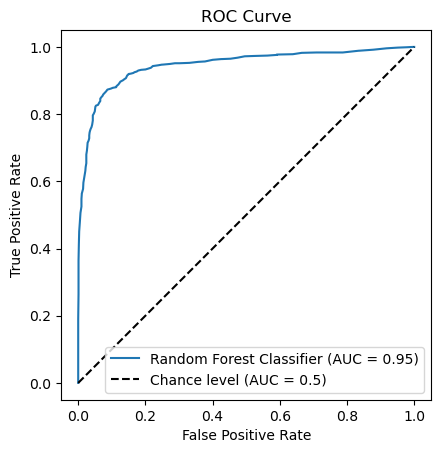

In [31]:
RocCurveDisplay.from_predictions(
    y_test2_binary.ravel(),
    np.array([i[1] for i in preds]).ravel(),
    name = "Random Forest Classifier",
    plot_chance_level=True
)

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#### K-Nearest Neighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier(n_neighbors = 4, p = 1, weights = "distance")

In [34]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')

In [35]:
preds = knn.predict_proba(X_test)

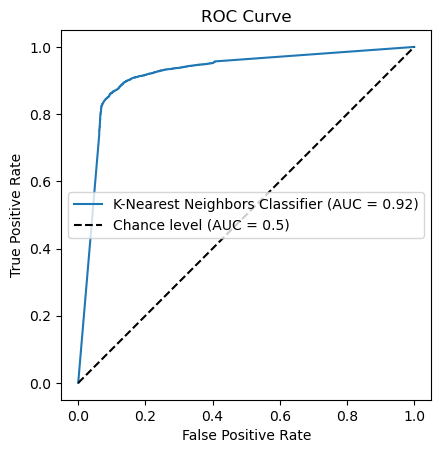

In [37]:
RocCurveDisplay.from_predictions(
    y_test_binary.ravel(),
    np.array([i[1] for i in preds]).ravel(),
    name = "K-Nearest Neighbors Classifier",
    plot_chance_level=True
)

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#### Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dtree = DecisionTreeClassifier(ccp_alpha = 1e-05, criterion = 'entropy')

In [40]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=1e-05, criterion='entropy')

In [41]:
preds = dtree.predict_proba(X_test)

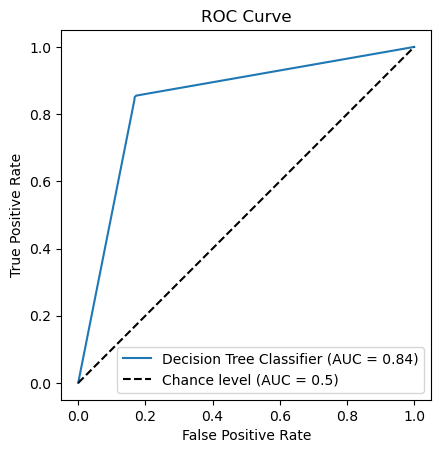

In [42]:
RocCurveDisplay.from_predictions(
    y_test_binary.ravel(),
    np.array([i[1] for i in preds]).ravel(),
    name = "Decision Tree Classifier",
    plot_chance_level=True
)

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#### Support Vector Machine

In [52]:
from sklearn.svm import SVC

In [53]:
svm = SVC(kernel = "rbf", gamma = 0.1, degree = 6, C = 100, probability = True)

In [54]:
svm.fit(X_train2, y_train2)

SVC(C=100, degree=6, gamma=0.1, probability=True)

In [55]:
preds = svm.predict_proba(X_test2)

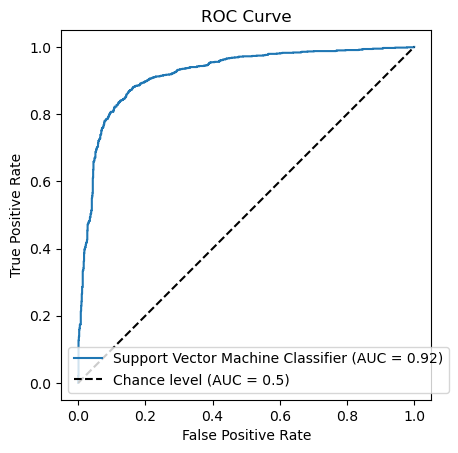

In [56]:
RocCurveDisplay.from_predictions(
    y_test2_binary.ravel(),
    np.array([i[1] for i in preds]).ravel(),
    name = "Support Vector Machine Classifier",
    plot_chance_level=True
)

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#### Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import make_scorer, matthews_corrcoef

In [61]:
log_reg = LogisticRegressionCV(
    cv = 5, 
    scoring = make_scorer(matthews_corrcoef)
)

In [62]:
log_reg.fit(X_train, y_train)

LogisticRegressionCV(cv=5, scoring=make_scorer(matthews_corrcoef))

In [65]:
preds = log_reg.predict_proba(X_test)

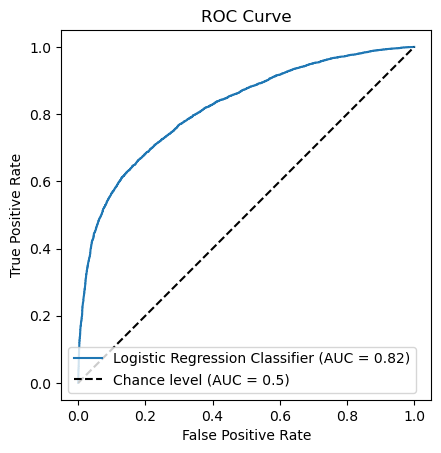

In [66]:
RocCurveDisplay.from_predictions(
    y_test_binary.ravel(),
    np.array([i[1] for i in preds]).ravel(),
    name = "Logistic Regression Classifier",
    plot_chance_level=True
)

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

The above results have shown that in addition to having the highest accuracy, the optimized Random Forest also has the highest ROC score, indicating the best ability to perform across all prediction thresholds. The optimized K-Nearest Neighbors and Support Vector Machine models also all had exceptionally high AUC scores.

The two models that had the lowest optimized accuracy -- Decision Tree and Logistic Regression -- also had significantly lower AUC scores. This is somewhat surprising in the case of the Decision Tree, which had an accuracy not far behind the other top-performing models. The AUC scores indicate that theses models are not as effective at making predictions across all possible thresholds for this particular problem. 

## Utilizing Neural Networks to Predict Probability of Responding "Yes":

Before implementing the Artificial Neural Network, the target data must be mapped from strings to binary 0 or 1 values.

In [22]:
target_map = {"y": 1, "n": 0}

In [23]:
y_train = y_train.map(target_map)

In [24]:
y_test = y_test.map(target_map)

In [25]:
y_train.head()

38950    1
26292    0
50739    1
38862    1
49686    1
Name: Target Label, dtype: int64

In [26]:
y_test.head()

28456    0
28822    0
49876    1
46325    1
48928    1
Name: Target Label, dtype: int64

In [27]:
import tensorflow as tf

In [28]:
#from keras import optimizers

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import matthews_corrcoef

Below a sequential model will be defined. After numerous iterations of trying out different combinations of hidden layers and layer sizes, the combination below was found to provide a good balance of performance and run time. 

The other parameters of this model, such as the activation settings, optimizer, and loss function were all found through an informal trial and error process as well. Further work on this model could include a more formal method to determine the optimal parameters and architecture of the neural network below. 

In [30]:
# Define a sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="tanh", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation="tanh"),
    tf.keras.layers.Dense(128, activation="tanh"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

2023-12-15 08:45:19.443593: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2023-12-15 08:45:19.443612: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-12-15 08:45:19.443617: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-12-15 08:45:19.443644: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-15 08:45:19.443661: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [31]:
# Initialize the optimizer
adam = tf.keras.optimizers.legacy.Adam(learning_rate=0.01)

In [32]:
# Compile the model with the optimizer, loss function, and relevant metric
model.compile(optimizer=adam,
              loss="binary_crossentropy",
              metrics=["accuracy"]
             )

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2048      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 35201 (137.50 KB)
Trainable params: 35201 (137.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# Allow for early stopping if model performance stops improving
callbacks = tf.keras.callbacks.EarlyStopping(
    monitor="accuracy",
    min_delta=0.005,
    patience=5,
    verbose=1,
    start_from_epoch=15,
)

In [35]:
# Fit the model to the data
hist = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test), 
    epochs=100, 
    batch_size=250, 
    callbacks=callbacks
)

Epoch 1/100
  1/187 [..............................] - ETA: 1:03 - loss: 0.6746 - accuracy: 0.5840

2023-12-15 08:45:19.750532: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


187/187 [==============================] - 2s 9ms/step - loss: 0.5208 - accuracy: 0.7458 - val_loss: 0.4971 - val_accuracy: 0.7579
Epoch 2/100
187/187 [==============================] - 1s 8ms/step - loss: 0.4863 - accuracy: 0.7657 - val_loss: 0.4812 - val_accuracy: 0.7681
Epoch 3/100
187/187 [==============================] - 1s 8ms/step - loss: 0.4711 - accuracy: 0.7774 - val_loss: 0.4649 - val_accuracy: 0.7800
Epoch 4/100
187/187 [==============================] - 1s 7ms/step - loss: 0.4572 - accuracy: 0.7845 - val_loss: 0.4486 - val_accuracy: 0.7876
Epoch 5/100
187/187 [==============================] - 1s 8ms/step - loss: 0.4442 - accuracy: 0.7935 - val_loss: 0.4540 - val_accuracy: 0.7884
Epoch 6/100
187/187 [==============================] - 1s 7ms/step - loss: 0.4361 - accuracy: 0.7976 - val_loss: 0.4360 - val_accuracy: 0.7991
Epoch 7/100
187/187 [==============================] - 1s 8ms/step - loss: 0.4295 - accuracy: 0.8013 - val_loss: 0.4381 - val_accuracy: 0.8019
Epoch 8/100

In [36]:
# Get the training and validation accuracy
acc = hist.history["accuracy"]
val = hist.history["val_accuracy"]
epochs = range(1, len(acc)+1)

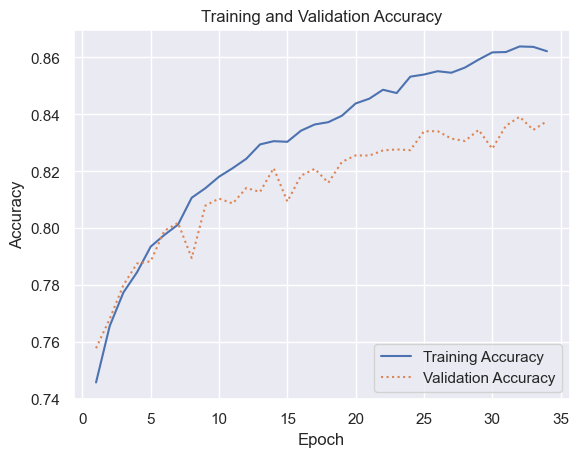

In [37]:
plt.plot(epochs, acc, "-", label="Training Accuracy")
plt.plot(epochs, val, ":", label="Validation Accuracy")

plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.show()

In [38]:
# Make predictions
predictions = model.predict(X_test)

624/624 [==============================] - 1s 1ms/step


In [39]:
predictions = pd.DataFrame(predictions, columns=["Probability"], index = y_test.index)

In [40]:
# Convert the predictions to a binary value depending whether they are above or below 0.5
bin_predictions = pd.Series([1 if i >= 0.5 else 0 for i in predictions["Probability"]], index=y_test.index)

In [41]:
# Create a dataframe to compare side by side the actual test values versus the model predictions
results = y_test.to_frame().merge(bin_predictions.to_frame(), left_index=True, right_index=True)

In [42]:
results.rename({"Target Label": "Actual", 0: "Predicted"}, axis=1, inplace=True)

In [43]:
# Append the probabilities next to the predictions
results["Probability"] = predictions["Probability"]

In [44]:
results

Actual  Predicted  Probability
28456       0          0     0.003093
28822       0          0     0.000791
49876       1          1     0.882396
46325       1          1     0.673355
48928       1          1     0.794614
...       ...        ...          ...
38033       0          0     0.451726
32544       0          0     0.037829
29409       0          0     0.040064
20142       0          0     0.097122
48495       1          1     0.994029

[19956 rows x 3 columns]

In [45]:
# Define a function to assess if a given prediction is correct or not
def assess_correct(x, y):
    if x == y:
        return "Correct"
    else:
        return "Incorrect"

In [46]:
# Append a value to each prediction to display the result
results["Result"] = results.apply(lambda x: assess_correct(x["Actual"], x["Predicted"]), axis=1)

In [47]:
results

Actual  Predicted  Probability   Result
28456       0          0     0.003093  Correct
28822       0          0     0.000791  Correct
49876       1          1     0.882396  Correct
46325       1          1     0.673355  Correct
48928       1          1     0.794614  Correct
...       ...        ...          ...      ...
38033       0          0     0.451726  Correct
32544       0          0     0.037829  Correct
29409       0          0     0.040064  Correct
20142       0          0     0.097122  Correct
48495       1          1     0.994029  Correct

[19956 rows x 4 columns]

In [48]:
results["Result"].value_counts()

Result
Correct      16715
Incorrect     3241
Name: count, dtype: int64

In [49]:
# Compute the accuracy on the testing holdout data
acc = results["Result"].value_counts().iloc[0] / results.shape[0]

In [50]:
print(f"Neural network accuracy with 3 hidden layers and 128 neurons per layer is {100*acc: .3f}%.")

Neural network accuracy with 3 hidden layers and 128 neurons per layer is  83.759%.


In [51]:
mcc = matthews_corrcoef(results["Actual"], results["Predicted"])

In [52]:
print(f"Neural network MCC with 3 hidden layers and 128 neurons per layer is {mcc: .3f}.")

Neural network MCC with 3 hidden layers and 128 neurons per layer is  0.674.


Above it can be seen that even a relatively complex model with 3 hidden layers and 128 neurons at each layer still does not outperform the models that had their hyperparameters optimized by the "Optimize" class (with the exception of Logistic Regression). 

But even with the perfomance not quite matching up to the best algorithms above, this approach has still provided meaningful insights by assigning a probability to each prediction.

In [53]:
# Get confusion matrix of predictions vs actual values
tf.math.confusion_matrix(results["Actual"], results["Predicted"])

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[8914, 1496],
       [1745, 7801]], dtype=int32)>

### Question for investigation: 

How many rows had a high degree of confidence but were incorrect? 

In order to address this question, "high degree of confidence" must be defined. 

After multiple iterations of different numbers of hidden layers and layer sizes, it was seen that the actual values of probability vary depending on the model parameters. In this sense the "Probability" is not a true probability, i.e. the expected proportion of an instance with those features responding yes over many trials. The true probability of a given set of features responding yes over many trials would transced whatever model is being used to analyze the data. A more fitting interperetation of the "Probability" column is the likelihood of a given row to respond yes, relative to all of the other rows. 

For example, a given row with a probability of 0.97 means that the model is more "sure" that this row should be classified as responding yes, compared to a row with a probability of 0.65. But this is not to say that over many trials, the row with a probability of 0.97 would respond yes 97% of the time over many trials. This is due to the fact that the actual value (0.97) is subject to the parameters of the model.

With this in mind, "high degree of confidence" will be defined as those rows that are in either the top or bottom 10 percentile of probabilities. This means that the model is very "sure" of itself that these rows should be predicted in a given way, relative to all of the other rows.

In [54]:
def high_confidence(x):
    if x >= results["Probability"].quantile(0.9) or x <= results["Probability"].quantile(0.1):
        return True
    else:
        return False

In [55]:
results["High Confidence"] = results["Probability"].apply(lambda x: high_confidence(x))

In [56]:
results

Actual  Predicted  Probability   Result  High Confidence
28456       0          0     0.003093  Correct             True
28822       0          0     0.000791  Correct             True
49876       1          1     0.882396  Correct            False
46325       1          1     0.673355  Correct            False
48928       1          1     0.794614  Correct            False
...       ...        ...          ...      ...              ...
38033       0          0     0.451726  Correct            False
32544       0          0     0.037829  Correct            False
29409       0          0     0.040064  Correct            False
20142       0          0     0.097122  Correct            False
48495       1          1     0.994029  Correct             True

[19956 rows x 5 columns]

Calculate the percentage of rows that had High Confidence but were incorrect.

In [57]:
mistakes = results[(results["Result"] == "Incorrect") & (results["High Confidence"] == True)]

In [58]:
mistakes

Actual  Predicted  Probability     Result  High Confidence
13773       1          0     0.007863  Incorrect             True
54607       1          0     0.012362  Incorrect             True
23461       1          0     0.002337  Incorrect             True
37805       0          1     0.999550  Incorrect             True
7930        1          0     0.011621  Incorrect             True
...       ...        ...          ...        ...              ...
35681       0          1     0.986243  Incorrect             True
36388       0          1     0.998691  Incorrect             True
63366       1          0     0.004078  Incorrect             True
35662       0          1     0.989171  Incorrect             True
37581       0          1     0.993007  Incorrect             True

[149 rows x 5 columns]

In [59]:
perc_mistakes = 100 * mistakes.shape[0] / results.shape[0]

In [60]:
print(f"The percentage of incorrect results that had a high degree of confidence is {round(perc_mistakes, 1)}%.")

The percentage of incorrect results that had a high degree of confidence is 0.7%.


Such a low percentage of confidently-incorrect results is a promising result.

[Text(0.5, 0, 'Predicted Probability')]

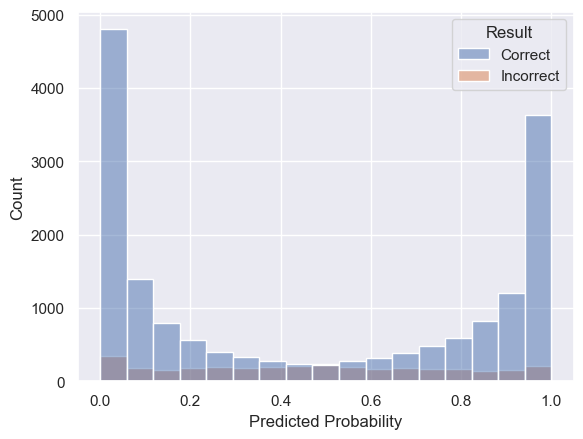

In [61]:
sns.histplot(data=results, x="Probability", hue="Result").set(xlabel="Predicted Probability")

[Text(0.5, 0, 'Predicted Probability')]

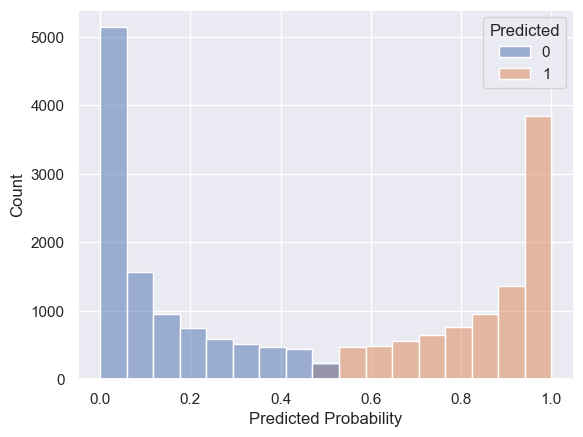

In [62]:
sns.histplot(data=results, x="Probability", hue="Predicted").set(xlabel="Predicted Probability")

Some interesting observations can be seen from the chart of correct and incorrect predictions. While the correct predictions, as well as all predictions, follow a decaying exponential trend from their peaks at either extreme towards the midpoint value of 0.5, the distribution of mistakes is much more uniformly distributed over all probability values. It is not clear why this is, but it is an interesting property of this model that the mistaken probabilities are not clustered around a given value of probability.

Below, summary statistics of correct, incorrect & low, high probability groups will be calculated.

In [63]:
results

Actual  Predicted  Probability   Result  High Confidence
28456       0          0     0.003093  Correct             True
28822       0          0     0.000791  Correct             True
49876       1          1     0.882396  Correct            False
46325       1          1     0.673355  Correct            False
48928       1          1     0.794614  Correct            False
...       ...        ...          ...      ...              ...
38033       0          0     0.451726  Correct            False
32544       0          0     0.037829  Correct            False
29409       0          0     0.040064  Correct            False
20142       0          0     0.097122  Correct            False
48495       1          1     0.994029  Correct             True

[19956 rows x 5 columns]

In [64]:
low_correct = results[(results["Probability"] < 0.5) & (results["Result"] == "Correct")]

In [65]:
low_correct.describe()

Actual  Predicted  Probability
count  8914.0     8914.0  8914.000000
mean      0.0        0.0     0.104081
std       0.0        0.0     0.121863
min       0.0        0.0     0.000021
25%       0.0        0.0     0.016035
50%       0.0        0.0     0.050598
75%       0.0        0.0     0.153093
max       0.0        0.0     0.499758

In [66]:
med_low_correct = low_correct["Probability"].median()

In [67]:
med_low_correct

0.050597578287124634

In [68]:
high_correct = results[(results["Probability"] >= 0.5) & (results["Result"] == "Correct")]

In [69]:
high_correct.describe()

Actual  Predicted  Probability
count  7801.0     7801.0  7801.000000
mean      1.0        1.0     0.877699
std       0.0        0.0     0.131933
min       1.0        1.0     0.500315
25%       1.0        1.0     0.807005
50%       1.0        1.0     0.931082
75%       1.0        1.0     0.984929
max       1.0        1.0     0.999989

In [70]:
med_high_correct = high_correct["Probability"].median()

In [71]:
med_high_correct

0.9310820698738098

In [72]:
low_incorrect = results[(results["Probability"] < 0.5) & (results["Result"] == "Incorrect")]

In [73]:
low_incorrect.describe()

Actual  Predicted  Probability
count  1745.0     1745.0  1745.000000
mean      1.0        0.0     0.241626
std       0.0        0.0     0.157180
min       1.0        0.0     0.000343
25%       1.0        0.0     0.092058
50%       1.0        0.0     0.243268
75%       1.0        0.0     0.384640
max       1.0        0.0     0.499785

In [74]:
med_low_incorrect = low_incorrect["Probability"].median()

In [75]:
med_low_incorrect

0.2432677000761032

In [76]:
high_incorrect = results[(results["Probability"] >= 0.5) & (results["Result"] == "Incorrect")]

In [77]:
high_incorrect.describe()

Actual  Predicted  Probability
count  1496.0     1496.0  1496.000000
mean      0.0        1.0     0.745533
std       0.0        0.0     0.150735
min       0.0        1.0     0.500151
25%       0.0        1.0     0.612362
50%       0.0        1.0     0.740642
75%       0.0        1.0     0.879602
max       0.0        1.0     0.999550

In [78]:
med_high_incorrect = high_incorrect["Probability"].median()

In [79]:
med_high_incorrect

0.7406424283981323

### Remaining Work for Final Project Submission:

The primary work that remains for the final project submission includes further analyzing the groups that the neural network has identified with a high degree of confidene, in order to learn more about which groups are either highly likely or highly unlikely to respond "yes" to a product such as this. This may involve further statistical analysis, or perhaps even a clustering algorithm to see if there are any natural groups that can be formed. 

In addition, if time allows perhaps even more optimization schemes may be included in the "Optimize" class. However, it is possible that even any additional search algorithms may not necessarily results in further model improvements. For this reason, work will be focused on the first task of examining customers with a high likelihood in one direction or the other, and if time allows then the "Optimize" class will be revisited.

### Final Project Submission

As a final exercise for the project submission, the rows that the neural network identified with a high degree of confidence will be examined more closely.

In order to learn more about the rows identified with high confidence, the original dataset must be reloaded, and a subset of the indices identified with high confidence will be selected. In addition, since this analysis is taking place at a late date some libraries may need to be imported again to avoid the need to run large chunks of the entire notebook again.

In [80]:
import csv
import pandas as pd

In [81]:
path = "/Users/tylernardone/Documents/WPI/Courses/Semester 3/CS 539/Assignments/Milestone 1/bank+marketing/bank-additional/bank-additional-full.csv"

The same data wrangling techniques that were performed at the beginning of the project to make the data suitable for a pandas DataFrame must be repeated (The explanations of all of these steps can be seen at the very top of this notebook).

In [82]:
data = []

with open(path, 'rt') as csvfile:
    lines = csv.reader(csvfile)
    for line in lines:
        data.append(line)

In [83]:
xformed_data = []

for i in range(len(data)):
    xformed_data.append(data[i][0].split(";"))

In [84]:
df = pd.DataFrame(xformed_data[1:], columns = xformed_data[0])

In [85]:
df.head()

age        "job"  "marital"    "education"  "default" "housing" "loan"  \
0  56  "housemaid"  "married"     "basic.4y"       "no"      "no"   "no"   
1  57   "services"  "married"  "high.school"  "unknown"      "no"   "no"   
2  37   "services"  "married"  "high.school"       "no"     "yes"   "no"   
3  40     "admin."  "married"     "basic.6y"       "no"      "no"   "no"   
4  56   "services"  "married"  "high.school"       "no"      "no"  "yes"   

     "contact" "month" "day_of_week"  ... "campaign" "pdays" "previous"  \
0  "telephone"   "may"         "mon"  ...          1     999          0   
1  "telephone"   "may"         "mon"  ...          1     999          0   
2  "telephone"   "may"         "mon"  ...          1     999          0   
3  "telephone"   "may"         "mon"  ...          1     999          0   
4  "telephone"   "may"         "mon"  ...          1     999          0   

      "poutcome" "emp.var.rate" "cons.price.idx" "cons.conf.idx" "euribor3m"  \
0  "nonexistent"            1.1           93.994           -36.4       4.857   
1  "nonexistent"            1.1           93.994           -36.4       4.857   
2  "nonexistent"            1.1           93.994           -36.4       4.857   
3  "nonexistent"            1.1           93.994           -36.4       4.857   
4  "nonexistent"            1.1           93.994           -36.4       4.857   

  "nr.employed"   "y"  
0          5191  "no"  
1          5191  "no"  
2          5191  "no"  
3          5191  "no"  
4          5191  "no"  

[5 rows x 21 columns]

In [86]:
def num_convert(df):
    """Assumes df is a pandas dataframe of one or more columns. Function converts
    numeric "object" datatypes to floats. Any columns stored as integers will also
    be kept as integers using the keep_integers function."""

    def keep_integers(x):
        if x.is_integer():
            return int(x)
        return x

    for col in df:
        try:
            df[col] = df[col].astype(float)
            df[col] = df[col].apply(keep_integers)

        except (AttributeError, ValueError) as e:
            pass

    return df

In [87]:
num_convert(df)

age          "job"  "marital"            "education"  "default"  \
0       56    "housemaid"  "married"             "basic.4y"       "no"   
1       57     "services"  "married"          "high.school"  "unknown"   
2       37     "services"  "married"          "high.school"       "no"   
3       40       "admin."  "married"             "basic.6y"       "no"   
4       56     "services"  "married"          "high.school"       "no"   
...    ...            ...        ...                    ...        ...   
41183   73      "retired"  "married"  "professional.course"       "no"   
41184   46  "blue-collar"  "married"  "professional.course"       "no"   
41185   56      "retired"  "married"    "university.degree"       "no"   
41186   44   "technician"  "married"  "professional.course"       "no"   
41187   74      "retired"  "married"  "professional.course"       "no"   

      "housing" "loan"    "contact" "month" "day_of_week"  ...  "campaign"  \
0          "no"   "no"  "telephone"   "may"         "mon"  ...           1   
1          "no"   "no"  "telephone"   "may"         "mon"  ...           1   
2         "yes"   "no"  "telephone"   "may"         "mon"  ...           1   
3          "no"   "no"  "telephone"   "may"         "mon"  ...           1   
4          "no"  "yes"  "telephone"   "may"         "mon"  ...           1   
...         ...    ...          ...     ...           ...  ...         ...   
41183     "yes"   "no"   "cellular"   "nov"         "fri"  ...           1   
41184      "no"   "no"   "cellular"   "nov"         "fri"  ...           1   
41185     "yes"   "no"   "cellular"   "nov"         "fri"  ...           2   
41186      "no"   "no"   "cellular"   "nov"         "fri"  ...           1   
41187     "yes"   "no"   "cellular"   "nov"         "fri"  ...           3   

       "pdays"  "previous"     "poutcome" "emp.var.rate"  "cons.price.idx"  \
0          999           0  "nonexistent"            1.1            93.994   
1          999           0  "nonexistent"            1.1            93.994   
2          999           0  "nonexistent"            1.1            93.994   
3          999           0  "nonexistent"            1.1            93.994   
4          999           0  "nonexistent"            1.1            93.994   
...        ...         ...            ...            ...               ...   
41183      999           0  "nonexistent"           -1.1            94.767   
41184      999           0  "nonexistent"           -1.1            94.767   
41185      999           0  "nonexistent"           -1.1            94.767   
41186      999           0  "nonexistent"           -1.1            94.767   
41187      999           1      "failure"           -1.1            94.767   

       "cons.conf.idx"  "euribor3m"  "nr.employed"    "y"  
0                -36.4        4.857         5191.0   "no"  
1                -36.4        4.857         5191.0   "no"  
2                -36.4        4.857         5191.0   "no"  
3                -36.4        4.857         5191.0   "no"  
4                -36.4        4.857         5191.0   "no"  
...                ...          ...            ...    ...  
41183            -50.8        1.028         4963.6  "yes"  
41184            -50.8        1.028         4963.6   "no"  
41185            -50.8        1.028         4963.6   "no"  
41186            -50.8        1.028         4963.6  "yes"  
41187            -50.8        1.028         4963.6   "no"  

[41188 rows x 21 columns]

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               41188 non-null  int64  
 1   "job"             41188 non-null  object 
 2   "marital"         41188 non-null  object 
 3   "education"       41188 non-null  object 
 4   "default"         41188 non-null  object 
 5   "housing"         41188 non-null  object 
 6   "loan"            41188 non-null  object 
 7   "contact"         41188 non-null  object 
 8   "month"           41188 non-null  object 
 9   "day_of_week"     41188 non-null  object 
 10  "duration"        41188 non-null  int64  
 11  "campaign"        41188 non-null  int64  
 12  "pdays"           41188 non-null  int64  
 13  "previous"        41188 non-null  int64  
 14  "poutcome"        41188 non-null  object 
 15  "emp.var.rate"    41188 non-null  float64
 16  "cons.price.idx"  41188 non-null  float6

In [89]:
df.columns = [x.strip('"') for x in df.columns]

In [90]:
def remove_quotes(df):
    """Asumes df is a pandas dataframe"""

    def cleaned_col(col):
        return col.strip('"')

    for col in df.columns:
        if df[col].dtypes == "object":
            df[col] = df[col].apply(cleaned_col)

    return df

In [91]:
remove_quotes(df)

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

In [92]:
high_conf = results[results["High Confidence"] == True]

In [93]:
high_conf.head()

Actual  Predicted  Probability   Result  High Confidence
28456       0          0     0.003093  Correct             True
28822       0          0     0.000791  Correct             True
5718        0          0     0.009024  Correct             True
39051       1          1     0.999696  Correct             True
16588       0          0     0.006584  Correct             True

In [94]:
high_conf.index

Index([28456, 28822,  5718, 39051, 16588, 12930, 20363, 23479,  1869,  1629,
       ...
       60765, 59624,  4948,  6973, 19585, 17264,  6070, 14668, 43293, 48495],
      dtype='int64', length=3992)

Due to the sampling that was necessary to create a balanced target column, not all of the rows present in "high_conf" are present in "df" since many rows were synthetically created using the SMOTE sampling technique. Therefore, to isolate the rows from the original dataset which were identified as having high confidence, only index values that are present in both "high_conf" and "df" may be selected.

In [95]:
index_values = [i for i in high_conf.index if i in df.index]

In [96]:
df = df.loc[df.index[index_values]].sort_index()

In [97]:
df.shape

(2325, 21)

Now the prediction result will be appended to the end of the DataFrame.

In [98]:
df = df.merge(high_conf["Result"].sort_index(), how="left", left_index=True, right_index=True)

In [99]:
df.drop("duration", axis=1, inplace=True)

In [100]:
df.describe()

age     campaign        pdays     previous  emp.var.rate  \
count  2325.000000  2325.000000  2325.000000  2325.000000   2325.000000   
mean     40.343656     2.613333   965.658495     0.149677      0.194237   
std      10.772535     2.803933   178.992592     0.456316      1.570753   
min      18.000000     1.000000     0.000000     0.000000     -3.400000   
25%      32.000000     1.000000   999.000000     0.000000     -1.700000   
50%      38.000000     2.000000   999.000000     0.000000      1.100000   
75%      48.000000     3.000000   999.000000     0.000000      1.400000   
max      94.000000    34.000000   999.000000     4.000000      1.400000   

       cons.price.idx  cons.conf.idx    euribor3m  nr.employed  
count     2325.000000    2325.000000  2325.000000  2325.000000  
mean        93.636597     -39.826108     3.772874  5170.033591  
std          0.601397       4.666980     1.694797    72.688311  
min         92.201000     -50.800000     0.634000  4963.600000  
25%         93.200000     -42.700000     1.410000  5099.100000  
50%         93.918000     -41.800000     4.857000  5191.000000  
75%         93.994000     -36.400000     4.961000  5228.100000  
max         94.767000     -26.900000     5.045000  5228.100000

In [101]:
num_columns = df.select_dtypes(include="number").columns.to_list()

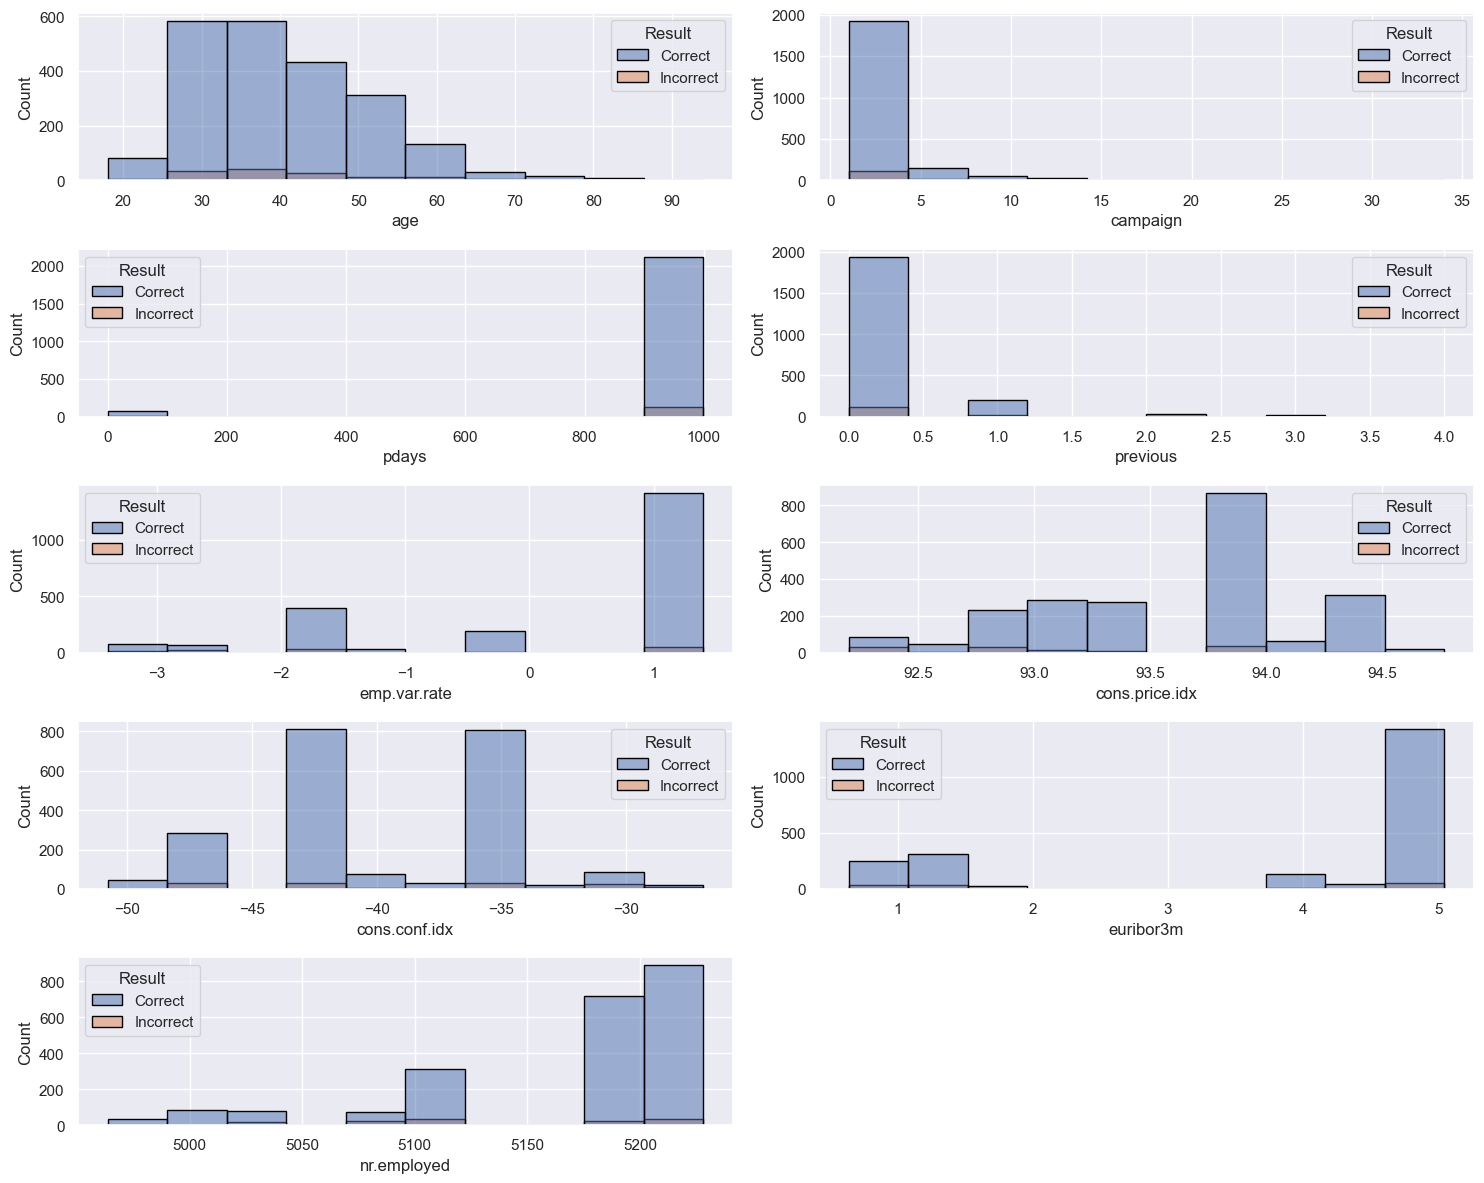

In [102]:
fig, axs = plt.subplots(5, 2, figsize=(15,12))

fig.delaxes(axs[4,1])

for i, ax in enumerate(fig.axes):
    col = num_columns[i]
    sns.histplot(data=df, x=col, ax=ax, bins=10, edgecolor="black", hue="Result")

fig.tight_layout()

In [103]:
cat_columns = df.select_dtypes(include="object").columns.to_list()

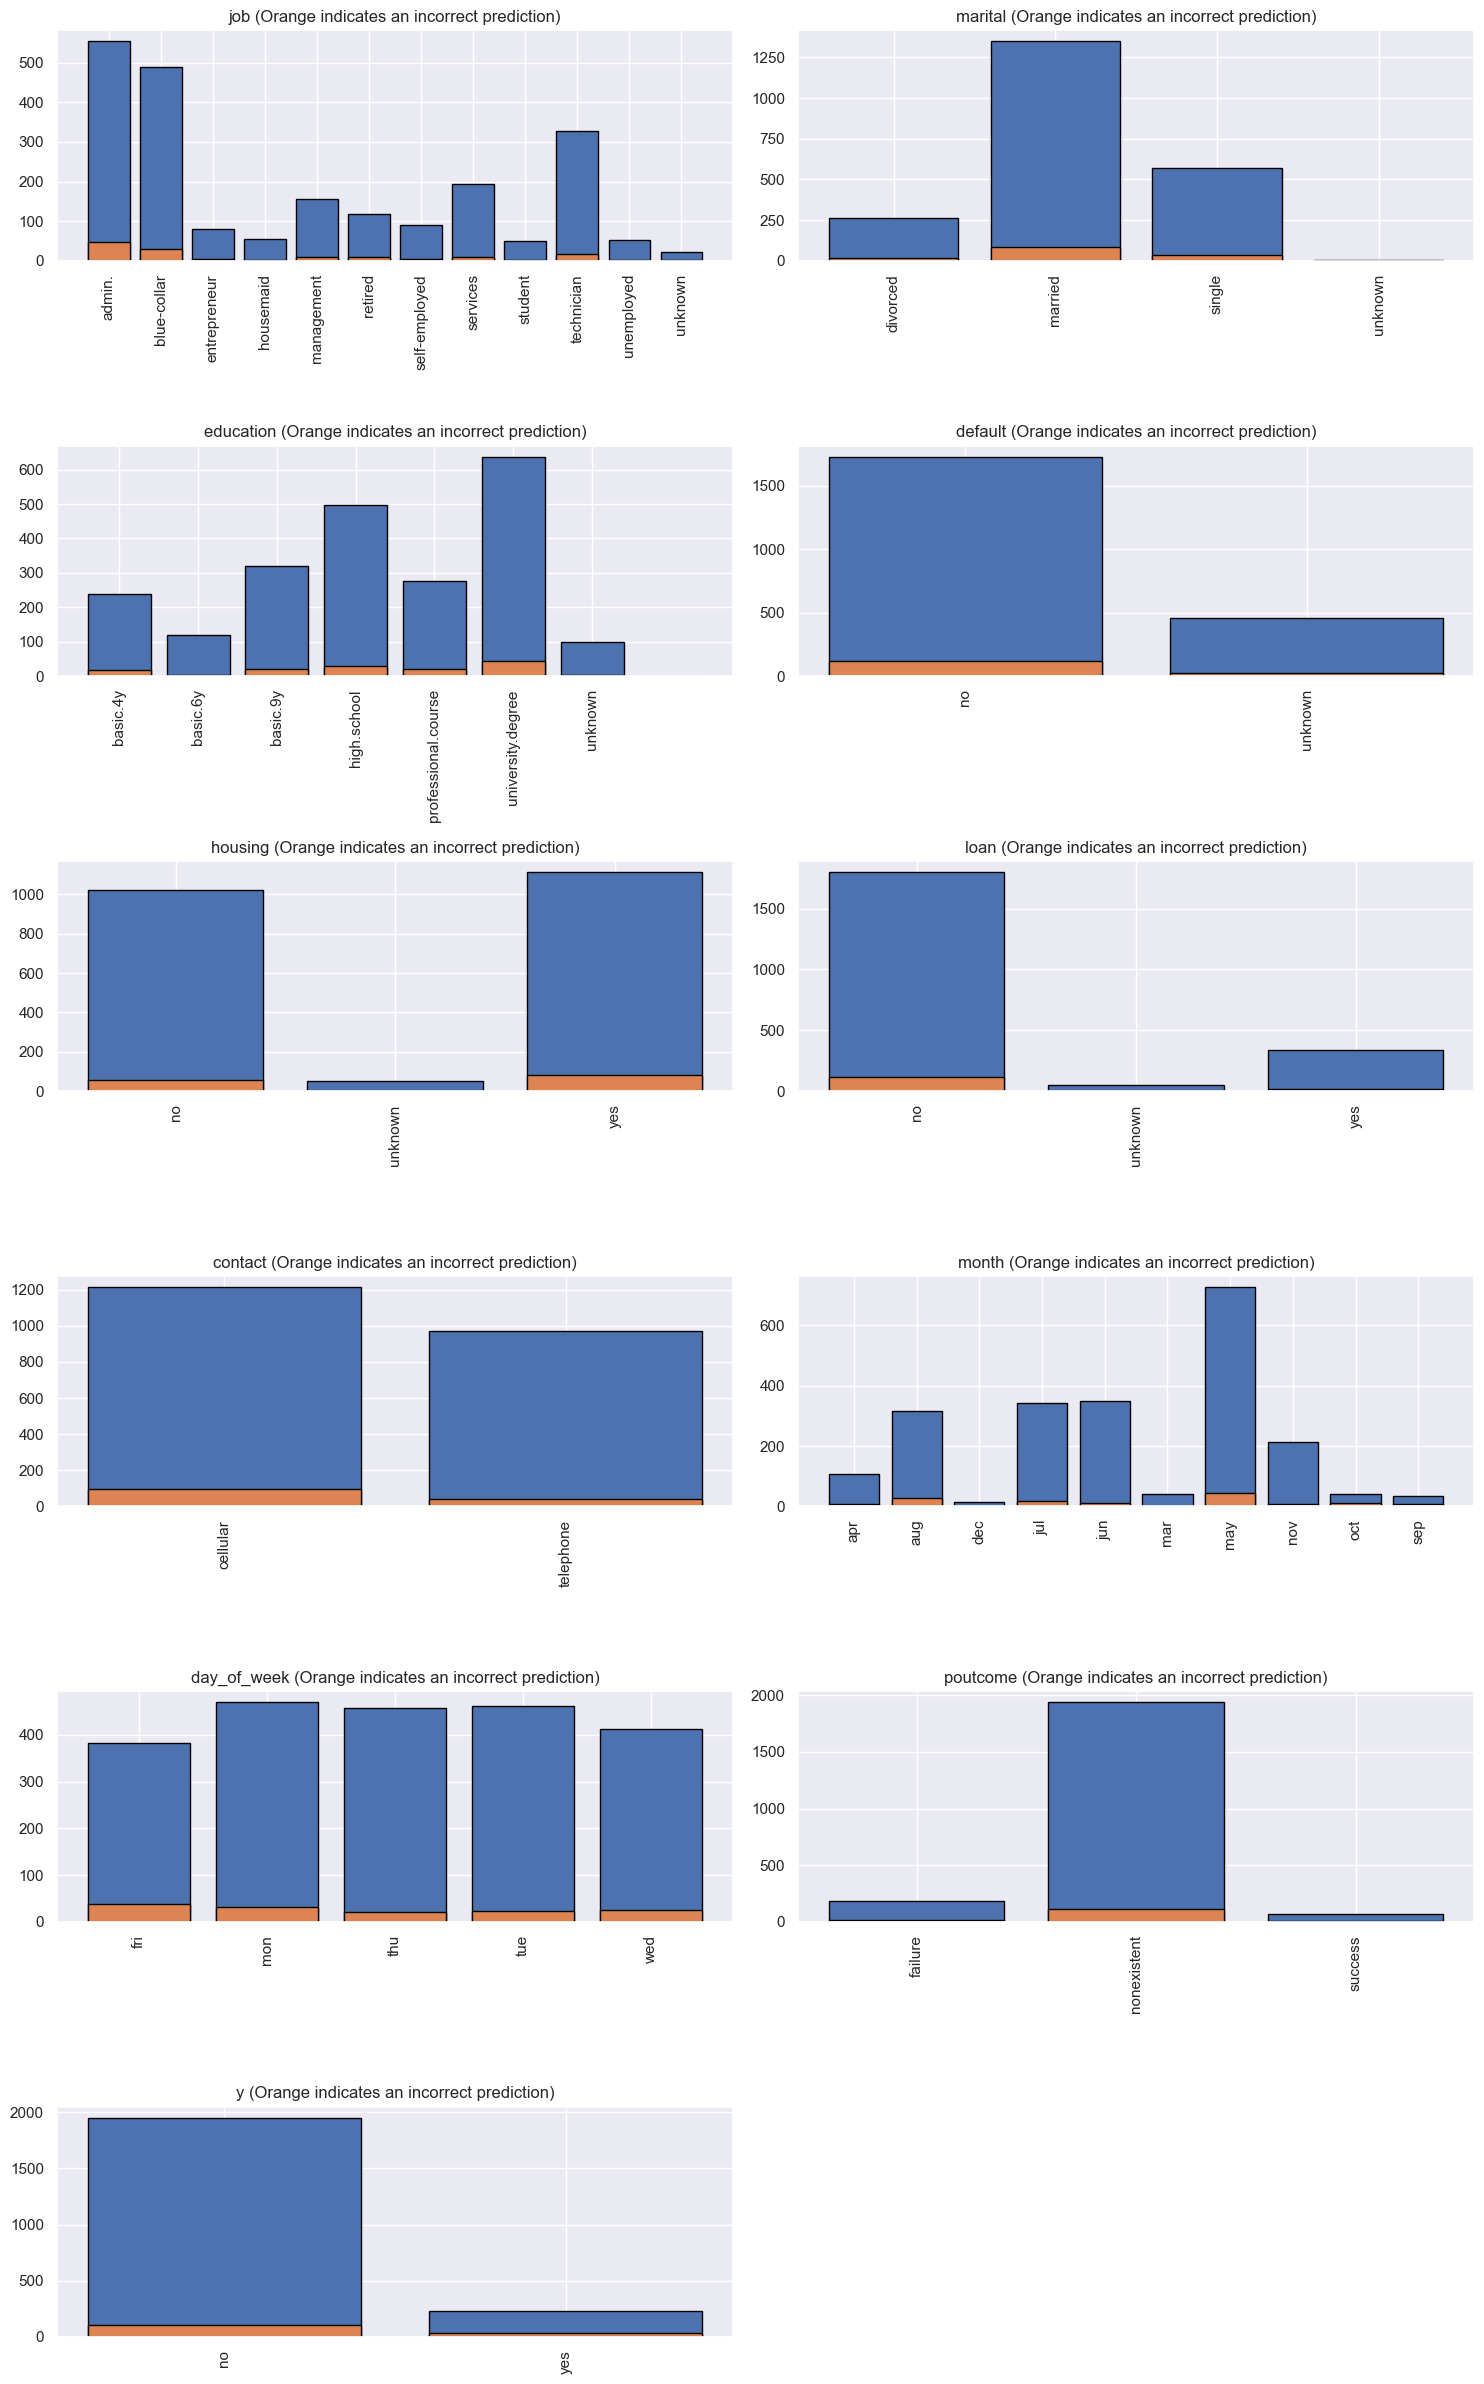

In [104]:
fig, axs = plt.subplots(6, 2, figsize=(15,24))

fig.delaxes(axs[5,1])

for i, ax in enumerate(fig.axes):
    col = cat_columns[i]
    correct_counts = df[df["Result"] == "Correct"][col].value_counts().sort_index()
    incorrect_counts = df[df["Result"] == "Incorrect"][col].value_counts().sort_index()
    ax.bar(correct_counts.index,
        height=correct_counts.values,
        edgecolor="black"
        )
    ax.bar(incorrect_counts.index,
        height=incorrect_counts.values,
        edgecolor="black"
        )
    ax.set_title(col + " (Orange indicates an incorrect prediction)")
    ax.set_xticks(correct_counts.index)
    ax.set_xticklabels(correct_counts.index, rotation=90)

fig.tight_layout()

For a final visual, only correct results will be selected, and the charts will be colored based on whether or not they signed up for this product.

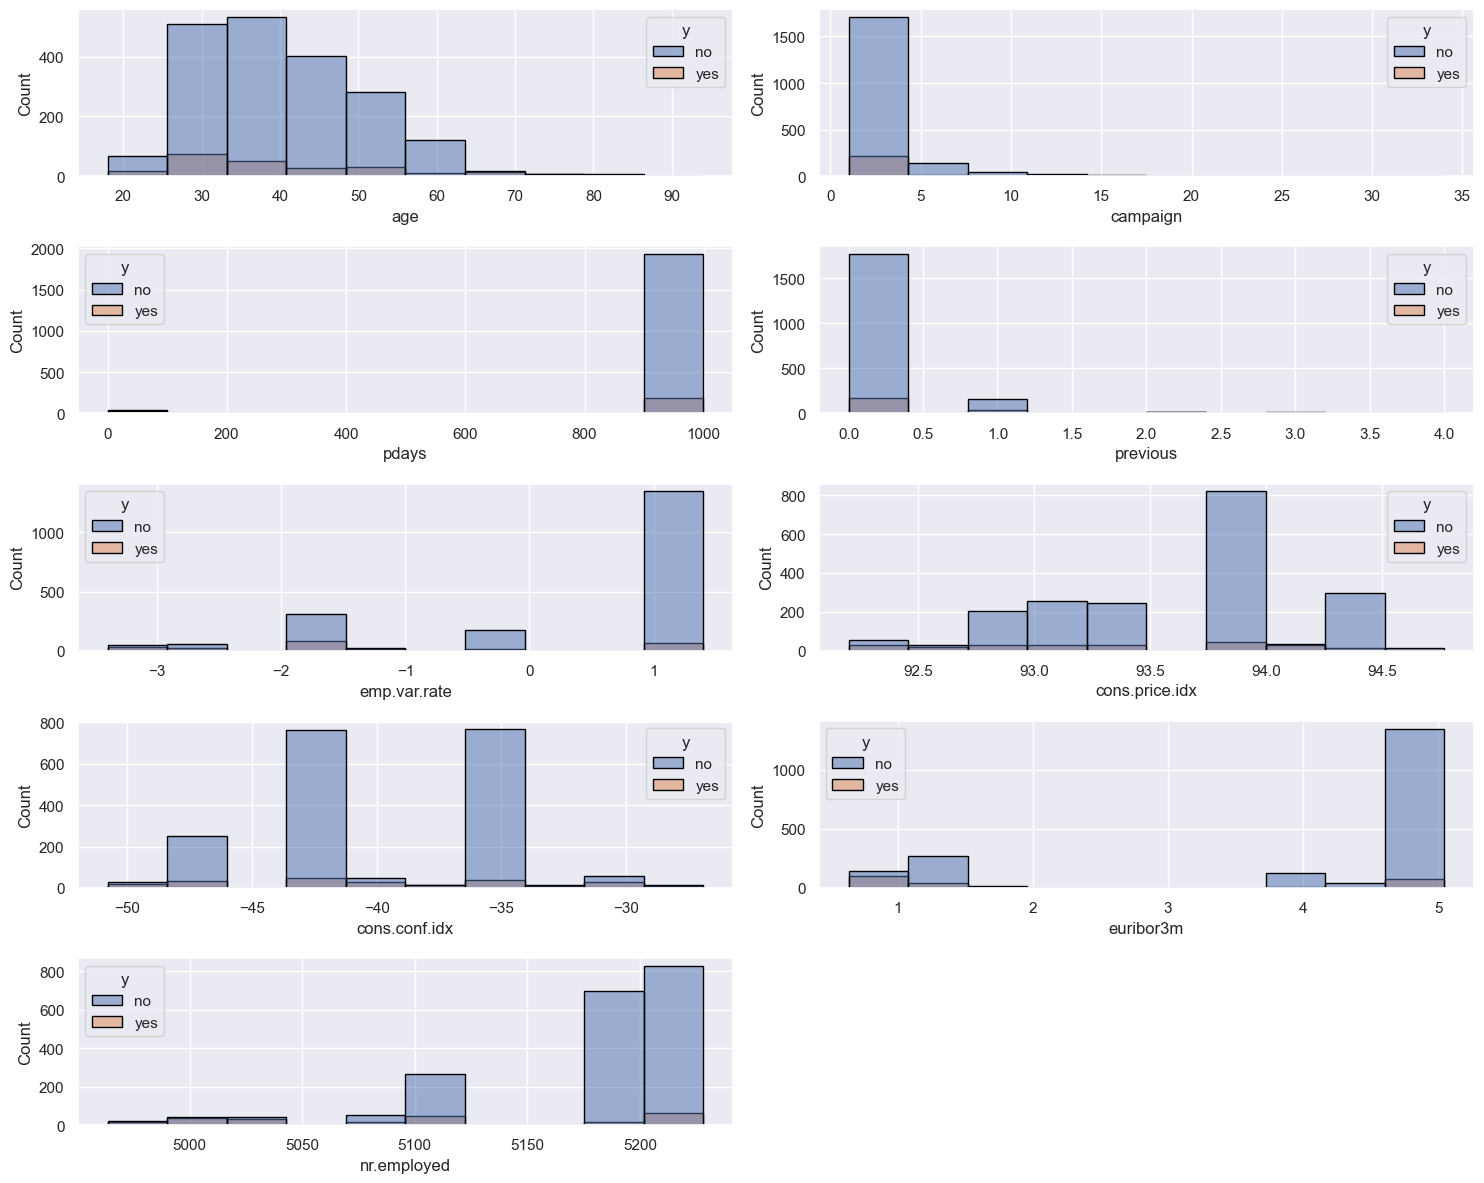

In [105]:
fig, axs = plt.subplots(5, 2, figsize=(15,12))

fig.delaxes(axs[4,1])

for i, ax in enumerate(fig.axes):
    col = num_columns[i]
    sns.histplot(data=df[df["Result"] == "Correct"], x=col, ax=ax, bins=10, edgecolor="black", hue="y")

fig.tight_layout()

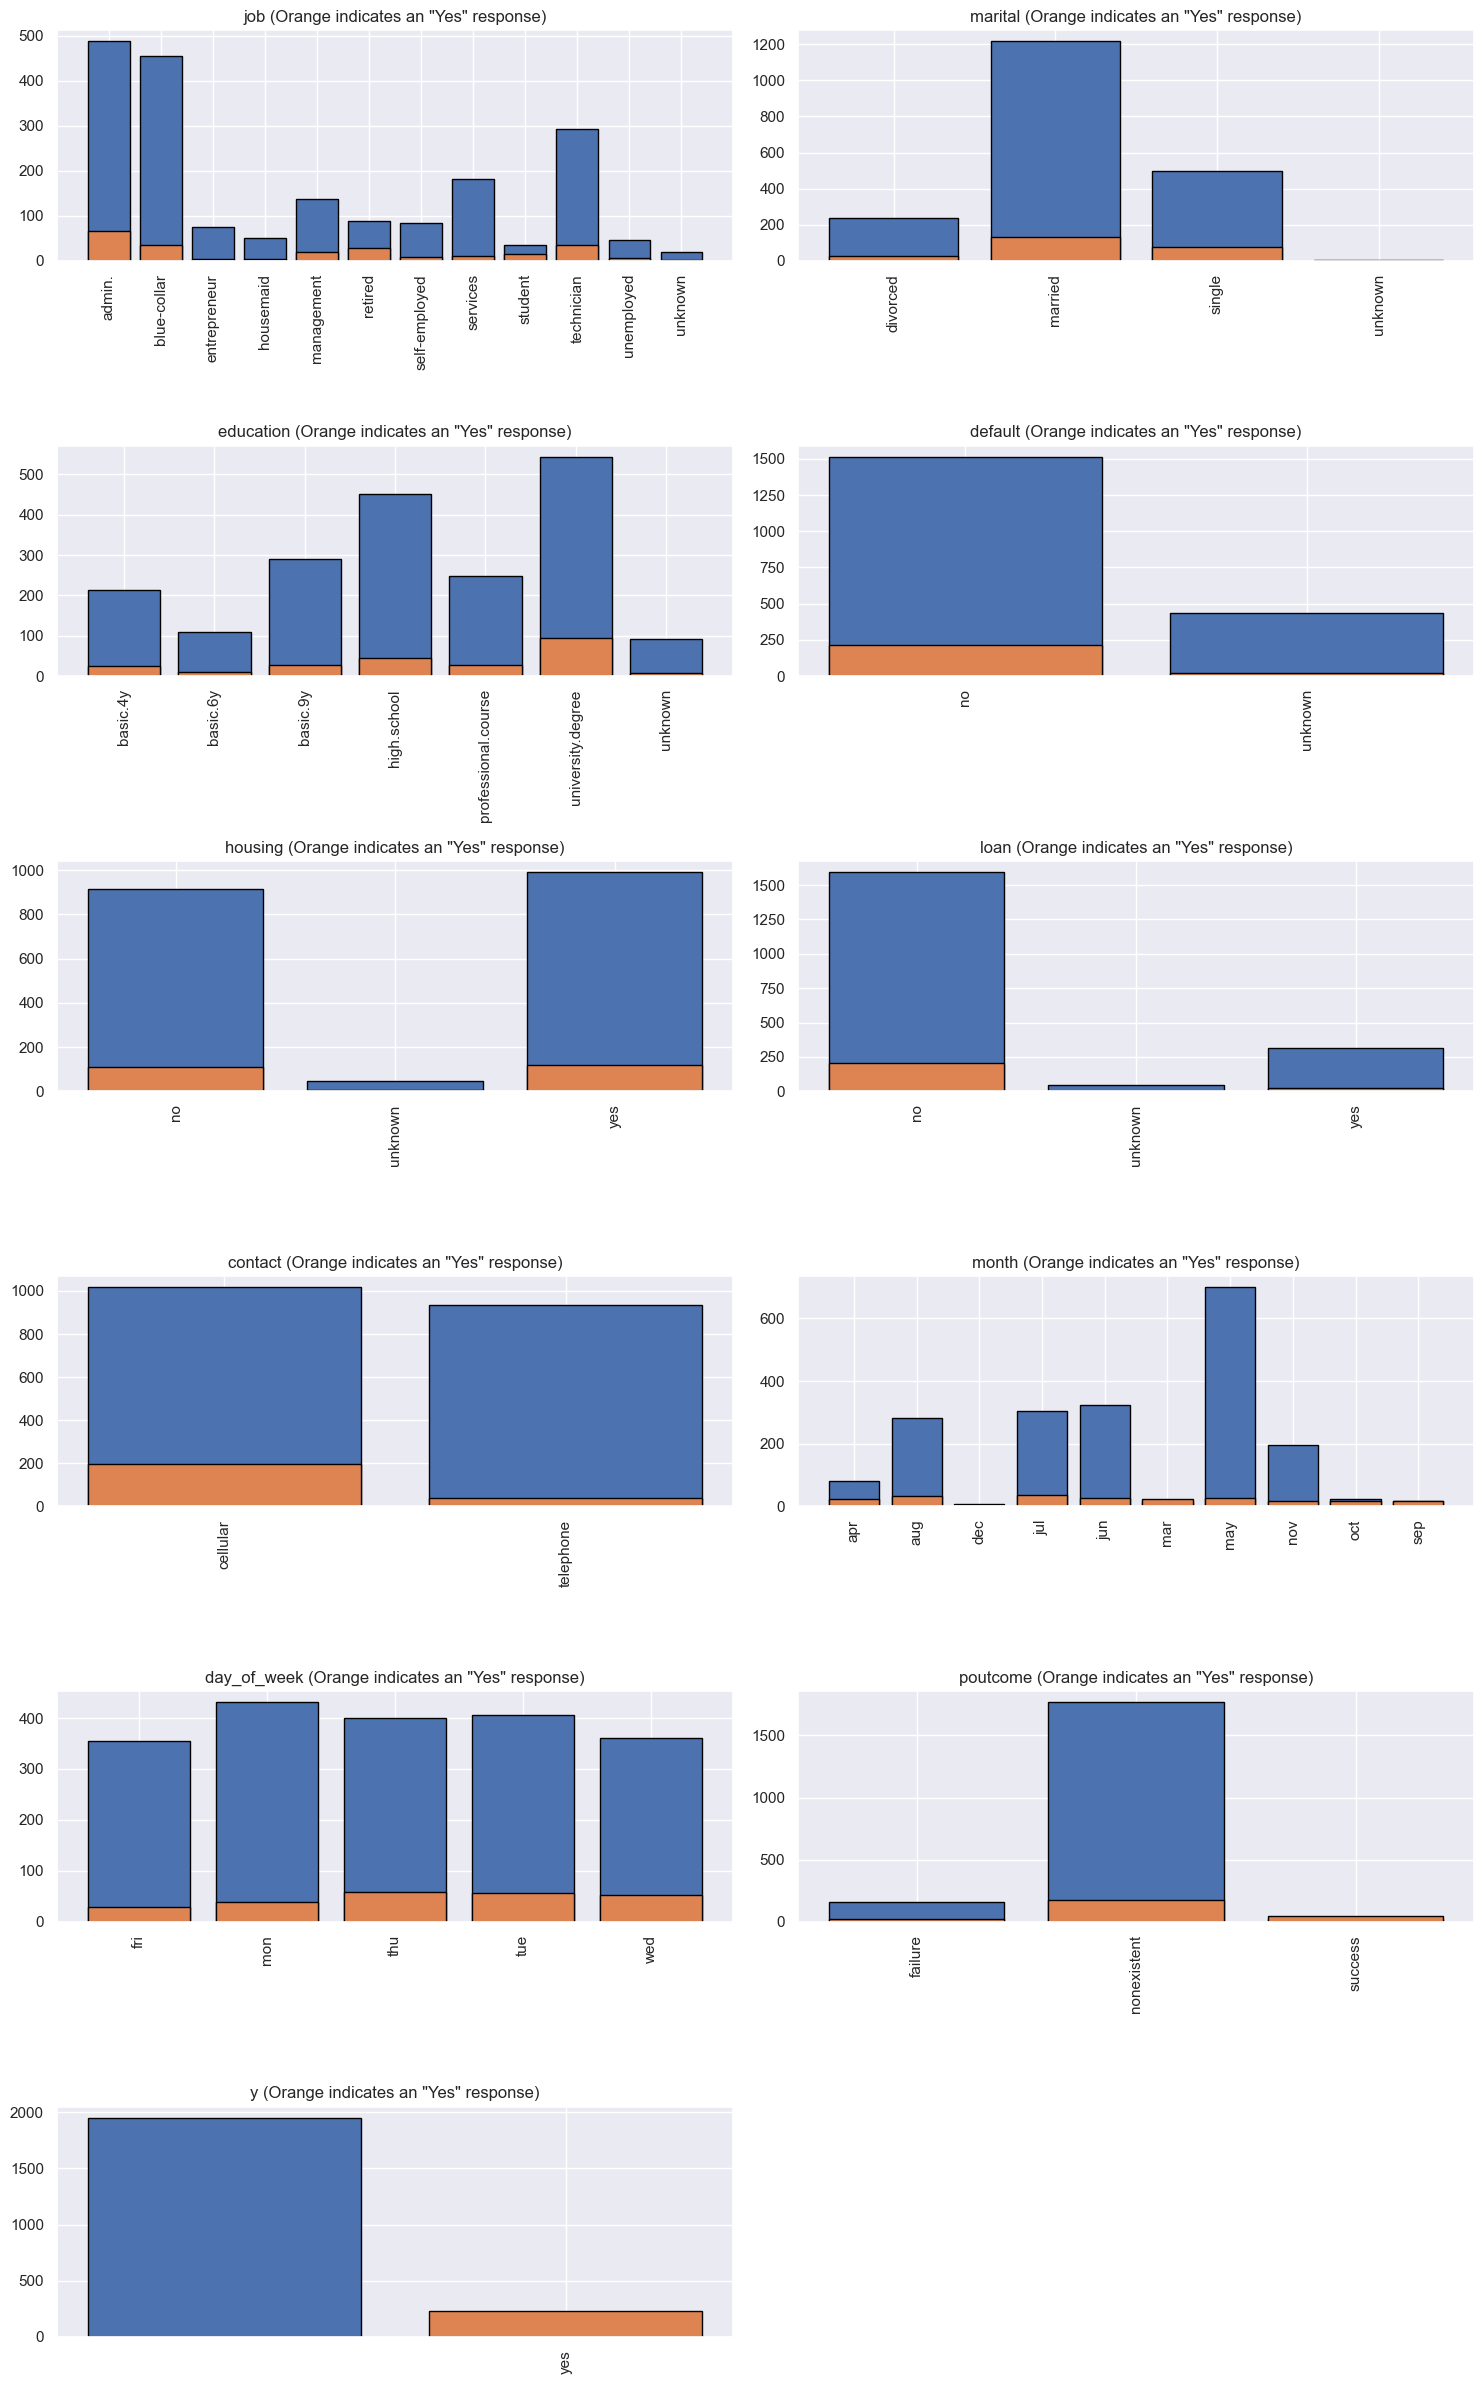

In [106]:
fig, axs = plt.subplots(6, 2, figsize=(15,24))

fig.delaxes(axs[5,1])

tmp_df = df[df["Result"] == "Correct"]

for i, ax in enumerate(fig.axes):
    col = cat_columns[i]
    yes_counts = tmp_df[tmp_df["y"] == "yes"][col].value_counts().sort_index()
    no_counts = tmp_df[tmp_df["y"] == "no"][col].value_counts().sort_index()
    ax.bar(no_counts.index,
        height=no_counts.values,
        edgecolor="black"
        )
    ax.bar(yes_counts.index,
        height=yes_counts.values,
        edgecolor="black"
        )
    ax.set_title(col + ' (Orange indicates an "Yes" response)')
    ax.set_xticks(yes_counts.index)
    ax.set_xticklabels(yes_counts.index, rotation=90)

fig.tight_layout()

Discussion of the charts above can be found in the main analysis report.